# Importing necessary libraries 

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt

In [3]:
# importing data for one stock
data=pd.read_csv("IBM_stock_data.csv")
data

Date        Open        High         Low       Close   Volume  \
0     2010-02-17  119.980881  120.965584  119.703636  120.774376  6095460   
1     2010-02-18  120.583176  122.370934  120.458893  122.189293  5780091   
2     2010-02-19  121.749519  122.428299  121.290634  121.596558  6593043   
3     2010-02-22  121.701721  121.826004  120.755257  121.271507  3983273   
4     2010-02-23  120.917786  122.045891  120.458893  120.898659  4803127   
...          ...         ...         ...         ...         ...      ...   
3237  2022-12-23  140.589996  141.860001  139.600006  141.649994  2092500   
3238  2022-12-27  141.729996  142.720001  141.229996  142.419998  2742400   
3239  2022-12-28  142.399994  142.809998  139.949997  140.020004  2539500   
3240  2022-12-29  140.580002  142.259995  140.449997  141.059998  2337200   
3241  2022-12-30  140.539993  140.899994  139.449997  140.889999  2858000   

      Volatility  Avg_Close_30  Avg_Volume_30  Close_Lag_1  ...  Close_Lag_21  \
0       0.012688    121.362651   7.939579e+06   119.722755  ...    125.984703   
1       0.012747    121.265774   7.893712e+06   120.774376  ...    128.240921   
2       0.012725    121.176227   7.918042e+06   122.189293  ...    124.521988   
3       0.012719    121.090184   7.847176e+06   121.596558  ...    123.326958   
4       0.012565    120.950286   7.860938e+06   121.271507  ...    119.980881   
...          ...           ...            ...          ...  ...           ...   
3237    0.013148    145.875000   4.428063e+06   140.880005  ...    148.750000   
3238    0.012938    145.850000   4.323767e+06   141.649994  ...    148.369995   
3239    0.013213    145.710667   4.231967e+06   142.419998  ...    146.179993   
3240    0.013297    145.601334   4.152303e+06   140.020004  ...    146.490005   
3241    0.013292    145.480333   4.132730e+06   141.059998  ...    148.899994   

      Close_Lag_22  Close_Lag_23  Close_Lag_24  Close_Lag_25  Close_Lag_26  \
0       126.491394    124.502869    124.770554    123.785851    125.095604   
1       125.984703    126.491394    124.502869    124.770554    123.785851   
2       128.240921    125.984703    126.491394    124.502869    124.770554   
3       124.521988    128.240921    125.984703    126.491394    124.502869   
4       123.326958    124.521988    128.240921    125.984703    126.491394   
...            ...           ...           ...           ...           ...   
3237    149.100006    146.679993    147.639999    146.089996    144.520004   
3238    148.750000    149.100006    146.679993    147.639999    146.089996   
3239    148.369995    148.750000    149.100006    146.679993    147.639999   
3240    146.179993    148.369995    148.750000    149.100006    146.679993   
3241    146.490005    146.179993    148.369995    148.750000    149.100006   

      Close_Lag_27  Close_Lag_28  Close_Lag_29  Close_Lag_30  
0       123.852776    124.282982    125.095604    126.625237  
1       125.095604    123.852776    124.282982    125.095604  
2       123.785851    125.095604    123.852776    124.282982  
3       124.770554    123.785851    125.095604    123.852776  
4       124.502869    124.770554    123.785851    125.095604  
...            ...           ...           ...           ...  
3237    144.339996    144.199997    143.169998    141.229996  
3238    144.520004    144.339996    144.199997    143.169998  
3239    146.089996    144.520004    144.339996    144.199997  
3240    147.639999    146.089996    144.520004    144.339996  
3241    146.679993    147.639999    146.089996    144.520004  

[3242 rows x 39 columns]

In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volatility',
       'Avg_Close_30', 'Avg_Volume_30', 'Close_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_6',
       'Close_Lag_7', 'Close_Lag_8', 'Close_Lag_9', 'Close_Lag_10',
       'Close_Lag_11', 'Close_Lag_12', 'Close_Lag_13', 'Close_Lag_14',
       'Close_Lag_15', 'Close_Lag_16', 'Close_Lag_17', 'Close_Lag_18',
       'Close_Lag_19', 'Close_Lag_20', 'Close_Lag_21', 'Close_Lag_22',
       'Close_Lag_23', 'Close_Lag_24', 'Close_Lag_25', 'Close_Lag_26',
       'Close_Lag_27', 'Close_Lag_28', 'Close_Lag_29', 'Close_Lag_30'],
      dtype='object')

# Machine Learning Models

The same process is followed for all the machine learning model. Every ML model is trained for each stock so that means every method creates 10 different models

# Random Forest

##  Price Prediction 

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


stocks = ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']
#creating an empty df for storing results of individual stock
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])

#to split data srquentially for cross validation
tscv=TimeSeriesSplit(3)


#reading one file to get shape of data 
#all the stocks are of the same shape after handling missing values
data=pd.read_csv("C:/Users/kship/Documents/IB/predictions/asset_data/IBM_stock_data.csv")
#size of training data
split_point = int(len(data) * 0.8)

#creating data frame to store results of all stocks after prediction
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)


# hyperparameter grid
param_grid = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [3,5,10]
}

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Loop over each stock
for stock in stocks:
    # Load and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data = data.dropna()
    
    #taking the following features for training
#     ['Volatility',
#        'Avg_Close_30', 'Avg_Volume_30', 'Close_Lag_1', 'Close_Lag_2',
#        'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_6',
#        'Close_Lag_7', 'Close_Lag_8', 'Close_Lag_9', 'Close_Lag_10',
#        'Close_Lag_11', 'Close_Lag_12', 'Close_Lag_13', 'Close_Lag_14',
#        'Close_Lag_15', 'Close_Lag_16', 'Close_Lag_17', 'Close_Lag_18',
#        'Close_Lag_19', 'Close_Lag_20', 'Close_Lag_21', 'Close_Lag_22',
#        'Close_Lag_23', 'Close_Lag_24', 'Close_Lag_25', 'Close_Lag_26',
#        'Close_Lag_27', 'Close_Lag_28', 'Close_Lag_29', 'Close_Lag_30']
    feat = data.columns[6:]
    X = data[feat]
    y = data['Close']
    
    # Time-based train test split
    split_point = int(len(data) * 0.8)
    train, test = data.iloc[:split_point], data.iloc[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    # Scale features
    X_scaler = RobustScaler()
    y_scaler = RobustScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    # training model using Grid Search
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    # best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best parameters for {stock}: {best_params}")

    # Train the model using the best parameters
    best_rf_model = RandomForestRegressor(**best_params)
    best_rf_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_rf_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    predictions[stock]=y_pred
    actuals[stock]=y_test
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(mse)
    # Store metrics and predictions
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Print results
print(metrics_df)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for ABT: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
616.337785898547
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for IBM: {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 3}
5.102904083413365
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for ORCL: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 3}
467.00699186250273
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for INTC: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 3}
2.0227954889561053
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for MO: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
0.6832111022391695
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for NVS: {'min_samples_leaf': 2, 'min_samples_split': 10

### Overall model performance

In [4]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

220.58185235814636
8.357780962858374
-0.6322682884677076


### Storing predictions

In [5]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Predictions.csv')
actuals.to_csv('C:/Users/kship/Documents/IB/predictions/results/Actuals.csv')

In [96]:
predictions

AAPL         IBM       ORCL       INTC         MO        NVS  \
2593   80.124924  121.562645  52.987808  62.958654  40.597286  85.135672   
2594   80.864807  126.486382  53.335808  65.227130  41.466878  85.458745   
2595   81.686028  129.954590  54.754527  63.880387  42.552500  85.281702   
2596   83.318054  127.177709  54.444644  63.150992  41.956222  87.792168   
2597   84.852753  121.997077  54.491227  63.821983  41.704185  87.517903   
...          ...         ...        ...        ...        ...        ...   
3237  122.168915  138.544273  56.510860  26.374714  45.952068  91.098915   
3238  122.566154  141.211951  56.510860  26.107161  46.867930  91.157361   
3239  121.619156  143.175291  56.510860  26.140410  46.937930  91.063015   
3240  120.793716  137.491898  56.510860  25.632723  45.952068  91.239564   
3241  119.795219  139.496774  56.510860  26.161743  45.952068  91.941736   

            PFE        TMUS         KO         XOM        ABT  
2593  33.983754  100.062302  47.879111   46.648583  89.656251  
2594  34.008851   99.674524  48.374112   46.648583  88.453334  
2595  34.568817   99.674524  48.861500   46.648583  92.024584  
2596  33.971613   99.674524  48.374112   49.717250  88.453334  
2597  33.951351   94.004524  48.305445   48.085737  90.597666  
...         ...         ...        ...         ...        ...  
3237  42.870575   99.674524  59.721102  101.211889  92.031667  
3238  42.870575   99.674524  59.721102  101.211889  92.031667  
3239  42.870575   99.674524  59.721102  101.211889  92.031667  
3240  42.870575   99.674524  59.721102  101.211889  92.031667  
3241  42.870575   99.674524  59.721102  101.211889  92.031667  

[649 rows x 11 columns]

In [6]:
actuals

ABT         IBM       ORCL       INTC         MO        NVS  \
2593   89.860001  126.252388  53.980000  64.339996  41.910000  85.889999   
2594   92.559998  129.780121  55.099998  63.669998  42.830002  85.669998   
2595   90.269997  126.070747  54.180000  63.040001  42.180000  88.430000   
2596   92.160004  124.158699  54.110001  63.869999  41.820000  88.000000   
2597   87.779999  112.820267  51.310001  59.700001  39.290001  84.400002   
...          ...         ...        ...        ...        ...        ...   
3237  108.180000  141.649994  80.849998  26.090000  46.240002  90.870003   
3238  108.570000  142.419998  80.980003  25.940001  46.480000  91.129997   
3239  107.830002  140.020004  80.330002  25.540001  45.849998  90.839996   
3240  110.309998  141.059998  81.400002  26.209999  45.869999  91.599998   
3241  109.790001  140.889999  81.739998  26.430000  45.709999  90.720001   

            PFE        TMUS         KO         XOM  
2593  34.146111  101.129997  49.090000   53.080002  
2594  34.715370  104.459999  49.849998   54.740002  
2595  34.354839  103.190002  49.000000   53.520000  
2596  34.079697  105.790001  48.619999   50.650002  
2597  31.593927  100.889999  45.540001   46.180000  
...         ...         ...        ...         ...  
3237  51.830002  140.020004  63.820000  108.680000  
3238  51.130001  140.990005  64.209999  110.190002  
3239  50.799999  138.979996  63.570000  108.379997  
3240  51.330002  139.399994  63.950001  109.199997  
3241  51.240002  140.000000  63.610001  110.300003  

[649 rows x 10 columns]

In [7]:
RF_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Predictions.csv')
RF_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)

Actual_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/Actuals.csv')
Actual_Prices.drop(columns='Unnamed: 0',inplace=True)

### Visualizing Actual vs Predicted

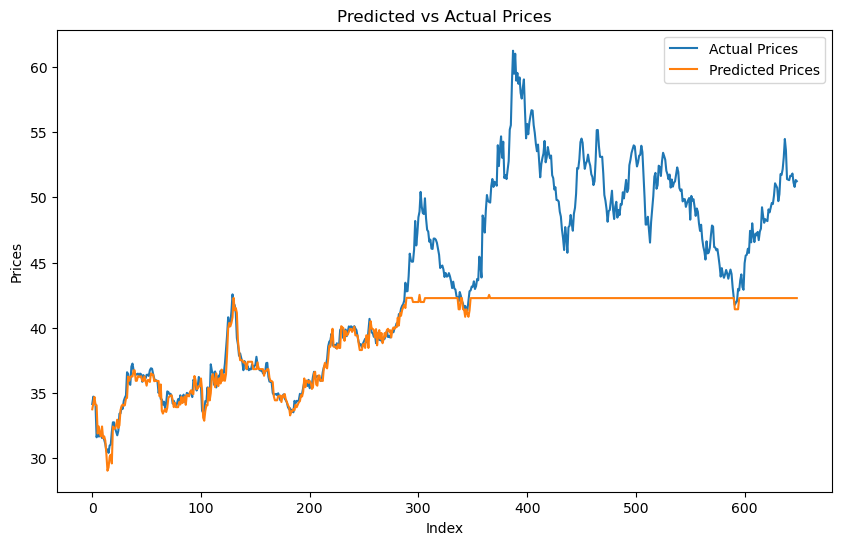

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(Actual_Prices['PFE'], label='Actual Prices')
plt.plot(RF_Predicted_Prices['PFE'], label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


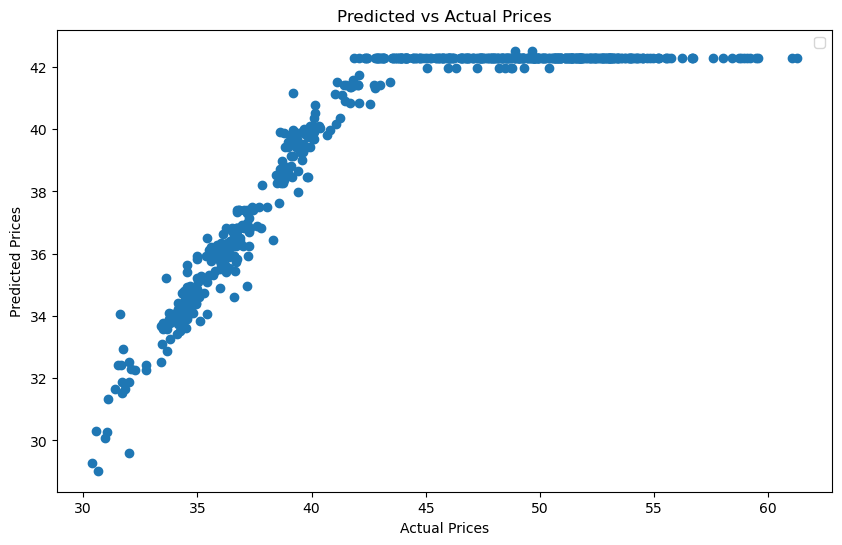

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], RF_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

In [11]:
#function to compute stock returns
def StockReturnsComputing(StockPrice, Rows, Columns):
    
   
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

### Data Preprocessing 

In [12]:
assetLabels = RF_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = RF_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.005  0.037  0.007 -0.104  0.036  0.026  0.042  0.     0.044  0.18 ]

Variance-Covariance Matrix of Returns:
 [[ 0.193  0.045  0.05   0.015  0.041  0.015  0.086 -0.005  0.014  0.026]
 [ 0.045  3.052  0.116  0.962  0.883  0.329  0.258 -0.006  0.341  0.949]
 [ 0.05   0.116  0.385  0.077  0.006  0.019  0.027 -0.004  0.025  0.092]
 [ 0.015  0.962  0.077  6.801  0.49   0.737  0.265 -0.042  0.372  0.781]
 [ 0.041  0.883  0.006  0.49   3.295  0.589  0.293 -0.002  0.454  0.829]
 [ 0.015  0.329  0.019  0.737  0.589  2.596  0.258 -0.017  0.104  0.256]
 [ 0.086  0.258  0.027  0.265  0.293  0.258  1.379 -0.014  0.206  0.171]
 [-0.005 -0.006 -0.004 -0.042 -0.002 -0.017 -0.014  0.085  0.011 -0.021]
 [ 0.014  0.341  0.025  0.372  0.454  0.104  0.206  0.011  1.921  0.342]
 [ 0.026  0.949  0.092  0.781  0.829  0.256  0.171 -0.021  0.342 11.825]]


### Mean Variance Optimization Algorithm 

In [13]:

from scipy import optimize 

def MaximizeSharpeRatioOptmzn(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        funcDenomr = np.sqrt(np.matmul(np.matmul(x, CovarReturns), x.T) )
        funcNumer = np.matmul(np.array(MeanReturns),x.T)-RiskFreeRate
        func = -(funcNumer / funcDenomr)
        return func

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit=np.repeat(0.33, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])\
    
    #invoke minimize solver
    opt = optimize.minimize (f, x0 = xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'SLSQP',  \
                             bounds = bnds, constraints = cons, tol = 10**-3)
    
    return opt

### Portfolio Returns with RF Predictions 

In [14]:
portfolioSize = len(RF_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))

expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[0.868]] 
Annualized Risk (%):   [[17.297]] 
Annualized Expected Portfolio Return(%):   [18.017]

Optimal weights (%):
 [[ 6.561]
 [ 3.795]
 [ 6.496]
 [ 0.   ]
 [ 2.146]
 [ 5.787]
 [23.212]
 [ 4.899]
 [19.995]
 [27.108]]


In [15]:
assetLabels = Actual_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = Actual_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.043  0.029  0.08  -0.112  0.025  0.015  0.077  0.064  0.047  0.137]

Variance-Covariance Matrix of Returns:
 [[2.405 0.694 0.851 1.327 0.568 0.792 0.801 0.913 0.727 0.217]
 [0.694 2.455 1.002 1.358 0.872 0.483 0.753 0.704 0.873 1.436]
 [0.851 1.002 3.204 1.322 0.728 0.514 0.698 0.973 0.769 0.808]
 [1.327 1.358 1.322 4.953 0.73  0.766 0.69  1.168 0.833 1.356]
 [0.568 0.872 0.728 0.73  2.256 0.538 0.526 0.564 0.818 1.177]
 [0.792 0.483 0.514 0.766 0.538 1.305 0.739 0.68  0.532 0.386]
 [0.801 0.753 0.698 0.69  0.526 0.739 2.917 0.528 0.634 0.646]
 [0.913 0.704 0.973 1.168 0.564 0.68  0.528 2.795 0.771 0.637]
 [0.727 0.873 0.769 0.833 0.818 0.532 0.634 0.771 1.446 0.876]
 [0.217 1.436 0.808 1.356 1.177 0.386 0.646 0.637 0.876 4.879]]


# Lasso Regression

##  Price Prediction 

In [17]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
stocks = ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']


#Hyperparameter
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1]}

tscv=TimeSeriesSplit(3)
data=pd.read_csv("C:/Users/kship/Documents/IB/predictions/asset_data/IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])


for stock in stocks:
    data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data=data.dropna()
    feat=data.columns
    feat=feat[6:]
    X = data[feat]
    
    #changing oreder of features
    close_lag_cols = [col for col in X.columns if col.startswith('Close_Lag_')]
    other_cols = [col for col in X.columns if col not in close_lag_cols]

    # Combine the two lists
    new_order = close_lag_cols + other_cols

    # Reorder columns in dataframe
    X = X[new_order]

    
    y = data['Close']
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train,y_train=train[feat],train['Close']
    X_test,y_test=test[feat],test['Close']

    X_scaler = RobustScaler()
    y_scaler = RobustScaler()

    # Fit the X_scaler on training data and transform it
    X_train_scaled = X_scaler.fit_transform(X_train)

    # Transform the X test data
    X_test_scaled = X_scaler.transform(X_test)

    # Fit the y_scaler on training target and transform it
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    model = Lasso()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    #  best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best parameters for {stock}: {best_params}")

    # Train the model using the best parameters
    best_rf_model = Lasso(**best_params)
    best_rf_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_rf_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    
    predictions[stock]=y_pred
    actuals[stock]=y_test
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    

    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)
print(metrics_df)
        

    

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for ABT: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for IBM: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for ORCL: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for INTC: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for MO: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for NVS: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for PFE: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for TMUS: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for KO: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for X

In [106]:
predictions

ABT         IBM       ORCL       INTC         MO        NVS  \
2593   88.524337  123.362548  52.883254  62.648911  40.756467  85.099638   
2594   89.843073  126.327939  53.793679  63.931164  41.930019  85.798227   
2595   92.451992  129.778801  54.884606  63.706123  42.845253  85.627678   
2596   90.463315  126.143589  54.209237  63.068695  42.199936  88.216113   
2597   92.054595  124.234593  54.043063  63.617812  41.840787  87.940156   
...          ...         ...        ...        ...        ...        ...   
3237  107.998530  141.011629  80.419786  26.258128  45.792919  90.792739   
3238  108.085026  141.749271  80.620229  26.176100  46.250478  90.761707   
3239  108.409011  142.507435  80.770585  26.085088  46.489889  91.006620   
3240  107.765599  140.148185  80.230486  25.750460  45.864559  90.747694   
3241  109.983913  141.178987  81.079758  26.166927  45.884456  91.450404   

            PFE        TMUS         KO         XOM  
2593  34.165116  100.027239  47.808703   49.171341  
2594  34.147961  100.707142  48.938696   53.064690  
2595  34.696868  103.672071  49.705442   54.739421  
2596  34.358114  103.020098  48.905059   53.572181  
2597  34.085181  105.105640  48.514939   50.764198  
...         ...         ...        ...         ...  
3237  51.558697  139.638280  63.240154  105.806312  
3238  51.741640  139.867115  63.702086  108.514436  
3239  51.070718  140.777229  64.072699  110.026561  
3240  50.731003  139.176378  63.469141  108.284646  
3241  51.229298  139.318708  63.821194  109.075273  

[649 rows x 10 columns]

In [107]:
actuals

ABT         IBM       ORCL       INTC         MO        NVS  \
2593   89.860001  126.252388  53.980000  64.339996  41.910000  85.889999   
2594   92.559998  129.780121  55.099998  63.669998  42.830002  85.669998   
2595   90.269997  126.070747  54.180000  63.040001  42.180000  88.430000   
2596   92.160004  124.158699  54.110001  63.869999  41.820000  88.000000   
2597   87.779999  112.820267  51.310001  59.700001  39.290001  84.400002   
...          ...         ...        ...        ...        ...        ...   
3237  108.180000  141.649994  80.849998  26.090000  46.240002  90.870003   
3238  108.570000  142.419998  80.980003  25.940001  46.480000  91.129997   
3239  107.830002  140.020004  80.330002  25.540001  45.849998  90.839996   
3240  110.309998  141.059998  81.400002  26.209999  45.869999  91.599998   
3241  109.790001  140.889999  81.739998  26.430000  45.709999  90.720001   

            PFE        TMUS         KO         XOM  
2593  34.146111  101.129997  49.090000   53.080002  
2594  34.715370  104.459999  49.849998   54.740002  
2595  34.354839  103.190002  49.000000   53.520000  
2596  34.079697  105.790001  48.619999   50.650002  
2597  31.593927  100.889999  45.540001   46.180000  
...         ...         ...        ...         ...  
3237  51.830002  140.020004  63.820000  108.680000  
3238  51.130001  140.990005  64.209999  110.190002  
3239  50.799999  138.979996  63.570000  108.379997  
3240  51.330002  139.399994  63.950001  109.199997  
3241  51.240002  140.000000  63.610001  110.300003  

[649 rows x 10 columns]

### Overall model performance

In [18]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

1.9393439126336158
0.9357838552329338
0.9766472293155092


### Storing predictions

In [19]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/LR_Predictions.csv')


In [21]:
LR_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/LR_Predictions.csv')
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
LR_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LR_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     88.524337  123.362548  52.883254  62.648911  40.756467  85.099638   
1     89.843073  126.327939  53.793679  63.931164  41.930019  85.798227   
2     92.451992  129.778801  54.884606  63.706123  42.845253  85.627678   
3     90.463315  126.143589  54.209237  63.068695  42.199936  88.216113   
4     92.054595  124.234593  54.043063  63.617812  41.840787  87.940156   
..          ...         ...        ...        ...        ...        ...   
644  107.998530  141.011629  80.419786  26.258128  45.792919  90.792739   
645  108.085026  141.749271  80.620229  26.176100  46.250478  90.761707   
646  108.409011  142.507435  80.770585  26.085088  46.489889  91.006620   
647  107.765599  140.148185  80.230486  25.750460  45.864559  90.747694   
648  109.983913  141.178987  81.079758  26.166927  45.884456  91.450404   

           PFE        TMUS         KO         XOM  
0    34.165116  100.027239  47.808703   49.171341  
1    34.147961  100.707142  48.938696   53.064690  
2    34.696868  103.672071  49.705442   54.739421  
3    34.358114  103.020098  48.905059   53.572181  
4    34.085181  105.105640  48.514939   50.764198  
..         ...         ...        ...         ...  
644  51.558697  139.638280  63.240154  105.806312  
645  51.741640  139.867115  63.702086  108.514436  
646  51.070718  140.777229  64.072699  110.026561  
647  50.731003  139.176378  63.469141  108.284646  
648  51.229298  139.318708  63.821194  109.075273  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

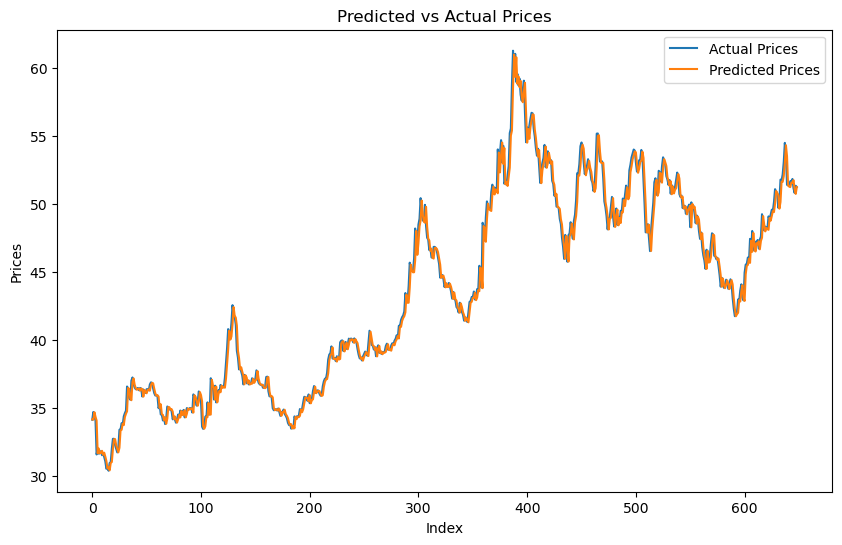

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(Actual_Prices['PFE'], label='Actual Prices')
plt.plot(LR_Predicted_Prices['PFE'], label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


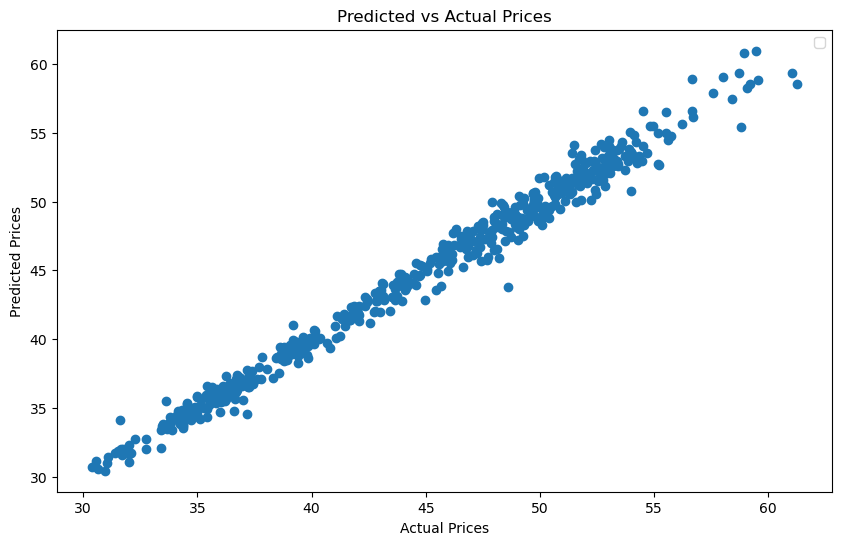

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], LR_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

### Data Preprocessing 


In [22]:
assetLabels = LR_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LR_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.044  0.033  0.078 -0.119  0.03   0.017  0.076  0.062  0.051  0.147]

Variance-Covariance Matrix of Returns:
 [[2.006 0.612 0.698 0.946 0.524 0.682 0.703 0.712 0.639 0.205]
 [0.612 2.368 0.865 1.054 0.86  0.445 0.711 0.607 0.83  1.406]
 [0.698 0.865 2.447 0.929 0.66  0.436 0.615 0.717 0.661 0.716]
 [0.946 1.054 0.929 3.122 0.6   0.604 0.509 0.729 0.616 1.088]
 [0.524 0.86  0.66  0.6   2.242 0.51  0.506 0.491 0.791 1.178]
 [0.682 0.445 0.436 0.604 0.51  1.171 0.676 0.565 0.488 0.36 ]
 [0.703 0.711 0.615 0.509 0.506 0.676 2.716 0.443 0.59  0.604]
 [0.712 0.607 0.717 0.729 0.491 0.565 0.443 2.096 0.635 0.535]
 [0.639 0.83  0.661 0.616 0.791 0.488 0.59  0.635 1.338 0.845]
 [0.205 1.406 0.716 1.088 1.178 0.36  0.604 0.535 0.845 4.756]]


### Portfolio Returns with LR Predictions 

In [23]:
portfolioSize = len(LR_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.137]] 
Annualized Risk (%):   [[17.112]] 
Annualized Expected Portfolio Return(%):   [22.46]

Optimal weights (%):
 [[ 8.374]
 [ 0.   ]
 [17.07 ]
 [ 0.   ]
 [ 0.328]
 [ 1.931]
 [17.123]
 [14.103]
 [10.333]
 [30.737]]


# SVR

##  Price Prediction 

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initialize empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])

data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
# List of stock names
stocks = ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

# Hyperparameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1]
}

# Initialize SVR model
model = SVR()

# Initialize Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

for stock in stocks:
    # Load stock data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data = data.dropna()

    # Features and target variable
    features = data.columns[6:]
    X = data[features]
    y = data['Close']

    # Train-test split
    split_point = int(len(data) * 0.8)
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    # Scaling
    X_scaler = RobustScaler()
    y_scaler = RobustScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for {stock}: {best_params}")

    # Train the model using best hyperparameters
    best_svr_model = SVR(**best_params)
    best_svr_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_svr_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    predictions[stock]=y_pred
    actuals[stock]=y_test
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Show metrics DataFrame
print(metrics_df)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for ABT: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for IBM: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for ORCL: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for INTC: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for MO: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for NVS: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalli

In [29]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/SVR_Predictions.csv')

### Overall model performance

In [30]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

0.49900394470605225
0.4284656069207605
0.9936548069962802


In [31]:
SVR_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/SVR_Predictions.csv')
SVR_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
SVR_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     89.058984  125.490732  53.521995  63.542724  41.119684  85.488894   
1     91.027003  128.827424  54.668077  63.832551  42.177982  85.721145   
2     92.000985  127.169937  54.556866  63.385360  42.645195  86.953325   
3     91.231276  124.813076  54.196193  63.589269  42.048838  88.164879   
4     90.506216  116.144092  52.477799  61.487696  41.044751  86.252790   
..          ...         ...        ...        ...        ...        ...   
644  108.282645  141.472130  80.825892  26.158482  45.966298  90.849224   
645  108.458159  142.193010  80.941533  26.041881  46.319766  90.930726   
646  108.171576  140.739321  80.545114  25.772255  46.289069  91.001119   
647  108.831488  140.675280  80.929802  25.929842  45.875962  91.172713   
648  110.192303  140.943490  81.532054  26.292473  45.883278  91.234533   

           PFE        TMUS         KO         XOM  
0    34.271847  100.588966  48.797737   52.584550  
1    34.390539  101.915998  49.608479   54.549372  
2    34.538406  103.760115  49.176588   53.651455  
3    34.271255  103.781948  48.732081   50.982755  
4    32.911660  104.026981  46.228745   46.711343  
..         ...         ...        ...         ...  
644  51.762196  140.106312  63.710813  108.343426  
645  51.455452  140.280322  64.100170  110.006867  
646  51.030462  140.841104  63.701065  108.612610  
647  51.020602  139.205253  63.861943  109.096432  
648  51.261872  139.690587  63.651375  110.163397  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


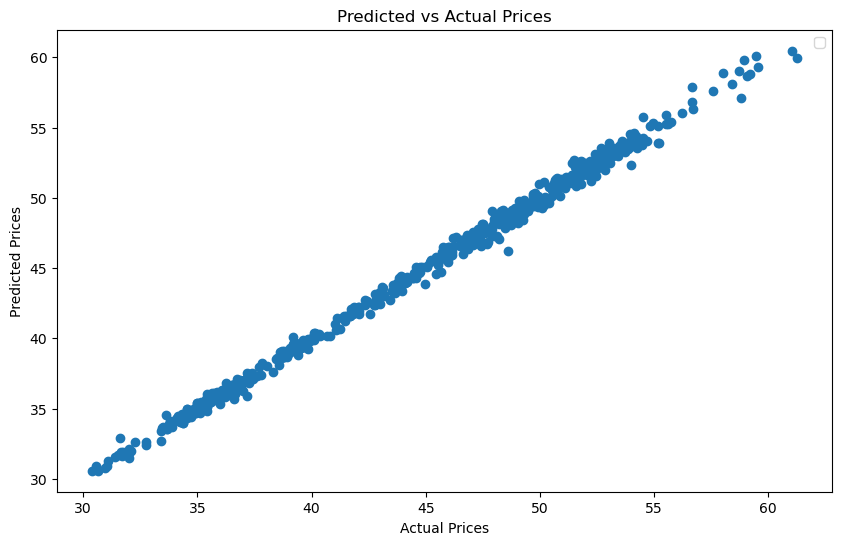

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(Ac### Visualizing Actual vs Predictedtual_Prices['PFE'], SVR_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

### Data Preprocessing 

In [33]:
assetLabels = SVR_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = SVR_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.039  0.025  0.073 -0.125  0.024  0.013  0.069  0.058  0.046  0.133]

Variance-Covariance Matrix of Returns:
 [[1.156 0.23  0.373 0.504 0.306 0.361 0.386 0.408 0.26  0.034]
 [0.23  1.455 0.534 0.756 0.359 0.214 0.35  0.302 0.514 0.937]
 [0.373 0.534 1.615 0.661 0.31  0.238 0.385 0.362 0.444 0.503]
 [0.504 0.756 0.661 2.292 0.361 0.389 0.302 0.412 0.409 0.803]
 [0.306 0.359 0.31  0.361 1.359 0.291 0.249 0.278 0.298 0.456]
 [0.361 0.214 0.238 0.389 0.291 0.663 0.384 0.325 0.271 0.138]
 [0.386 0.35  0.385 0.302 0.249 0.384 1.374 0.24  0.338 0.259]
 [0.408 0.302 0.362 0.412 0.278 0.325 0.24  1.416 0.251 0.174]
 [0.26  0.514 0.444 0.409 0.298 0.271 0.338 0.251 0.917 0.577]
 [0.034 0.937 0.503 0.803 0.456 0.138 0.259 0.174 0.577 3.875]]


### Portfolio Returns with SVR Predictions 

In [34]:
portfolioSize = len(SVR_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.277]] 
Annualized Risk (%):   [[13.325]] 
Annualized Expected Portfolio Return(%):   [20.019]

Optimal weights (%):
 [[ 9.253]
 [ 0.   ]
 [17.073]
 [ 0.   ]
 [ 0.726]
 [ 0.38 ]
 [19.807]
 [16.109]
 [ 9.558]
 [27.095]]


# XGBoost

##  Price Prediction 

In [35]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import xgboost as xgb


# List of stock names
data=pd.read_csv("C:/Users/kship/Documents/IB/predictions/asset_data/IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']


# Hyperparameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150],
    'objective': ['reg:squarederror'],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

for stock in stocks:
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data = data.dropna()

    # Features and target variable
    feat = data.columns[6:]
    X = data[feat]
    y = data['Close']

    # Train-test split
    split_point = int(len(data) * 0.8)
    X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

    # Scaling
    X_scaler = RobustScaler()
    y_scaler = RobustScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    # Initialize model
    model = xgb.XGBRegressor()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Best hyperparameters
    best_params = grid_search.best_params_

    print(f"Best hyperparameters for {stock}: {best_params}")

    # Train model using best hyperparameters
    best_model = xgb.XGBRegressor(**best_params)
    best_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    predictions[stock] = y_pred
    actuals[stock] = y_test

    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Show metrics DataFrame
print(metrics_df)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for ABT: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'objective': 'reg:squarederror', 'subsample': 0.9}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for IBM: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.9}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for ORCL: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.9}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for INTC: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.8}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperpar

In [37]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/XGB_Predictions.csv')

### Overall model performance 

In [38]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

248.37555726626928
8.937850323516892
-0.837612467826476


In [39]:
XGB_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/XGB_Predictions.csv')
XGB_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
XGB_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0    88.514040  123.479385  52.686780  61.087776  41.837776  85.187160   
1    88.560486  125.447390  53.170990  63.088768  42.857260  85.190865   
2    89.573000  128.852620  54.022842  62.692688  44.071450  85.327370   
3    89.472790  126.665780  53.400234  61.757310  43.088226  87.697900   
4    90.922260  124.282074  53.478470  62.990936  42.953000  87.006550   
..         ...         ...        ...        ...        ...        ...   
644  91.512770  140.811950  55.569435  27.365160  46.553894  90.206240   
645  91.432390  141.172450  55.569435  27.289438  47.310223  90.206240   
646  91.489990  142.775920  55.569435  27.289438  47.432400  90.649800   
647  91.424120  140.541410  55.569435  26.917340  46.520200  90.206240   
648  91.424120  140.837940  55.569435  27.289438  46.538742  91.244255   

           PFE       TMUS         KO        XOM  
0    34.182274  99.122440  47.639780  47.905770  
1    34.238525  97.341070  47.910460  47.309586  
2    34.653065  98.033806  48.240227  47.750366  
3    34.482304  98.441864  48.343178  47.817562  
4    34.227123  94.620490  48.153984  48.485065  
..         ...        ...        ...        ...  
644  40.865300  94.247765  56.565792  99.311880  
645  40.865300  94.558400  56.565792  99.311880  
646  40.865300  94.558400  56.565792  99.311880  
647  40.865300  94.558400  56.565792  99.311880  
648  40.865300  94.558400  56.565792  99.311880  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


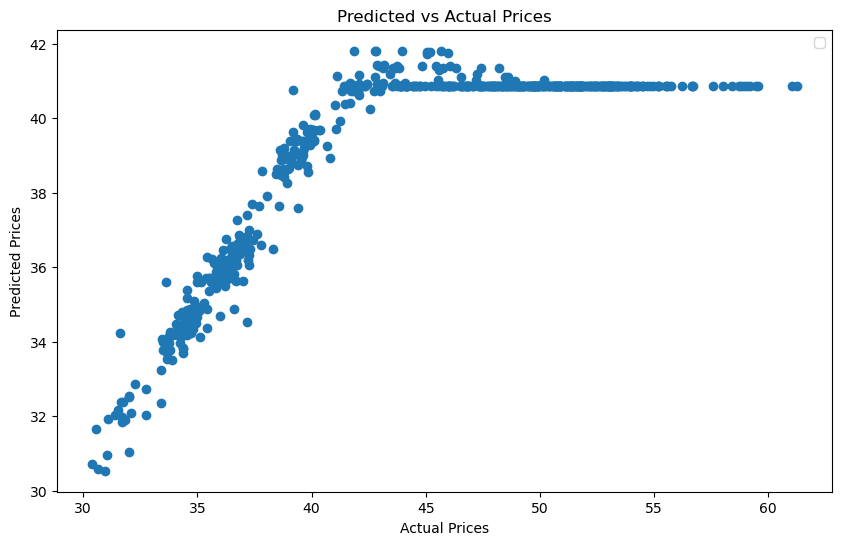

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], XGB_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predictedv Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

In [40]:
assetLabels = XGB_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = XGB_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.006  0.029  0.009 -0.107  0.026  0.015  0.031 -0.006  0.03   0.138]

Variance-Covariance Matrix of Returns:
 [[ 0.129  0.056  0.028  0.018 -0.005  0.     0.057 -0.007  0.009  0.05 ]
 [ 0.056  1.702  0.079  0.801  0.543  0.319  0.201 -0.01   0.284  0.626]
 [ 0.028  0.079  0.2    0.061  0.073  0.01   0.043 -0.002  0.062  0.095]
 [ 0.018  0.801  0.061  3.477  0.389  0.535  0.144 -0.037  0.254  0.607]
 [-0.005  0.543  0.073  0.389  1.907  0.354  0.169 -0.013  0.311  0.542]
 [ 0.     0.319  0.01   0.535  0.354  0.913  0.144  0.004  0.174  0.211]
 [ 0.057  0.201  0.043  0.144  0.169  0.144  0.605 -0.005  0.138  0.216]
 [-0.007 -0.01  -0.002 -0.037 -0.013  0.004 -0.005  0.193  0.005 -0.057]
 [ 0.009  0.284  0.062  0.254  0.311  0.174  0.138  0.005  0.672  0.184]
 [ 0.05   0.626  0.095  0.607  0.542  0.211  0.216 -0.057  0.184  5.147]]


### Portfolio Returns with XGB Predictions 

In [41]:
portfolioSize = len(XGB_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[0.908]] 
Annualized Risk (%):   [[14.868]] 
Annualized Expected Portfolio Return(%):   [16.503]

Optimal weights (%):
 [[ 8.   ]
 [ 2.365]
 [ 9.104]
 [ 0.   ]
 [ 1.049]
 [ 4.092]
 [20.003]
 [ 0.   ]
 [18.204]
 [37.183]]


# Deep Learning Models

# LSTM

## LSTM price prediction with Adam Optimizer

Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9857663242549257
73/73 [==============================] - 3s 14ms/step - loss: 0.0242 - val_loss: 9.0179e-04
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 9.2858e-
val_r2: 0.9879351051035947
73/73 [==============================] - 0s 6ms/step - loss: 9.1526e-04 - val_loss: 7.6439e-04
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 7.4322e-
val_r2: 0.9905426042951521
73/73 [==============================] - 0s 6ms/step - loss: 7.4263e-04 - val_loss: 5.9919e-04
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 6.3721e-
val_r2: 0.9908184485756379
73/73 [==============================] - 1s 7ms/step - loss: 6.1402e-04 - val_loss: 5.8171e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 4.9486e-
val_r2: 0.9929457765113753
73/73 [==============================] - 1s 8ms/step - loss: 4.9556e-04 - val_loss: 4.4693e-04
Epoch 6/50
9

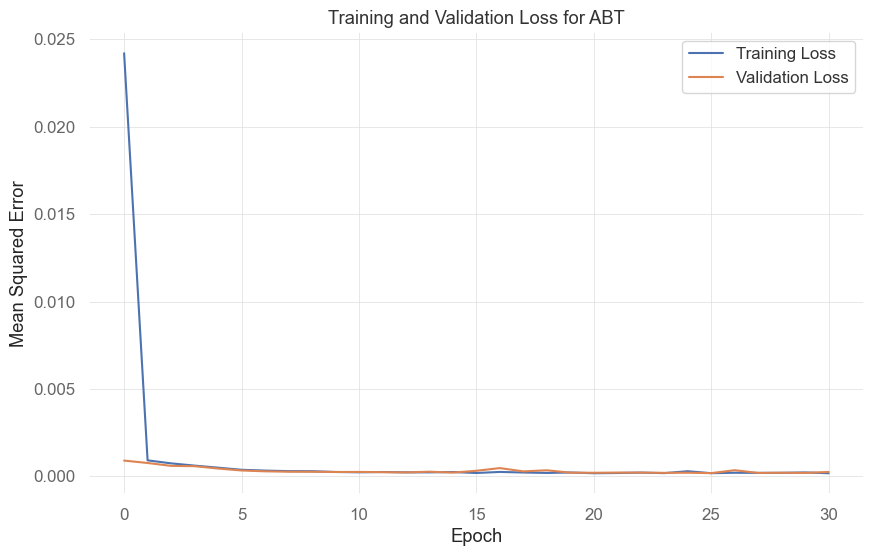

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.07
val_r2: 0.9145539754499286
73/73 [==============================] - 4s 16ms/step - loss: 0.0632 - val_loss: 0.0035
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9494889555659387
73/73 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9693776806321123
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9712071399521264
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9735348027444669
73/73 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50


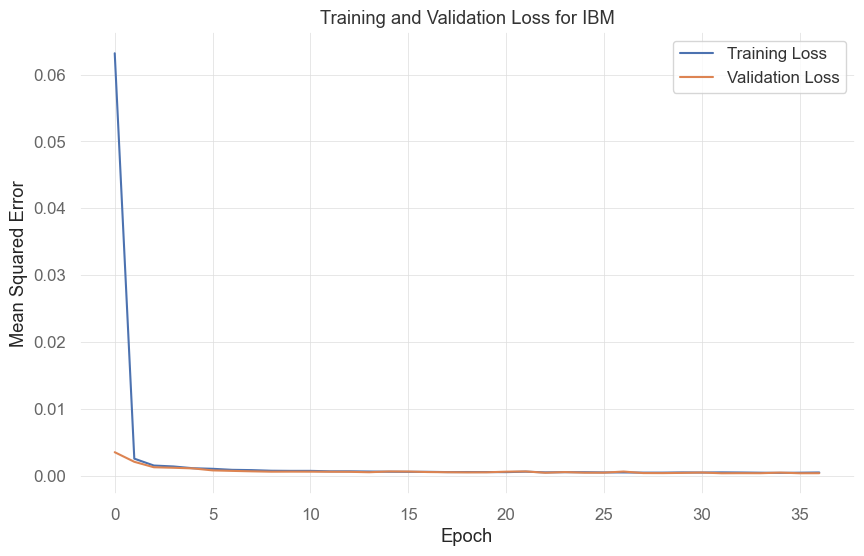

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.01
val_r2: 0.9760231219335729
73/73 [==============================] - 3s 13ms/step - loss: 0.0158 - val_loss: 0.0013
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9845206240937341
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 8.2274e-04
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 8.2989e-
val_r2: 0.9871967747672423
73/73 [==============================] - 0s 5ms/step - loss: 8.0139e-04 - val_loss: 6.8050e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 7.4997e-
val_r2: 0.9897573331534691
73/73 [==============================] - 0s 5ms/step - loss: 7.2774e-04 - val_loss: 5.4441e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 6.4368e-
val_r2: 0.9905025097148261
73/73 [==============================] - 0s 6ms/step - loss: 6.351

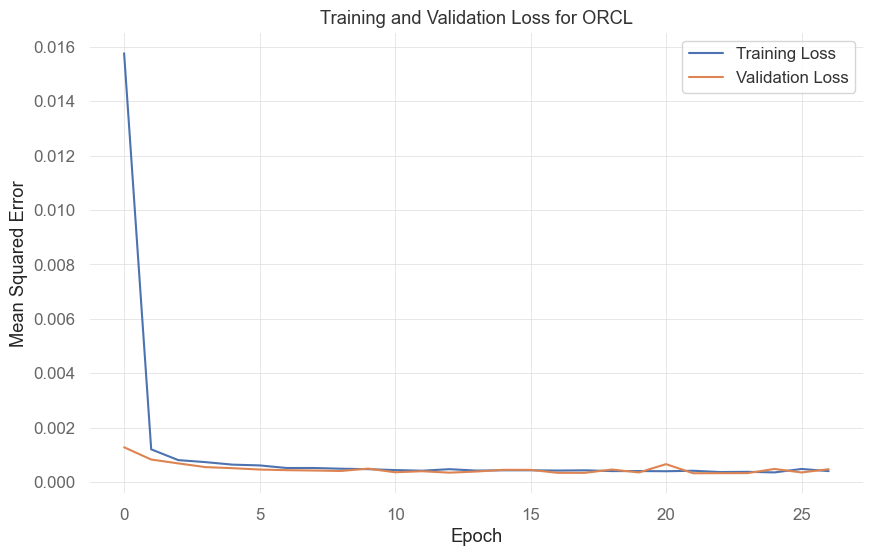

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.02
val_r2: 0.9806412641780144
73/73 [==============================] - 4s 15ms/step - loss: 0.0217 - val_loss: 0.0012
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.001
val_r2: 0.9849975413539833
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 9.1575e-04
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9863325660982504
73/73 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.3426e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 7.7146e-
val_r2: 0.990100193241504
73/73 [==============================] - 0s 7ms/step - loss: 7.6293e-04 - val_loss: 6.0429e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 6.1728e-
val_r2: 0.9915891071228676
73/73 [==============================] - 0s 6ms/step - loss: 6.0381e-04 - 

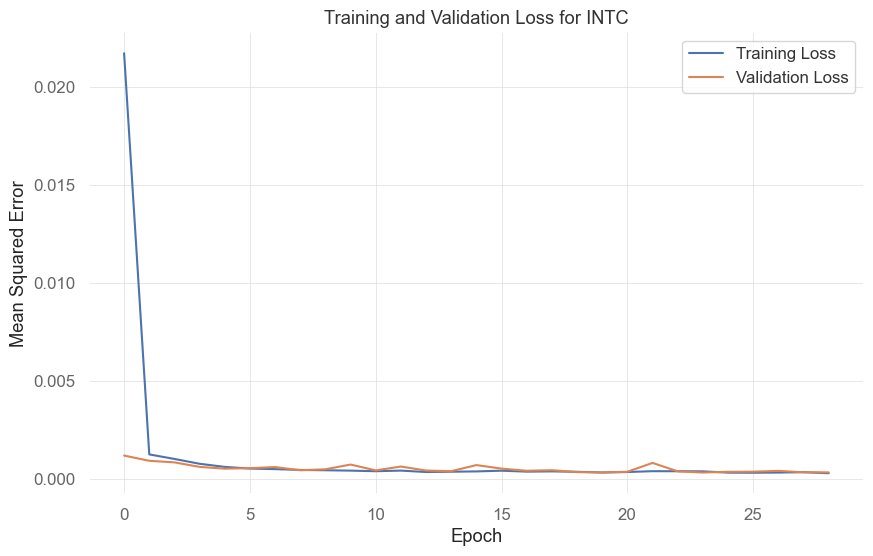

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.03
val_r2: 0.9812988198843766
73/73 [==============================] - 3s 13ms/step - loss: 0.0258 - val_loss: 0.0013
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 8.9009e-
val_r2: 0.9860068050605153
73/73 [==============================] - 0s 5ms/step - loss: 8.8061e-04 - val_loss: 9.4874e-04
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 6.5714e-
val_r2: 0.9881360883918981
73/73 [==============================] - 0s 5ms/step - loss: 6.4170e-04 - val_loss: 8.0437e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 5.4536e-
val_r2: 0.990229210395585
73/73 [==============================] - 0s 6ms/step - loss: 5.3576e-04 - val_loss: 6.6246e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 4.2380e-
val_r2: 0.9916121834292616
73/73 [==============================] - 0s 5ms/step - loss

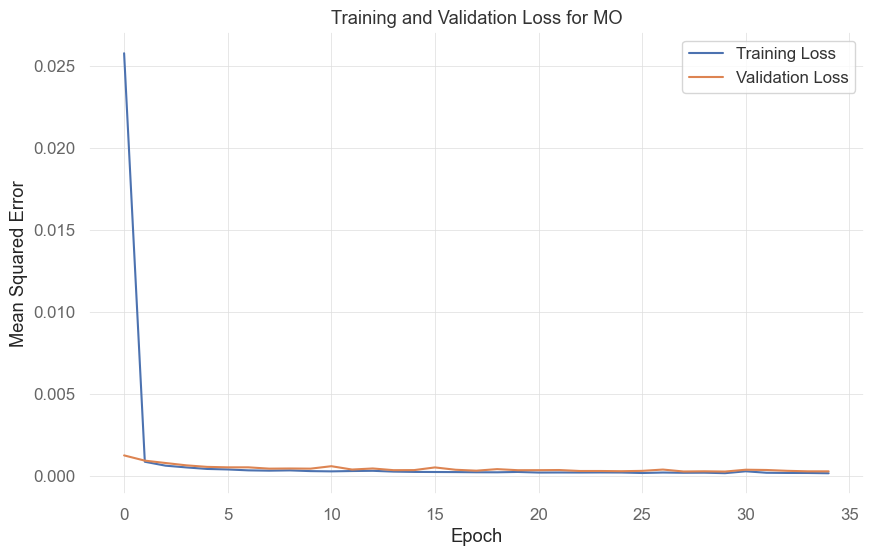

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.02
val_r2: 0.9768480012816987
73/73 [==============================] - 3s 16ms/step - loss: 0.0248 - val_loss: 0.0013
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.982317124747084
73/73 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9870057052726947
73/73 [==============================] - 0s 5ms/step - loss: 9.5751e-04 - val_loss: 7.4163e-04
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 7.5507e-
val_r2: 0.9853131176965029
73/73 [==============================] - 0s 6ms/step - loss: 7.5682e-04 - val_loss: 8.3824e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 6.5225e-
val_r2: 0.9857110912107536
73/73 [==============================] - 0s 5ms/step - loss: 6.6865e-04 - v

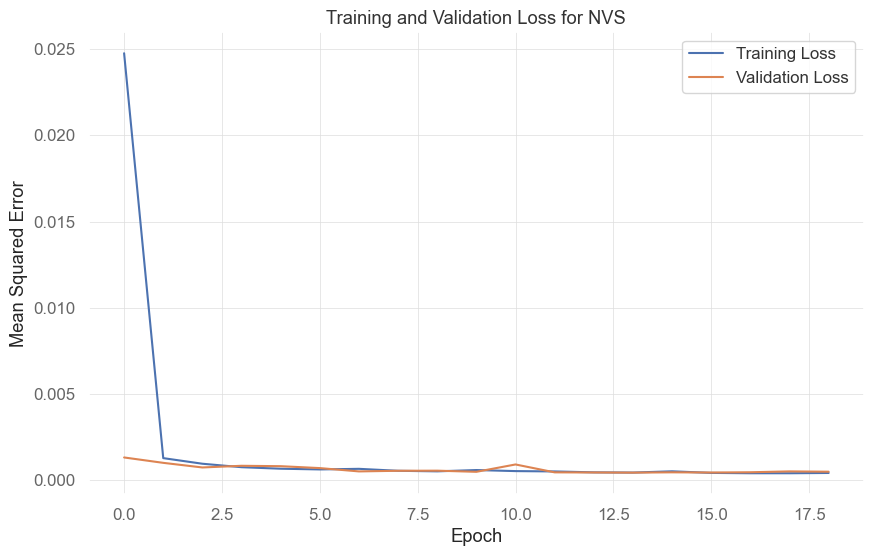

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.04
val_r2: 0.9657433936840452
73/73 [==============================] - 3s 15ms/step - loss: 0.0363 - val_loss: 0.0019
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9743313074004945
73/73 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9829553490535906
73/73 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 9.3823e-04
Epoch 4/50
9/9 [==============================] - 0s 5ms/step loss: 7.7635e-
val_r2: 0.9875376496558208
73/73 [==============================] - 0s 6ms/step - loss: 7.7782e-04 - val_loss: 6.8600e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 6.1824e-
val_r2: 0.989754970102541
73/73 [==============================] - 0s 6ms/step - loss: 6.2665e-04 - val_l

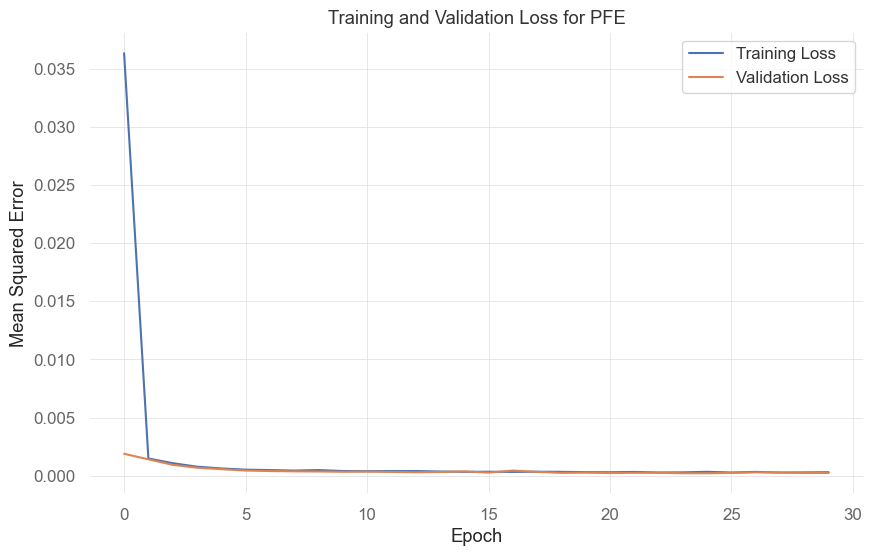

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.01
val_r2: 0.9893429205316703
73/73 [==============================] - 3s 13ms/step - loss: 0.0121 - val_loss: 6.5633e-04
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 5.1073e-
val_r2: 0.9910810067112675
73/73 [==============================] - 0s 5ms/step - loss: 5.1040e-04 - val_loss: 5.4928e-04
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 4.7187e-
val_r2: 0.9919119840115216
73/73 [==============================] - 0s 5ms/step - loss: 4.4695e-04 - val_loss: 4.9811e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 4.0624e-
val_r2: 0.9925081298618194
73/73 [==============================] - 0s 5ms/step - loss: 3.9885e-04 - val_loss: 4.6139e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 4.0242e-
val_r2: 0.992933726862494
73/73 [==============================] - 0s 5ms/step - 

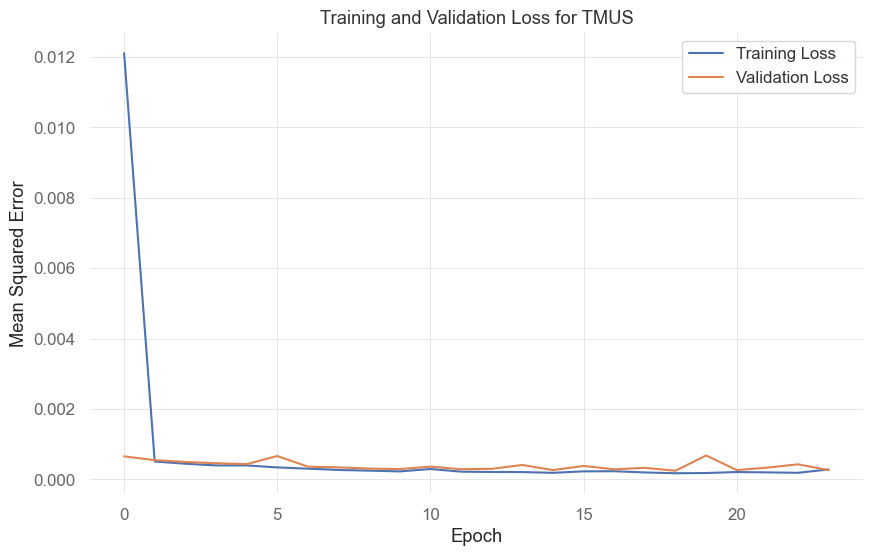

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9477855336790746
73/73 [==============================] - 3s 13ms/step - loss: 0.0207 - val_loss: 0.0018
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.960206846828193
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.0011
val_r2: 0.9674219093560328
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 9.4819e-
val_r2: 0.9679557670928434
73/73 [==============================] - 0s 6ms/step - loss: 9.4819e-04 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 7.6126e-
val_r2: 0.9736419981753136
73/73 [==============================] - 0s 5ms/step - loss: 7.9454e-04 - val_loss: 9

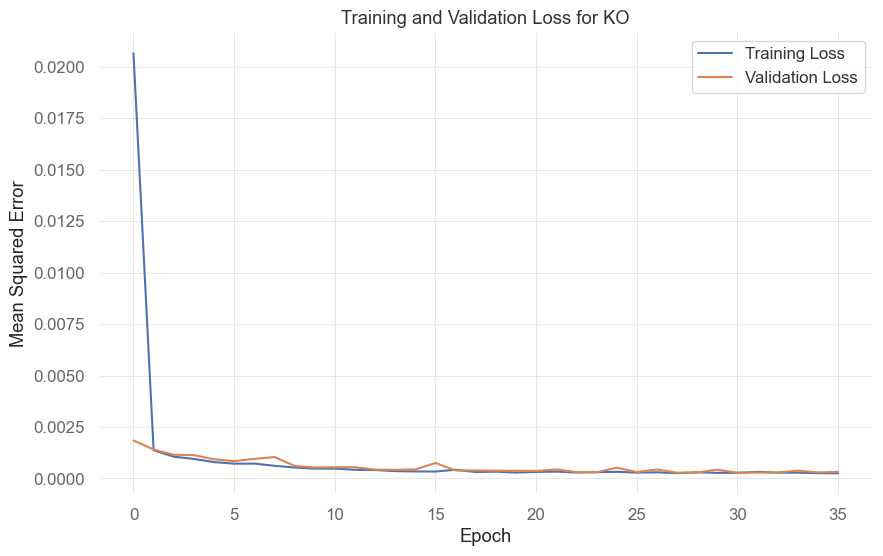

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.03
val_r2: 0.9107161584141716
73/73 [==============================] - 3s 13ms/step - loss: 0.0300 - val_loss: 0.0021
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9268537565856539
73/73 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9610692263871923
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 9.2768e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 7.8513e-
val_r2: 0.969283686812732
73/73 [==============================] - 1s 7ms/step - loss: 7.8921e-04 - val_loss: 7.3194e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 6.2754e-
val_r2: 0.9736409987544588
73/73 [==============================] - 0s 5ms/step - loss: 6.5187e-04 - val_l

Epoch 42/50
9/9 [==============================] - 0s 2ms/step loss: 3.0253e-
val_r2: 0.987135403242015
73/73 [==============================] - 0s 5ms/step - loss: 3.1270e-04 - val_loss: 3.0655e-04
Epoch 43/50
9/9 [==============================] - 0s 2ms/step loss: 3.0325e-
val_r2: 0.9877211962441836
73/73 [==============================] - 0s 5ms/step - loss: 3.0529e-04 - val_loss: 2.9259e-04
Epoch 44/50
9/9 [==============================] - 0s 2ms/step loss: 3.1812e-
val_r2: 0.9877247360459013
73/73 [==============================] - 0s 5ms/step - loss: 3.2591e-04 - val_loss: 2.9251e-04
Epoch 45/50
9/9 [==============================] - 0s 2ms/step loss: 2.8718e-
val_r2: 0.9864788001440703
73/73 [==============================] - 0s 5ms/step - loss: 2.9255e-04 - val_loss: 3.2220e-04
Epoch 46/50
9/9 [==============================] - 0s 929us/steposs: 2.9633e-
val_r2: 0.9839448985651792
73/73 [==============================] - 0s 5ms/step - loss: 2.9373e-04 - val_loss: 3.8258e-04
E

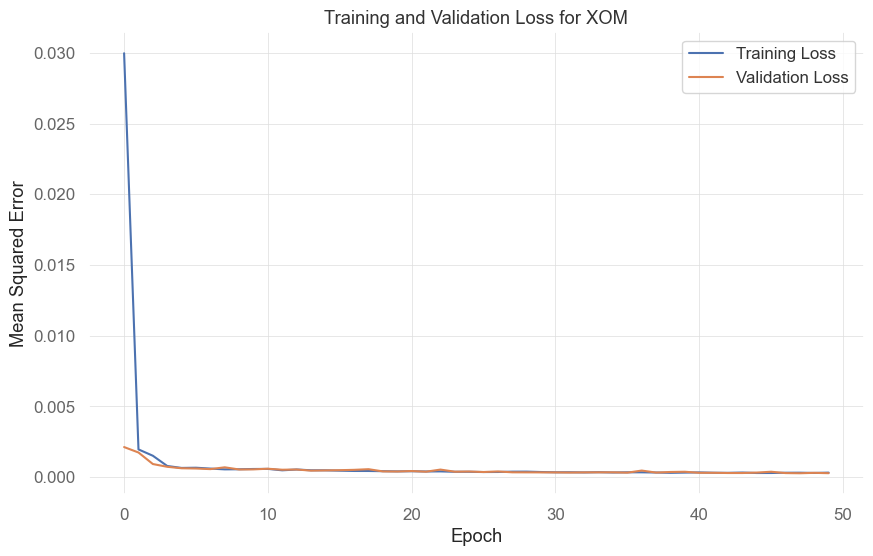

21/21 [==============================] - 0s 2ms/step
  Stock        MSE       MAE        R2
0   ABT  14.398563  3.088482  0.872032
1   IBM   5.700543  1.718480  0.938789
2  ORCL   7.577761  2.002869  0.949390
3  INTC   2.075693  1.021260  0.980404
4    MO   0.792171  0.638288  0.957880
5   NVS   2.406831  1.199913  0.865530
6   PFE   1.168414  0.780855  0.977673
7  TMUS   8.297292  2.225634  0.948189
8    KO   0.853711  0.693112  0.971747
9   XOM   4.779383  1.703744  0.990348


In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping, Callback

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
data=pd.read_csv("C:/Users/kship/Documents/IB/predictions/asset_data/IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = RobustScaler()
    scaler_Y = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.1)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [408]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

4.805036155958165
1.5072637073064254
0.9451980846104961


In [409]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adam.csv')

In [49]:
LSTM_Adam_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adam.csv')
LSTM_Adam_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LSTM_Adam_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     91.804985  122.687416  52.996006  62.433144  40.136650  85.170440   
1     91.274160  123.941000  53.741558  63.457428  40.635353  85.323920   
2     90.922910  127.546265  54.427505  64.116710  41.581200  85.273506   
3     90.573080  128.311630  54.520874  63.308662  41.809870  86.289276   
4     89.905810  126.382065  54.241215  64.167630  41.864685  86.972930   
..          ...         ...        ...        ...        ...        ...   
644  106.712654  141.274230  83.173450  26.586739  46.294520  90.750200   
645  105.919560  141.739610  83.380340  26.289830  46.177940  90.662340   
646  105.649810  141.764800  83.096710  26.263659  46.229200  91.125190   
647  105.895100  141.287810  82.562614  26.190033  46.067240  91.257180   
648  106.551040  141.061130  82.942050  26.152870  46.073460  91.026790   

           PFE        TMUS         KO         XOM  
0    34.380726  101.418396  47.912070   48.361156  
1    34.395054   99.696014  48.444183   50.044838  
2    34.119514  101.159775  49.204983   52.437584  
3    34.208126  103.108870  49.409935   52.980450  
4    34.185047  104.936410  48.974930   51.601597  
..         ...         ...        ...         ...  
644  52.189125  139.537600  63.502934  106.392914  
645  51.739807  139.192470  63.888410  107.892250  
646  51.676980  138.780600  64.320190  109.201690  
647  51.457256  138.321060  64.246220  108.482960  
648  51.361890  139.336820  64.481880  109.002620  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


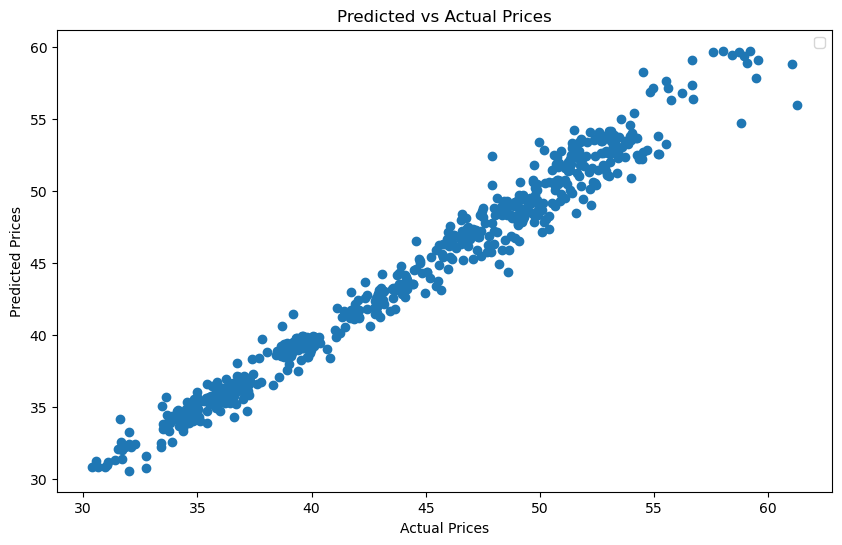

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], LSTM_Adam_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

In [51]:
assetLabels = LSTM_Adam_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LSTM_Adam_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.027  0.027  0.077 -0.126  0.026  0.013  0.067  0.055  0.049  0.136]

Variance-Covariance Matrix of Returns:
 [[0.708 0.13  0.188 0.145 0.105 0.169 0.24  0.172 0.159 0.059]
 [0.13  1.097 0.386 0.354 0.231 0.069 0.197 0.268 0.312 0.42 ]
 [0.188 0.386 1.671 0.408 0.239 0.098 0.27  0.235 0.371 0.335]
 [0.145 0.354 0.408 1.637 0.277 0.269 0.215 0.184 0.183 0.34 ]
 [0.105 0.231 0.239 0.277 0.905 0.099 0.146 0.161 0.268 0.335]
 [0.169 0.069 0.098 0.269 0.099 0.477 0.178 0.209 0.141 0.046]
 [0.24  0.197 0.27  0.215 0.146 0.178 1.09  0.207 0.21  0.129]
 [0.172 0.268 0.235 0.184 0.161 0.209 0.207 1.216 0.166 0.216]
 [0.159 0.312 0.371 0.183 0.268 0.141 0.21  0.166 0.708 0.171]
 [0.059 0.42  0.335 0.34  0.335 0.046 0.129 0.216 0.171 2.082]]


### Portfolio Returns with LSTM-Adam Predictions 

In [53]:
portfolioSize = len(LSTM_Adam_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.616]] 
Annualized Risk (%):   [[11.232]] 
Annualized Expected Portfolio Return(%):   [21.148]

Optimal weights (%):
 [[ 6.187]
 [ 0.   ]
 [13.574]
 [ 0.   ]
 [ 0.114]
 [ 2.504]
 [19.152]
 [12.004]
 [12.617]
 [33.848]]


## LSTM price prediction with RMSProp Optimizer

Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9868648597418029
73/73 [==============================] - 3s 14ms/step - loss: 0.0057 - val_loss: 8.5679e-04
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.0010  
val_r2: 0.9812425970851493
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9917150388823074
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 5.4042e-04
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 8.8675e-
val_r2: 0.9936208204823499
73/73 [==============================] - 0s 5ms/step - loss: 8.6723e-04 - val_loss: 4.1611e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 8.9565e-
val_r2: 0.9935052103926165
73/73 [==============================] - 0s 5ms/step - loss: 8.3325e-04 - val_loss: 4.2365e-04
Epoch 6/50
9/9 [============

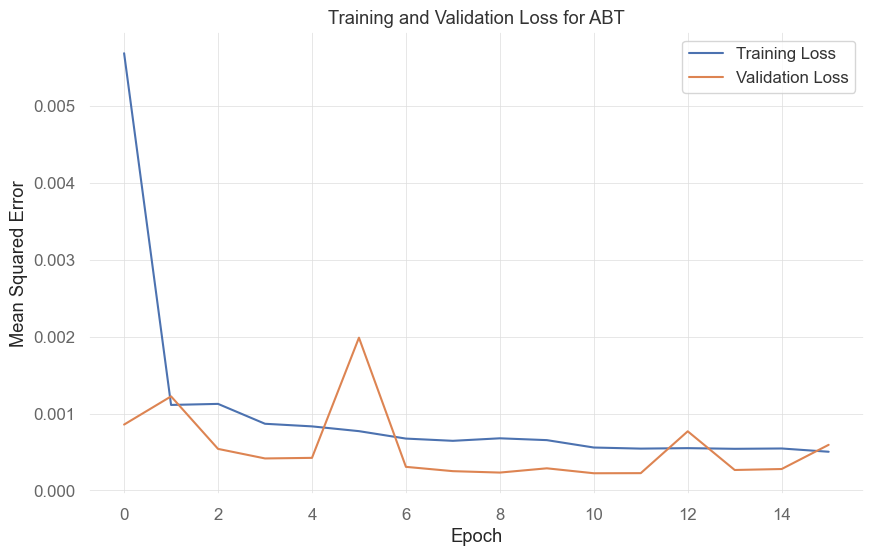

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.05
val_r2: 0.92987313705718
73/73 [==============================] - 3s 13ms/step - loss: 0.0465 - val_loss: 0.0029
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9496709829995069
73/73 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9566909279705642
73/73 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9726966605558501
73/73 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.001
val_r2: 0.9655271196384743
73/73 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/50
9

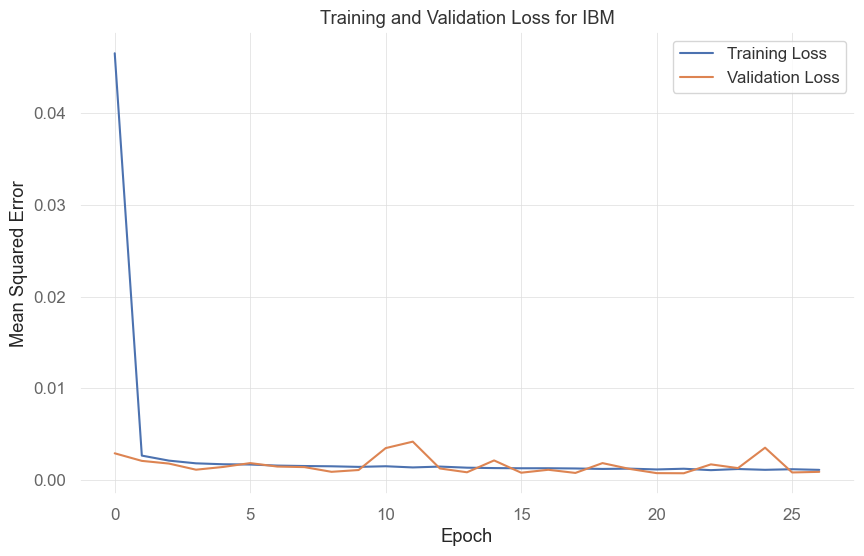

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.8967835986323185
73/73 [==============================] - 3s 13ms/step - loss: 0.0114 - val_loss: 0.0058
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.963813860056401
73/73 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9760271365423012
73/73 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9832008323148503
73/73 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 9.4442e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.0016
val_r2: 0.98249869312667
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 9.8389e-04
Epoc

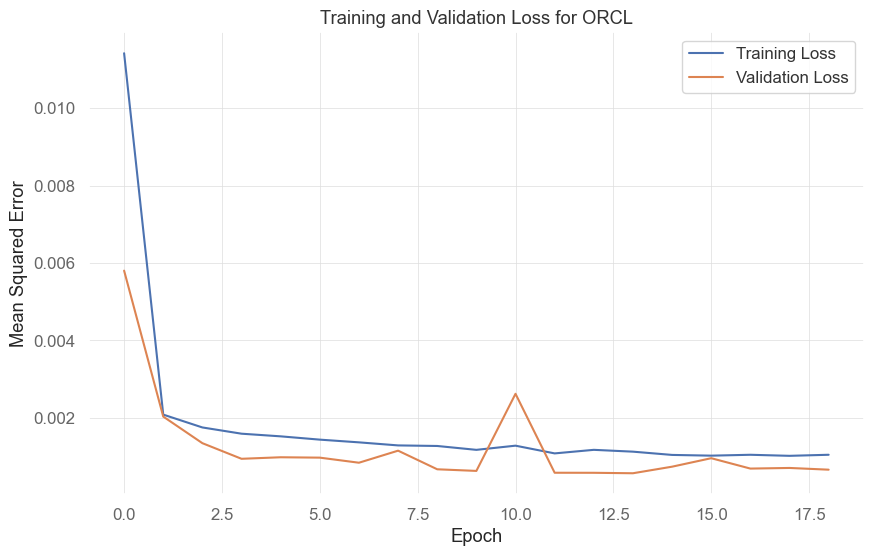

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.01
val_r2: 0.966438476187446
73/73 [==============================] - 3s 14ms/step - loss: 0.0095 - val_loss: 0.0018
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9471528277450006
73/73 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9834867210080808
73/73 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 8.7215e-04
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.0011
val_r2: 0.9652544781780481
73/73 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 9.3914e-
val_r2: 0.9840382473823952
73/73 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.4302e-0

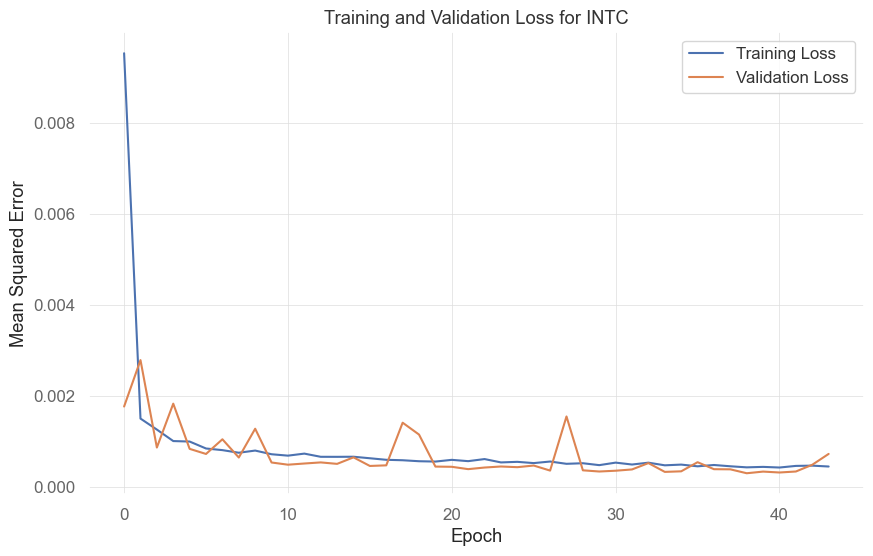

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.01
val_r2: 0.9837662713721443
73/73 [==============================] - 3s 13ms/step - loss: 0.0098 - val_loss: 0.0012
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9788058372410072
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9900268623225253
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 7.1915e-04
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9738191546503365
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.0010  
val_r2: 0.9852714117346014
73/73 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0011
Epo

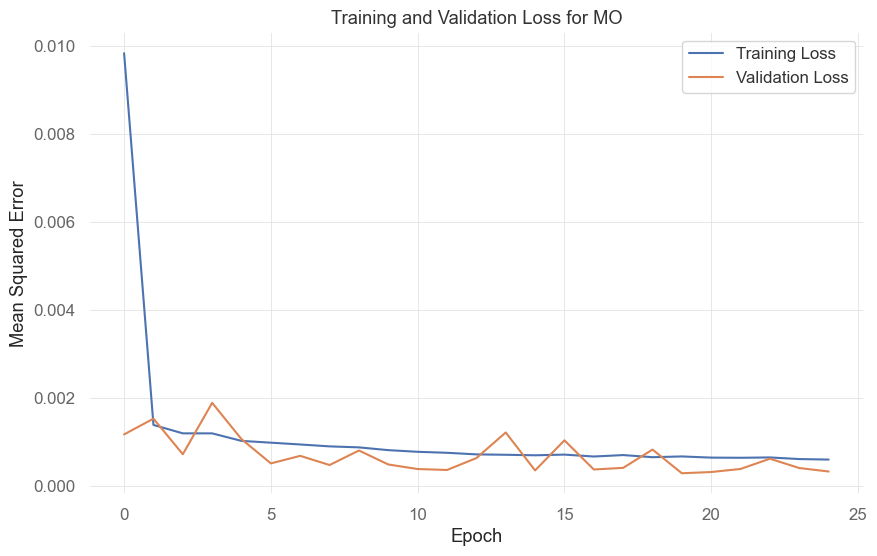

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9383826466718492
73/73 [==============================] - 3s 13ms/step - loss: 0.0083 - val_loss: 0.0035
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9480870779656522
73/73 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9645131350878247
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9776654663532844
73/73 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.001
val_r2: 0.9736203723783228
73/73 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50

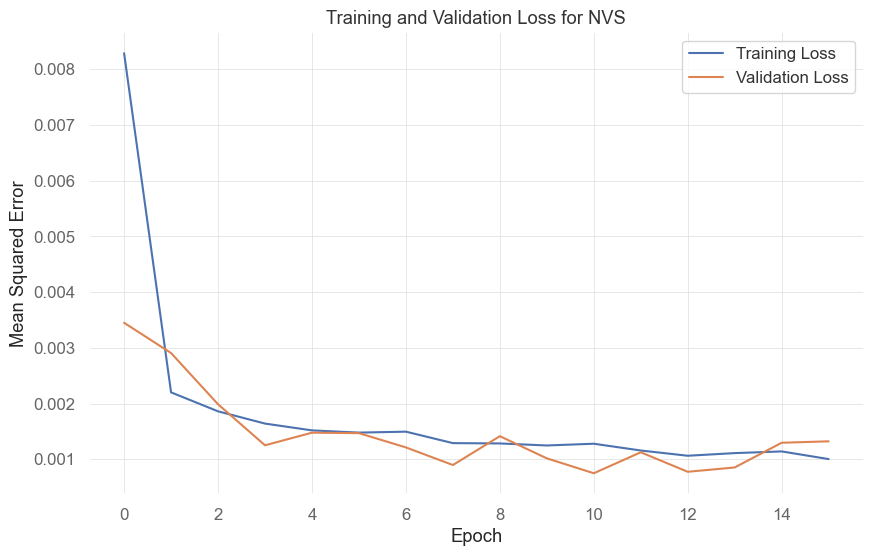

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.01
val_r2: 0.961743509133184
73/73 [==============================] - 4s 14ms/step - loss: 0.0121 - val_loss: 0.0021
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9805138263131855
73/73 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.0012
val_r2: 0.9905963145386656
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 5.1684e-04
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.001
val_r2: 0.9722015660637451
73/73 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.975007902513046
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 

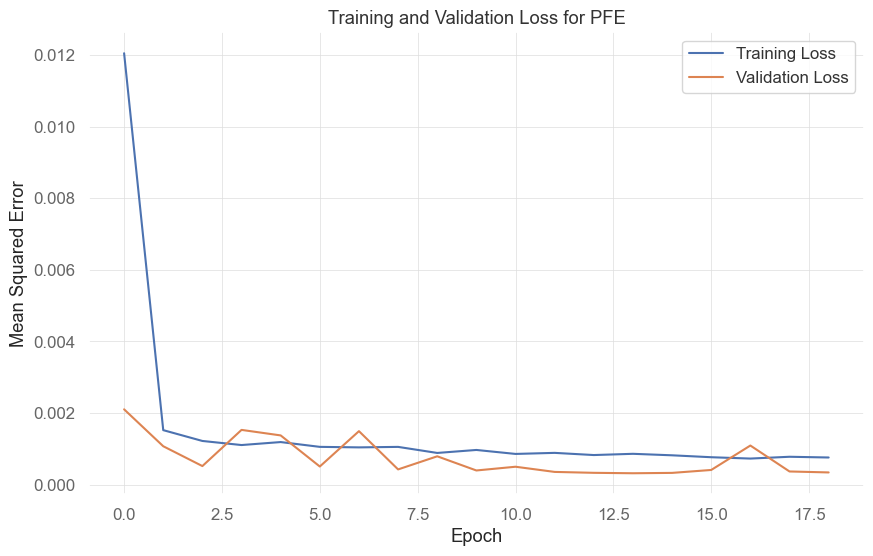

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9893336180519238
73/73 [==============================] - 3s 15ms/step - loss: 0.0047 - val_loss: 6.0641e-04
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 9.8740e-
val_r2: 0.9901888504327758
73/73 [==============================] - 0s 7ms/step - loss: 9.6505e-04 - val_loss: 5.5779e-04
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 8.2203e-
val_r2: 0.9925674728615954
73/73 [==============================] - 0s 6ms/step - loss: 8.2432e-04 - val_loss: 4.2256e-04
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 7.3877e-
val_r2: 0.9844212026199259
73/73 [==============================] - 0s 6ms/step - loss: 7.3862e-04 - val_loss: 8.8569e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 6.8735e-
val_r2: 0.9937263866182695
73/73 [==============================] - 0s 7ms/step -

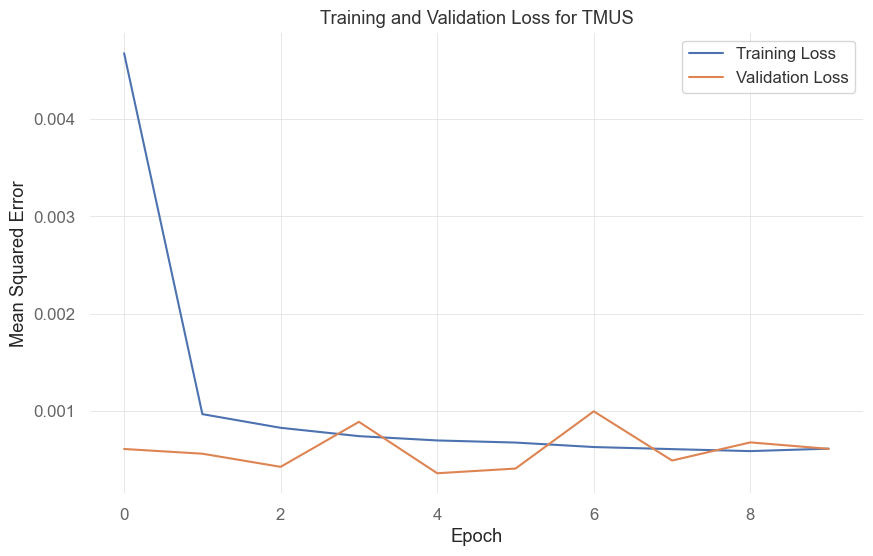

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.01
val_r2: 0.9246732088603588
73/73 [==============================] - 3s 15ms/step - loss: 0.0147 - val_loss: 0.0024
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.001
val_r2: 0.9473732848479685
73/73 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9660326474020284
73/73 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 0.001
val_r2: 0.969630910284893
73/73 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 9.7894e-04
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9726051637154561
73/73 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 8.8307e-04
Ep

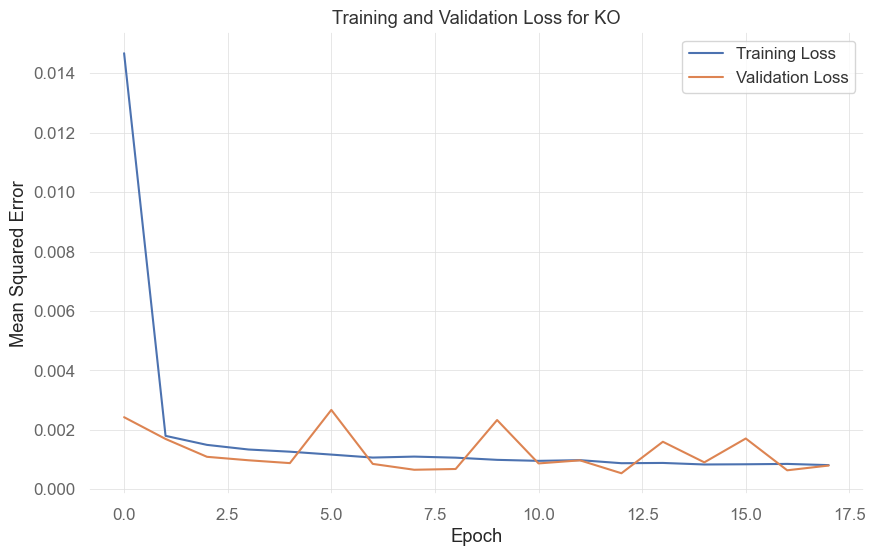

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.02
val_r2: 0.9070074994869982
73/73 [==============================] - 3s 14ms/step - loss: 0.0255 - val_loss: 0.0023
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.8492023875836134
73/73 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 3/50
9/9 [==============================] - 0s 5ms/step loss: 0.00
val_r2: 0.9518131624123709
73/73 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.7745929230711066
73/73 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0056
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9593696834653026
73/73 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 6/50


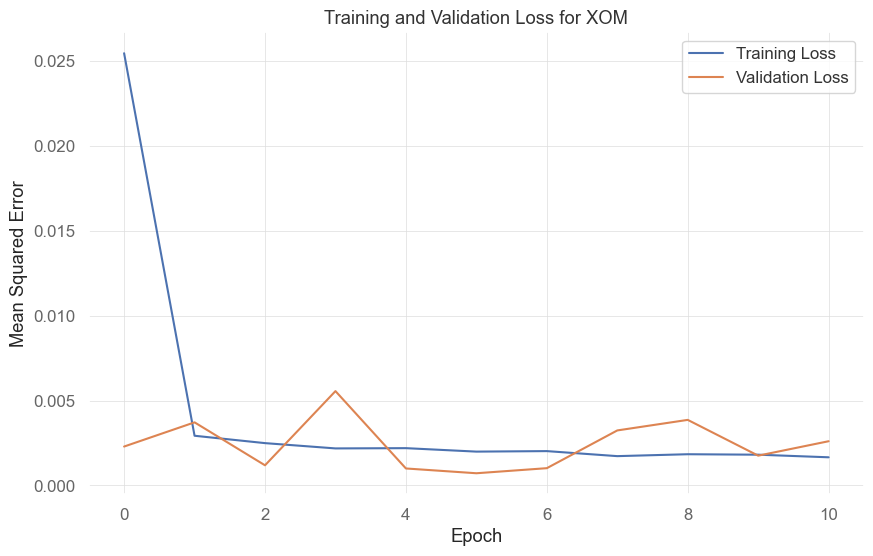

21/21 [==============================] - 0s 2ms/step
  Stock        MSE       MAE        R2
0   ABT   8.861287  2.260982  0.921245
1   IBM   8.459518  2.186890  0.909164
2  ORCL   4.958965  1.665382  0.966880
3  INTC   2.253232  1.098993  0.978728
4    MO   1.406479  0.854347  0.925217
5   NVS   4.340870  1.675701  0.757476
6   PFE   2.037295  1.080512  0.961069
7  TMUS  59.906914  6.375033  0.625924
8    KO   1.305294  0.837621  0.956802
9   XOM  13.411449  2.963671  0.972915


In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping, Callback

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = RobustScaler()
    scaler_Y = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.1)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [416]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

10.694130211319587
2.0999133108576937
0.8975418546844768


In [417]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_rmsprop.csv')

In [59]:
LSTM_Rms_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_rmsprop.csv')
LSTM_Rms_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LSTM_Rms_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     92.556885  122.664024  52.744007  62.151363  39.341920  85.013310   
1     92.006720  124.734120  52.934160  62.516933  40.001225  84.979660   
2     91.987510  126.170296  53.352890  62.801563  40.564530  85.119650   
3     92.625490  126.334710  53.654564  62.583717  40.851837  85.496445   
4     92.629814  125.930120  53.836678  63.126680  41.123547  85.992355   
..          ...         ...        ...        ...        ...        ...   
644  108.580980  141.374650  80.274240  26.637146  46.727150  90.403870   
645  108.899340  141.079420  80.748350  26.341091  46.760350  90.570710   
646  108.693090  140.866880  80.640430  26.292719  46.811730  90.524750   
647  108.063484  139.920120  80.610830  26.120384  46.756252  90.432610   
648  107.980900  139.832150  80.394200  25.971159  46.679280  90.353460   

           PFE        TMUS         KO         XOM  
0    34.733630   97.983930  46.762234   47.548515  
1    34.727890   98.898796  46.986710   48.563763  
2    34.775463   99.420640  47.696340   49.077988  
3    34.590702   99.655975  48.114390   49.300240  
4    34.677296   99.889790  48.146168   49.830727  
..         ...         ...        ...         ...  
644  52.762380  153.597430  63.431698  107.880090  
645  52.679100  152.972030  63.558117  108.289120  
646  52.657894  152.829510  63.781254  109.258420  
647  52.678223  152.471240  63.812576  109.104866  
648  52.769130  152.407780  63.913994  109.524600  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


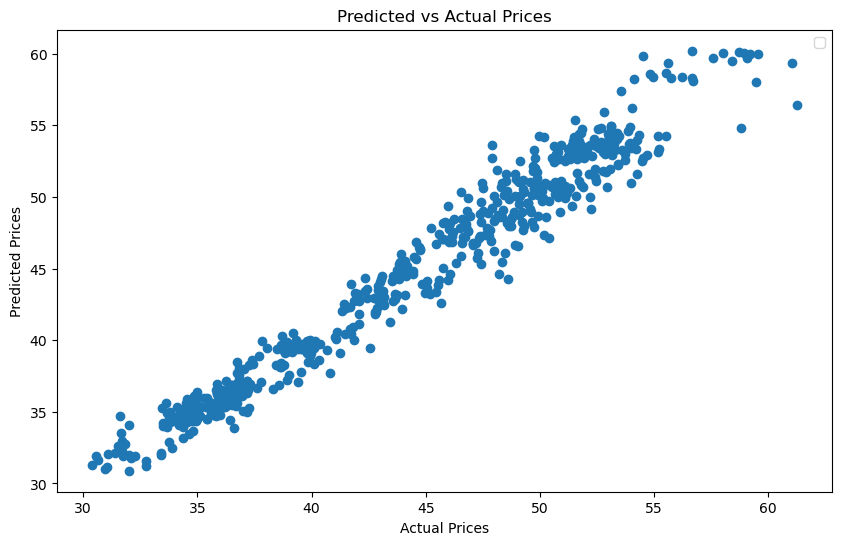

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], LSTM_Rms_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization


assetLabels = LSTM_Rms_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LSTM_Rms_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

### Portfolio Returns with LSTM-RMSprop Predictions 

In [58]:
portfolioSize = len(LSTM_Rms_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[3.604]] 
Annualized Risk (%):   [[5.533]] 
Annualized Expected Portfolio Return(%):   [22.937]

Optimal weights (%):
 [[ 0.473]
 [ 0.   ]
 [ 4.289]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [12.898]
 [30.757]
 [11.17 ]
 [40.414]]


## LSTM price prediction with Adamax Optimizer 

Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.02
val_r2: 0.9658946291327821
73/73 [==============================] - 5s 15ms/step - loss: 0.0254 - val_loss: 0.0021
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9788428990776802
73/73 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 9.8970e-
val_r2: 0.9837176996926008
73/73 [==============================] - 1s 7ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/50
9/9 [==============================] - 0s 3ms/step loss: 8.2766e-
val_r2: 0.9857648518340205
73/73 [==============================] - 0s 7ms/step - loss: 8.8001e-04 - val_loss: 8.8180e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 7.9295e-
val_r2: 0.9868879509358348
73/73 [==============================] - 0s 7ms/step - loss: 7.8901e-04 - val_loss: 8.1223e-04
Epoch 6/50
9/9 [====================

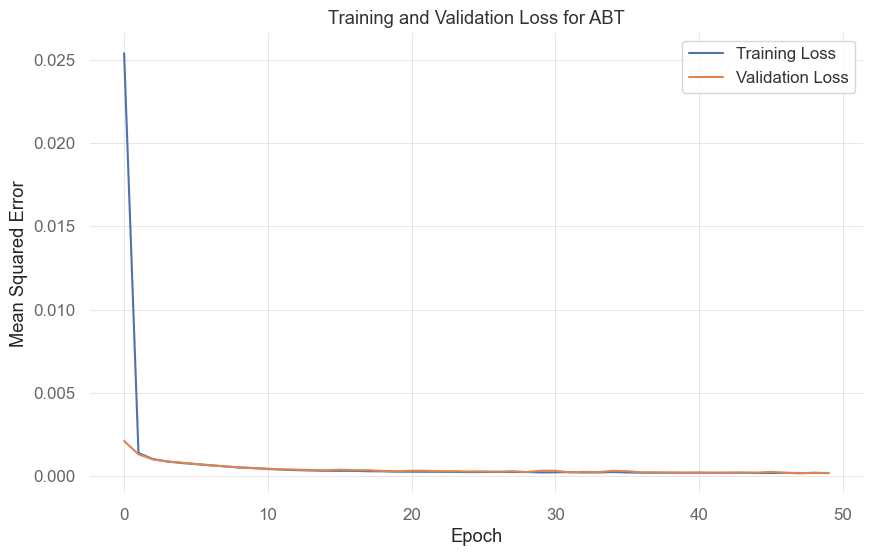

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.01
val_r2: 0.9106788327450889
73/73 [==============================] - 3s 15ms/step - loss: 0.0138 - val_loss: 0.0040
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9382996694163699
73/73 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9573505564684124
73/73 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9705657047088576
73/73 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 9.9587e-
val_r2: 0.9739693727323566
73/73 [==============================] - 1s 7ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6

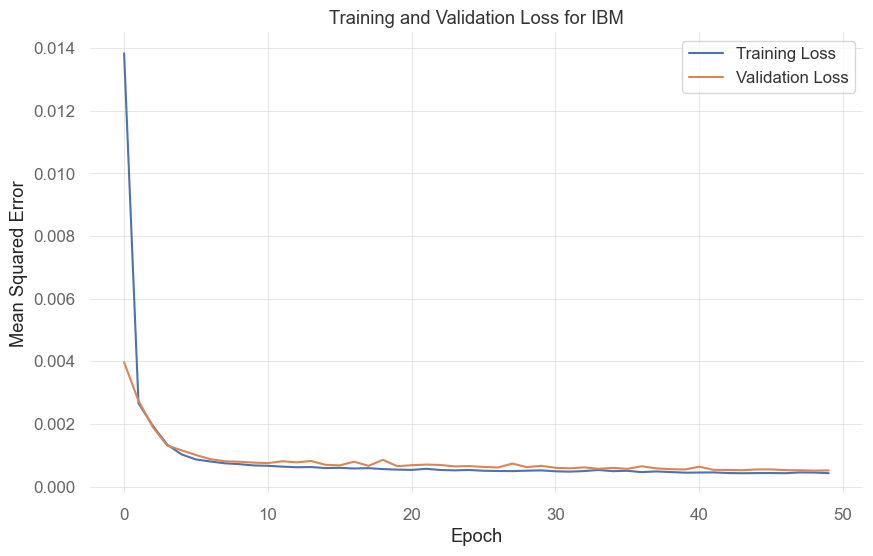

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9554826409420041
73/73 [==============================] - 4s 17ms/step - loss: 0.0248 - val_loss: 0.0023
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9614068062818084
73/73 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9668293229953348
73/73 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9735016993351956
73/73 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9807200166461423
73/73 [==============================] - 1s 8ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/50


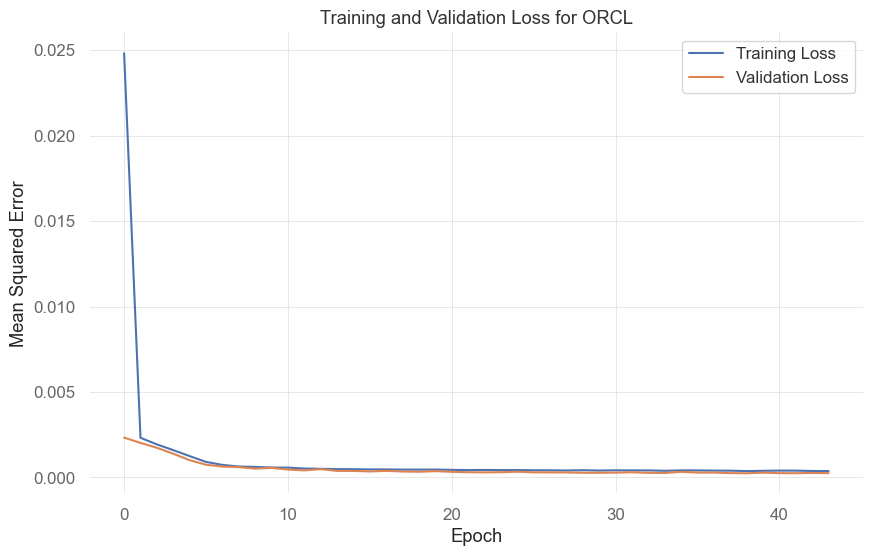

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9666044720700714
73/73 [==============================] - 3s 14ms/step - loss: 0.0267 - val_loss: 0.0018
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9747295007720806
73/73 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9770719898036707
73/73 [==============================] - 1s 7ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9790491875958088
73/73 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9807489567824368
73/73 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/50


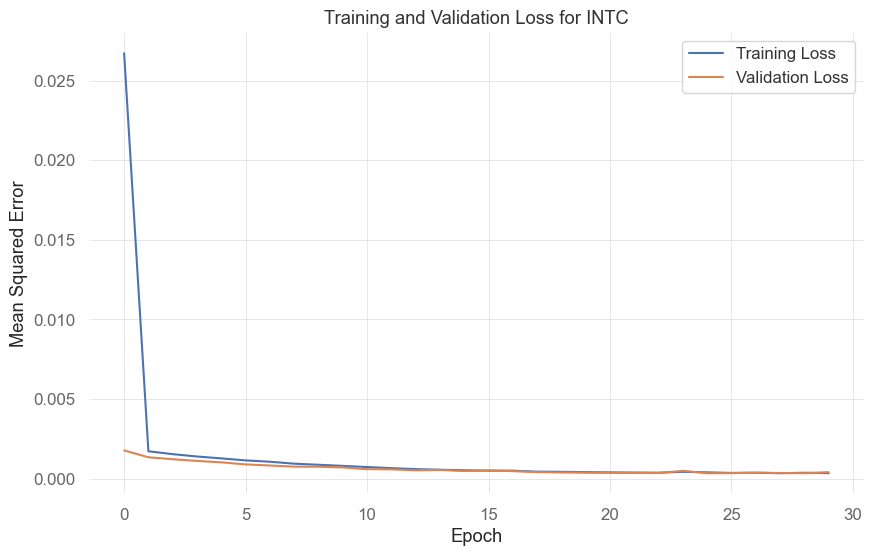

21/21 [==============================] - 0s 1ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.06
val_r2: 0.9648762910165787
73/73 [==============================] - 3s 15ms/step - loss: 0.0588 - val_loss: 0.0025
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9759641302783204
73/73 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9789913305070742
73/73 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.981785281443242
73/73 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9838441832017595
73/73 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
9

9/9 [==============================] - 0s 2ms/step loss: 2.4592e-
val_r2: 0.9961686617798438
73/73 [==============================] - 1s 7ms/step - loss: 2.4592e-04 - val_loss: 2.7196e-04
Epoch 43/50
9/9 [==============================] - 0s 3ms/step loss: 2.5263e-
val_r2: 0.9972376742752659
73/73 [==============================] - 0s 6ms/step - loss: 2.4872e-04 - val_loss: 1.9608e-04
Epoch 44/50
9/9 [==============================] - 0s 2ms/step loss: 2.1275e-
val_r2: 0.9973183754499262
73/73 [==============================] - 0s 7ms/step - loss: 2.1934e-04 - val_loss: 1.9035e-04
Epoch 45/50
9/9 [==============================] - 0s 4ms/step loss: 2.1174e-
val_r2: 0.9963307394627366
73/73 [==============================] - 1s 7ms/step - loss: 2.1823e-04 - val_loss: 2.6045e-04
Epoch 46/50
9/9 [==============================] - 0s 4ms/step loss: 2.2909e-
val_r2: 0.9971437135487434
73/73 [==============================] - 1s 7ms/step - loss: 2.2798e-04 - val_loss: 2.0275e-04
Epoch 47/50


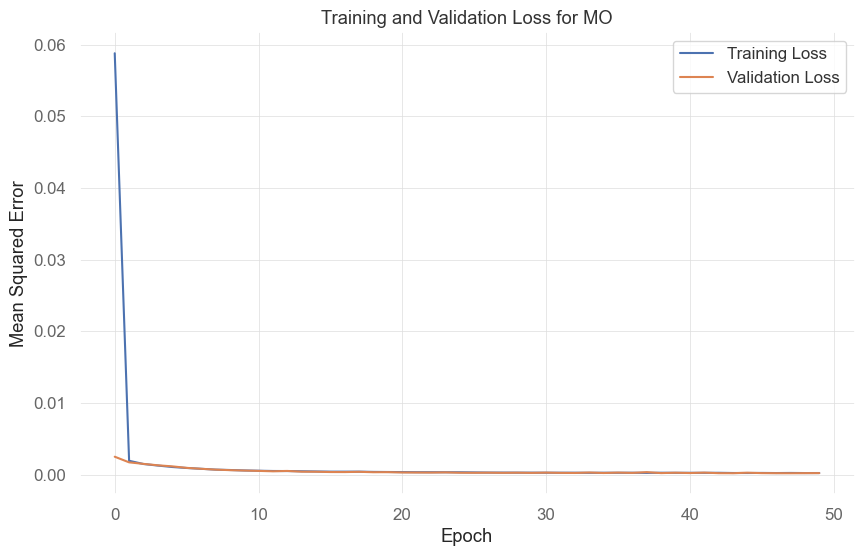

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.02
val_r2: 0.9489378379048458
73/73 [==============================] - 3s 15ms/step - loss: 0.0202 - val_loss: 0.0030
Epoch 2/50
9/9 [==============================] - 0s 1ms/step loss: 0.00
val_r2: 0.9553751651604125
73/73 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9616071197892115
73/73 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9657334801401465
73/73 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9694434410180033
73/73 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/50


Epoch 43/50
9/9 [==============================] - 0s 2ms/step loss: 3.6587e-
val_r2: 0.9947837510007103
73/73 [==============================] - 0s 6ms/step - loss: 3.6502e-04 - val_loss: 3.0609e-04
Epoch 44/50
9/9 [==============================] - 0s 4ms/step loss: 3.5237e-
val_r2: 0.9943698890326572
73/73 [==============================] - 0s 7ms/step - loss: 3.5237e-04 - val_loss: 3.3038e-04
Epoch 45/50
9/9 [==============================] - 0s 3ms/step loss: 3.4795e-
val_r2: 0.994167879838989
73/73 [==============================] - 1s 9ms/step - loss: 3.4757e-04 - val_loss: 3.4223e-04
Epoch 46/50
9/9 [==============================] - 0s 2ms/step loss: 3.6732e-
val_r2: 0.9950957867392297
73/73 [==============================] - 1s 7ms/step - loss: 3.5913e-04 - val_loss: 2.8778e-04
Epoch 47/50
9/9 [==============================] - 0s 4ms/step loss: 3.3293e-
val_r2: 0.9951702999163163
73/73 [==============================] - 1s 8ms/step - loss: 3.3289e-04 - val_loss: 2.8341e-04
E

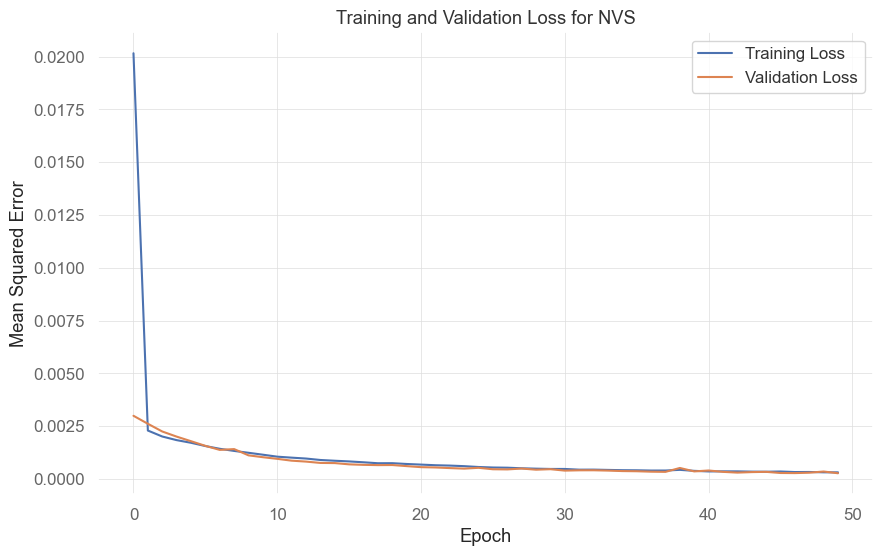

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.11
val_r2: 0.9359166597805072
73/73 [==============================] - 4s 18ms/step - loss: 0.1049 - val_loss: 0.0036
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.966682722450889
73/73 [==============================] - 1s 8ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9739020742629514
73/73 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9763690541813934
73/73 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9794591504368856
73/73 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/50
9

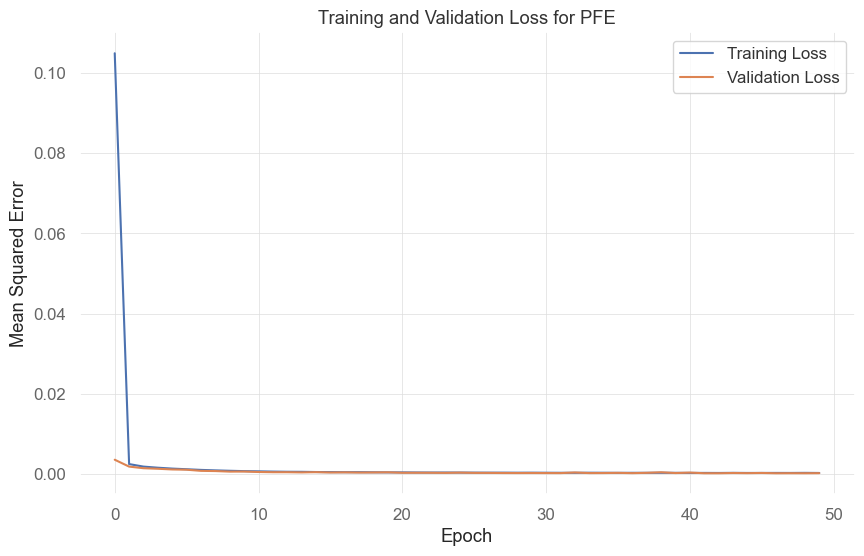

21/21 [==============================] - 0s 4ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.02
val_r2: 0.9818696155079634
73/73 [==============================] - 3s 15ms/step - loss: 0.0192 - val_loss: 0.0010
Epoch 2/50
9/9 [==============================] - 0s 5ms/step loss: 7.1499e-
val_r2: 0.9861663983024875
73/73 [==============================] - 0s 7ms/step - loss: 7.2572e-04 - val_loss: 7.6958e-04
Epoch 3/50
9/9 [==============================] - 0s 5ms/step loss: 6.3124e-
val_r2: 0.9863676275377892
73/73 [==============================] - 1s 8ms/step - loss: 6.3322e-04 - val_loss: 7.5839e-04
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 5.8193e-
val_r2: 0.9880141498008922
73/73 [==============================] - 1s 9ms/step - loss: 5.8859e-04 - val_loss: 6.6679e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 5.5160e-
val_r2: 0.9888716341725903
73/73 [==============================] - 1s 8ms/step - los

Epoch 42/50
9/9 [==============================] - 0s 4ms/step loss: 2.3129e-
val_r2: 0.9968118294941855
73/73 [==============================] - 1s 9ms/step - loss: 2.2465e-04 - val_loss: 1.7736e-04
Epoch 43/50
9/9 [==============================] - 0s 4ms/step loss: 2.0049e-
val_r2: 0.9968212340077224
73/73 [==============================] - 1s 8ms/step - loss: 1.9606e-04 - val_loss: 1.9160e-04


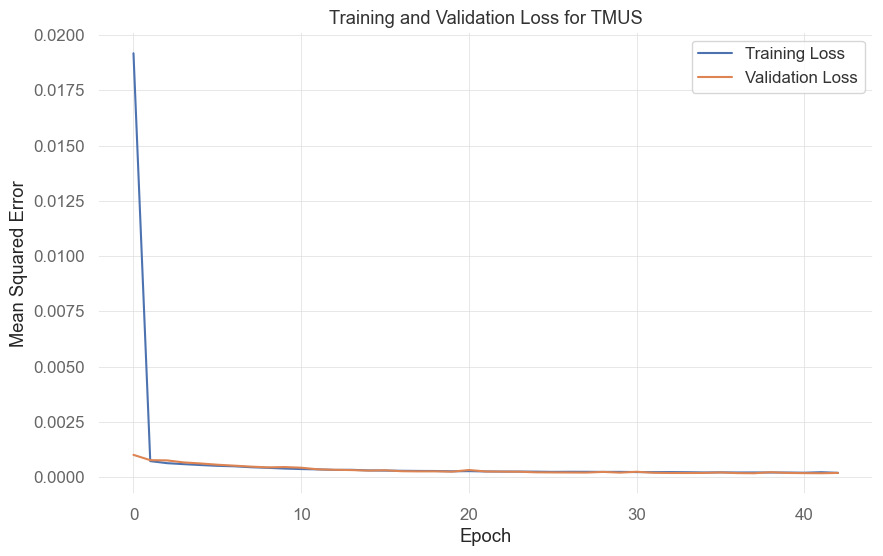

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.02
val_r2: 0.9618597414319554
73/73 [==============================] - 3s 18ms/step - loss: 0.0182 - val_loss: 0.0013
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9734033068069141
73/73 [==============================] - 1s 7ms/step - loss: 0.0018 - val_loss: 9.3684e-04
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9780703876193044
73/73 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 7.7245e-04
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.001
val_r2: 0.9805125076752484
73/73 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 6.8643e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9823711727966623
73/73 [==============================] - 1s 8ms/step - loss: 0.0011 - val_loss: 6.209

9/9 [==============================] - 0s 2ms/step loss: 3.0727e-
val_r2: 0.9937067717467065
73/73 [==============================] - 0s 6ms/step - loss: 3.0577e-04 - val_loss: 2.2167e-04
Epoch 43/50
9/9 [==============================] - 0s 2ms/step loss: 2.8184e-
val_r2: 0.9919051889025937
73/73 [==============================] - 0s 6ms/step - loss: 2.7756e-04 - val_loss: 2.8513e-04
Epoch 44/50
9/9 [==============================] - 0s 2ms/step loss: 2.9864e-
val_r2: 0.988210881423777
73/73 [==============================] - 0s 6ms/step - loss: 3.0165e-04 - val_loss: 4.1526e-04
Epoch 45/50
9/9 [==============================] - 0s 3ms/step loss: 3.0759e-
val_r2: 0.9938648960349663
73/73 [==============================] - 0s 6ms/step - loss: 2.9723e-04 - val_loss: 2.1610e-04
Epoch 46/50
9/9 [==============================] - 0s 2ms/step loss: 2.9941e-
val_r2: 0.9938024846042945
73/73 [==============================] - 0s 7ms/step - loss: 2.8033e-04 - val_loss: 2.1830e-04
Epoch 47/50
9

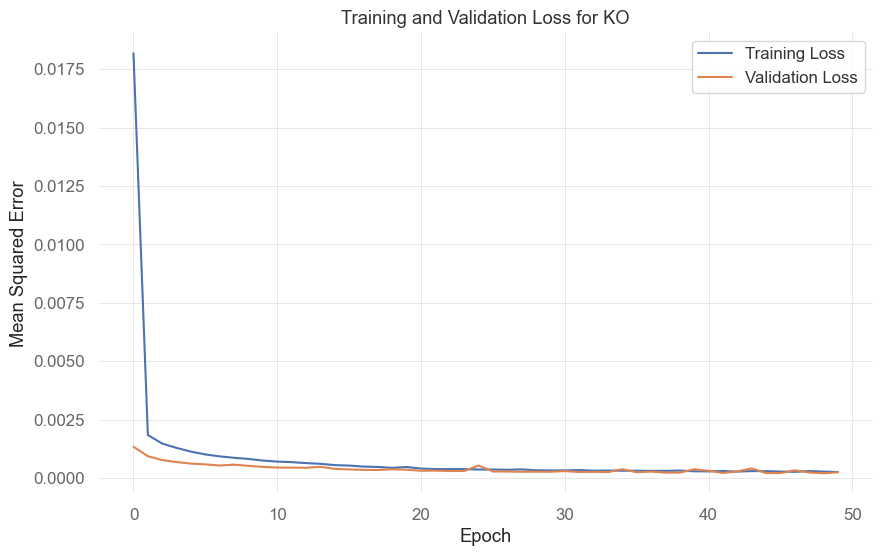

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9024351731251634
73/73 [==============================] - 3s 14ms/step - loss: 0.0197 - val_loss: 0.0021
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9057052486119919
73/73 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/50
9/9 [==============================] - 0s 1ms/step loss: 0.00
val_r2: 0.9132920589144984
73/73 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9196836194598702
73/73 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9262327031056319
73/73 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50


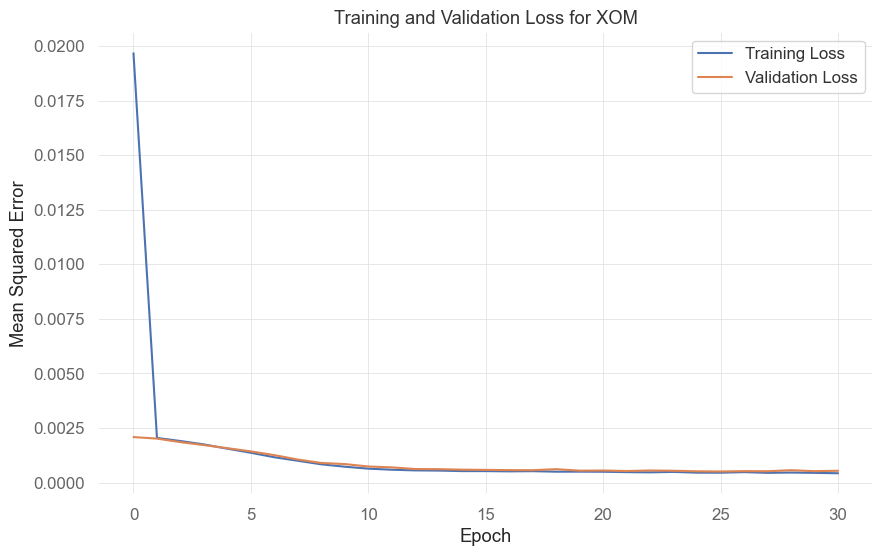

21/21 [==============================] - 0s 4ms/step
  Stock        MSE       MAE        R2
0   ABT  11.972840  2.748709  0.893590
1   IBM   5.931870  1.775083  0.936305
2  ORCL   5.121252  1.641377  0.965796
3  INTC   2.321700  1.120565  0.978081
4    MO   0.841566  0.688534  0.955253
5   NVS   1.598293  0.962100  0.910703
6   PFE   1.688293  0.945518  0.967738
7  TMUS  44.113702  5.759731  0.724541
8    KO   0.937090  0.729658  0.968987
9   XOM   7.780295  2.166556  0.984288


In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping, Callback

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.1)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance 

In [428]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

8.230690242167519
1.853783090823604
0.928528417414177


In [429]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adamax.csv')

In [61]:
LSTM_adamax_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adamax.csv')
LSTM_adamax_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LSTM_adamax_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     92.627600  122.445990  53.109158  62.188990  39.425175  86.277664   
1     92.444336  124.367966  53.301180  63.252220  40.162285  86.115850   
2     92.637215  126.412254  54.166294  63.301617  40.744230  86.098305   
3     91.872850  126.972404  54.204506  63.326797  40.924020  87.544420   
4     91.695000  125.048325  53.941180  63.181890  41.192060  87.711136   
..          ...         ...        ...        ...        ...        ...   
644  109.777550  141.058980  81.724250  26.804024  46.107243  91.105190   
645  109.277880  141.696910  82.112600  26.816069  46.220566  91.166430   
646  109.340170  142.874770  81.805990  26.524786  45.998844  90.478630   
647  109.098960  140.124920  82.213200  26.385517  45.709730  90.228226   
648  110.284870  140.108610  82.290276  26.510885  45.867233  91.142845   

           PFE        TMUS         KO         XOM  
0    34.498764  100.979020  47.515600   46.923897  
1    34.269450  101.645424  48.875630   48.496685  
2    34.811794  102.161090  49.283264   49.554120  
3    34.817818  102.489624  49.512880   50.450554  
4    34.263670  105.627945  49.012360   50.828170  
..         ...         ...        ...         ...  
644  52.113950  148.302860  64.049490  107.817780  
645  51.819046  148.285750  64.418100  108.267500  
646  51.926840  148.927400  64.207460  108.227486  
647  52.390500  148.802200  63.926056  109.088560  
648  53.119890  149.462330  63.672623  110.949104  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


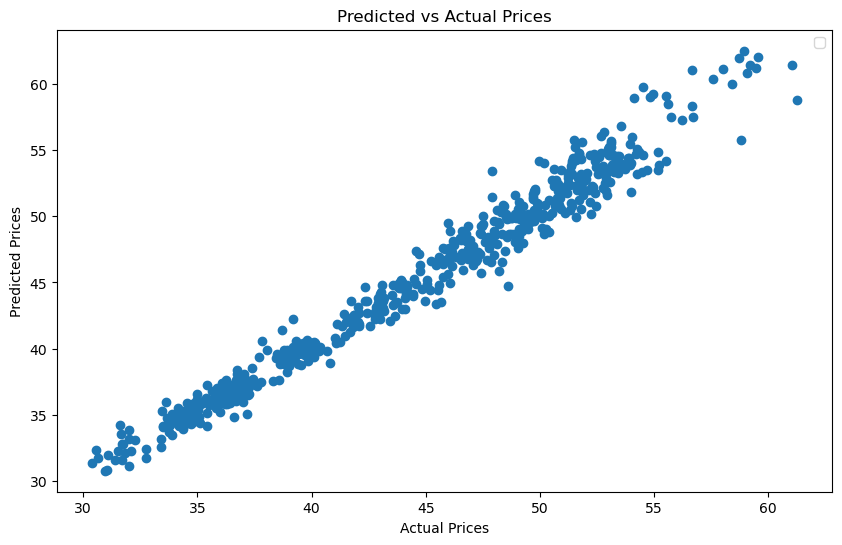

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], LSTM_adamax_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

In [63]:
assetLabels = LSTM_adamax_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LSTM_adamax_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.031  0.026  0.075 -0.122  0.028  0.012  0.074  0.066  0.049  0.139]

Variance-Covariance Matrix of Returns:
 [[ 0.861  0.112  0.177  0.229  0.131  0.241  0.264  0.135  0.119 -0.073]
 [ 0.112  1.133  0.309  0.285  0.159  0.139  0.178  0.207  0.262  0.076]
 [ 0.177  0.309  1.567  0.222  0.162  0.148  0.319  0.104  0.31   0.009]
 [ 0.229  0.285  0.222  1.986  0.224  0.294  0.122  0.192  0.121  0.081]
 [ 0.131  0.159  0.162  0.224  0.851  0.167  0.154  0.136  0.211  0.21 ]
 [ 0.241  0.139  0.148  0.294  0.167  0.654  0.28   0.193  0.198 -0.016]
 [ 0.264  0.178  0.319  0.122  0.154  0.28   1.492  0.148  0.135 -0.076]
 [ 0.135  0.207  0.104  0.192  0.136  0.193  0.148  1.149  0.124  0.074]
 [ 0.119  0.262  0.31   0.121  0.211  0.198  0.135  0.124  0.796  0.042]
 [-0.073  0.076  0.009  0.081  0.21  -0.016 -0.076  0.074  0.042  1.198]]


### Portfolio Returns with LSTM-adamax Predictions 

In [64]:
portfolioSize = len(LSTM_adamax_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.223]] 
Annualized Risk (%):   [[9.461]] 
Annualized Expected Portfolio Return(%):   [24.027]

Optimal weights (%):
 [[ 6.508]
 [ 0.   ]
 [11.271]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [14.233]
 [14.51 ]
 [10.28 ]
 [43.197]]


# Bidirectional LSTM

## Bidirectional LSTM price predictions with Adam Optimizer

Epoch 1/100
17/17 [==============================] - 1s 3ms/steposs: 0.
val_r2: 0.9851536474935546
65/65 [==============================] - 7s 32ms/step - loss: 0.0090 - val_loss: 8.8942e-04
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 8.9734e-
val_r2: 0.9890242441286266
65/65 [==============================] - 1s 13ms/step - loss: 8.9734e-04 - val_loss: 6.5754e-04
Epoch 3/100
17/17 [==============================] - 0s 4ms/steposs: 6.8461
val_r2: 0.9911600014286425
65/65 [==============================] - 1s 17ms/step - loss: 6.7368e-04 - val_loss: 5.2959e-04
Epoch 4/100
17/17 [==============================] - 0s 3ms/steposs: 5.5067e-
val_r2: 0.9927514451760344
65/65 [==============================] - 1s 9ms/step - loss: 5.5067e-04 - val_loss: 4.3425e-04
Epoch 5/100
17/17 [==============================] - 0s 3ms/steposs: 4.6769e-
val_r2: 0.9945107624015199
65/65 [==============================] - 1s 9ms/step - loss: 4.3377e-04 - val_loss: 3.2885e-04
Epoch 6/1

Epoch 42/100
17/17 [==============================] - 0s 3ms/steposs: 1.7855
val_r2: 0.9977691220698018
65/65 [==============================] - 1s 11ms/step - loss: 1.7972e-04 - val_loss: 1.3365e-04
Epoch 43/100
17/17 [==============================] - 0s 3ms/steposs: 2.3923e-
val_r2: 0.9975244728205872
65/65 [==============================] - 1s 9ms/step - loss: 2.3267e-04 - val_loss: 1.4830e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 2.1423e-
val_r2: 0.9972787255703376
65/65 [==============================] - 1s 11ms/step - loss: 2.2224e-04 - val_loss: 1.6303e-04
Epoch 45/100
17/17 [==============================] - 0s 2ms/steposs: 2.9684e-
val_r2: 0.9978561889047503
65/65 [==============================] - 1s 14ms/step - loss: 2.9555e-04 - val_loss: 1.2843e-04
Epoch 46/100
17/17 [==============================] - 0s 3ms/steposs: 1.7498e-
val_r2: 0.9969996498749878
65/65 [==============================] - 1s 14ms/step - loss: 1.6768e-04 - val_loss: 1.79

Epoch 83/100
17/17 [==============================] - 0s 2ms/steposs: 1.4401e-
val_r2: 0.996884690986548
65/65 [==============================] - 1s 11ms/step - loss: 1.4146e-04 - val_loss: 1.8663e-04
Epoch 84/100
17/17 [==============================] - 0s 4ms/steposs: 1.4320
val_r2: 0.9968655701490688
65/65 [==============================] - 1s 20ms/step - loss: 1.4863e-04 - val_loss: 1.8778e-04
Epoch 85/100
17/17 [==============================] - 0s 3ms/steposs: 1.5013
val_r2: 0.9974278099037477
65/65 [==============================] - 1s 12ms/step - loss: 1.4552e-04 - val_loss: 1.5409e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 1.4817e-
val_r2: 0.9981338270675981
65/65 [==============================] - 1s 10ms/step - loss: 1.4817e-04 - val_loss: 1.1180e-04
Epoch 87/100
17/17 [==============================] - 0s 3ms/steposs: 1.8237e-
val_r2: 0.9979103745028273
65/65 [==============================] - 1s 13ms/step - loss: 1.7668e-04 - val_loss: 1.2519

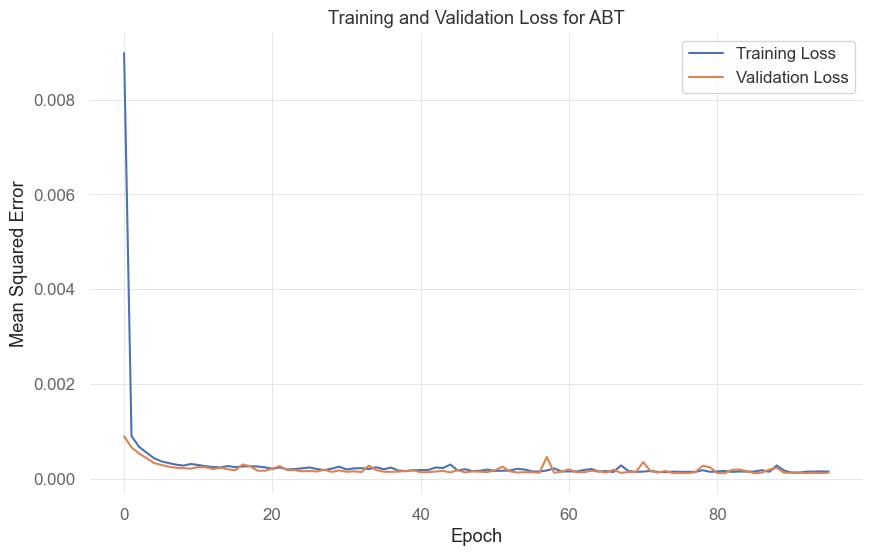

21/21 [==============================] - 0s 2ms/step
Epoch 1/100
17/17 [==============================] - 1s 11ms/stepss: 0
val_r2: 0.9210043955062549
65/65 [==============================] - 13s 123ms/step - loss: 0.0378 - val_loss: 0.0031
Epoch 2/100
17/17 [==============================] - 0s 4ms/steposs: 0.
val_r2: 0.9417576891308674
65/65 [==============================] - 1s 14ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 3/100
17/17 [==============================] - 0s 3ms/steposs: 0.00
val_r2: 0.9520303913355588
65/65 [==============================] - 1s 11ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 7ms/steposs: 0.
val_r2: 0.9620877752639155
65/65 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9637483919786246
65/65 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6

Epoch 42/100
17/17 [==============================] - 0s 3ms/steposs: 5.3346e-
val_r2: 0.991461765324779
65/65 [==============================] - 1s 10ms/step - loss: 5.3456e-04 - val_loss: 3.3601e-04
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 4.4850e-
val_r2: 0.9888047239749564
65/65 [==============================] - 1s 8ms/step - loss: 4.5395e-04 - val_loss: 4.4057e-04
Epoch 44/100
17/17 [==============================] - 0s 3ms/steposs: 4.2400e-
val_r2: 0.9915482772259325
65/65 [==============================] - 1s 8ms/step - loss: 4.2400e-04 - val_loss: 3.3260e-04
Epoch 45/100
17/17 [==============================] - 0s 3ms/steposs: 4.2751
val_r2: 0.9914791807218625
65/65 [==============================] - 1s 11ms/step - loss: 4.1467e-04 - val_loss: 3.3532e-04
Epoch 46/100
17/17 [==============================] - 0s 4ms/steposs: 3.9910
val_r2: 0.9904597454075065
65/65 [==============================] - 1s 11ms/step - loss: 3.9829e-04 - val_loss: 3.7544e-

Epoch 83/100
17/17 [==============================] - 0s 931us/steps: 3.5477e-
val_r2: 0.9909212275667599
65/65 [==============================] - 0s 3ms/step - loss: 3.7134e-04 - val_loss: 3.5728e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 3.7534e-
val_r2: 0.9929724172161789
65/65 [==============================] - 0s 3ms/step - loss: 3.5812e-04 - val_loss: 2.7656e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 4.2027e-
val_r2: 0.9926309291633668
65/65 [==============================] - 0s 3ms/step - loss: 4.0771e-04 - val_loss: 2.9000e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 3.5821e-
val_r2: 0.9875075899532127
65/65 [==============================] - 0s 3ms/step - loss: 3.8388e-04 - val_loss: 4.9162e-04
Epoch 87/100
17/17 [==============================] - 0s 827us/steps: 4.5287e-
val_r2: 0.9921046245347808
65/65 [==============================] - 0s 3ms/step - loss: 4.4571e-04 - val_loss: 3.1071

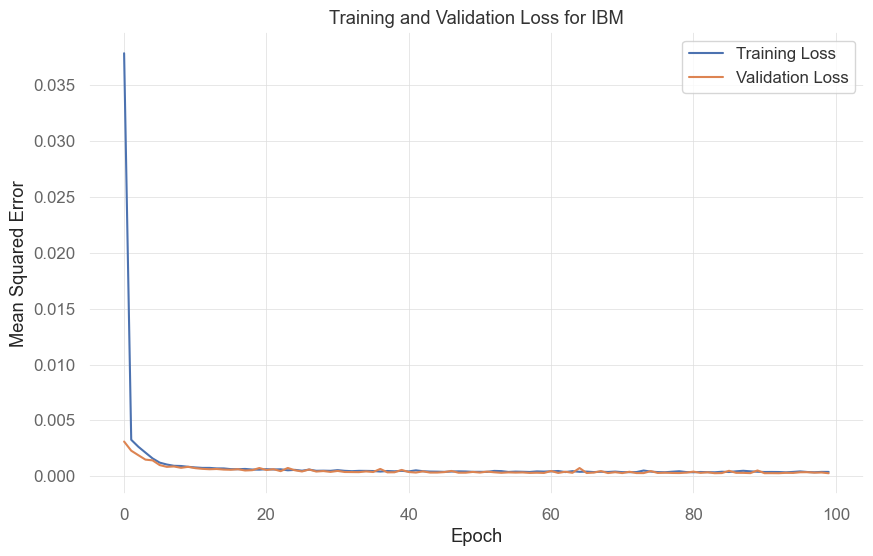

21/21 [==============================] - 0s 876us/step
Epoch 1/100
17/17 [==============================] - 0s 996us/steps: 0.0492
val_r2: 0.9599134210998773
65/65 [==============================] - 2s 9ms/step - loss: 0.0350 - val_loss: 0.0022
Epoch 2/100
17/17 [==============================] - 0s 985us/steps: 0.00
val_r2: 0.9705529303561138
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9738462204541741
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.0014 
val_r2: 0.9770087666731803
65/65 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.979179319483444
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
E

Epoch 42/100
17/17 [==============================] - 0s 755us/steps: 3.6649e-
val_r2: 0.9915079871299785
65/65 [==============================] - 0s 3ms/step - loss: 3.6057e-04 - val_loss: 4.6555e-04
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 3.8400e-
val_r2: 0.9923130410805495
65/65 [==============================] - 0s 3ms/step - loss: 3.6100e-04 - val_loss: 4.2142e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 3.2203e-
val_r2: 0.9923803896559349
65/65 [==============================] - 0s 3ms/step - loss: 3.4329e-04 - val_loss: 4.1772e-04
Epoch 45/100
17/17 [==============================] - 0s 874us/steps: 3.3064e-
val_r2: 0.9910967283983858
65/65 [==============================] - 0s 3ms/step - loss: 3.4298e-04 - val_loss: 4.8810e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 4.2066e-
val_r2: 0.9922824397848754
65/65 [==============================] - 0s 3ms/step - loss: 4.0642e-04 - val_loss: 4.2309

Epoch 83/100
17/17 [==============================] - 0s 2ms/steposs: 3.7363e-
val_r2: 0.993528093290835
65/65 [==============================] - 0s 3ms/step - loss: 3.7887e-04 - val_loss: 3.5480e-04
Epoch 84/100
17/17 [==============================] - 0s 920us/steps: 3.2630e-
val_r2: 0.9848948635663013
65/65 [==============================] - 0s 3ms/step - loss: 3.5331e-04 - val_loss: 8.2810e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 4.6266e-
val_r2: 0.9934084639778283
65/65 [==============================] - 0s 3ms/step - loss: 3.9311e-04 - val_loss: 3.6136e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 3.4113e-
val_r2: 0.9915660522028843
65/65 [==============================] - 0s 3ms/step - loss: 3.1078e-04 - val_loss: 4.6237e-04
Epoch 87/100
17/17 [==============================] - 0s 2ms/steposs: 3.2614e-
val_r2: 0.9936637654607543
65/65 [==============================] - 0s 3ms/step - loss: 3.6812e-04 - val_loss: 3.8198e

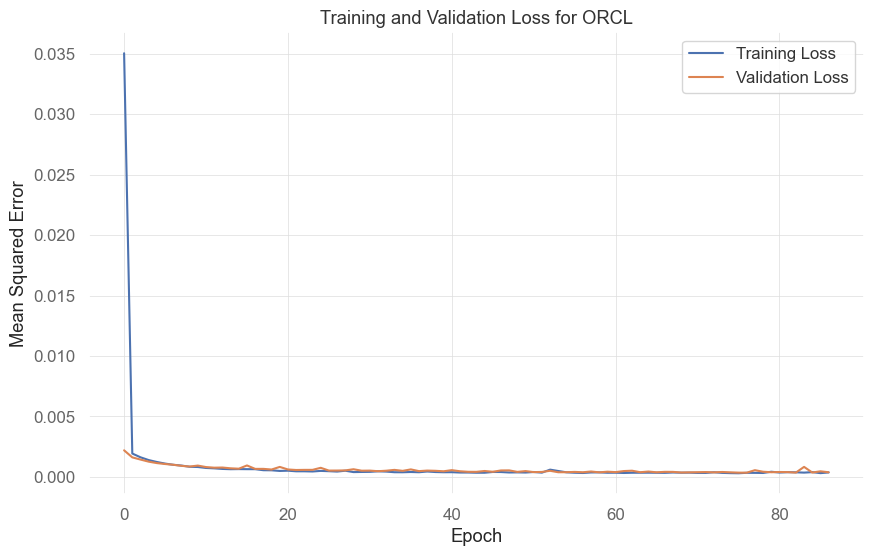

21/21 [==============================] - 0s 2ms/step
Epoch 1/100
17/17 [==============================] - 0s 789us/steps: 0.0121
val_r2: 0.9781241191259934
65/65 [==============================] - 2s 9ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.0013  
val_r2: 0.9813984725590309
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.3026e-04
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9845503416090388
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 7.7264e-04
Epoch 4/100
17/17 [==============================] - 0s 861us/steps: 9.2953e-
val_r2: 0.9845859834132424
65/65 [==============================] - 0s 3ms/step - loss: 8.6701e-04 - val_loss: 7.7085e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 7.8787e-
val_r2: 0.9890134944410206
65/65 [==============================] - 0s 3ms/step - loss: 7.7

Epoch 41/100
17/17 [==============================] - 0s 1ms/steposs: 3.0353e-
val_r2: 0.9951576895373611
65/65 [==============================] - 0s 3ms/step - loss: 2.7234e-04 - val_loss: 2.4216e-04
Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 2.3658e-
val_r2: 0.9945948825771095
65/65 [==============================] - 0s 3ms/step - loss: 2.5247e-04 - val_loss: 2.7031e-04
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 2.4990e-
val_r2: 0.9949198879814602
65/65 [==============================] - 0s 3ms/step - loss: 2.6420e-04 - val_loss: 2.5406e-04
Epoch 44/100
17/17 [==============================] - 0s 997us/steps: 2.8445e-
val_r2: 0.995675823274138
65/65 [==============================] - 0s 3ms/step - loss: 2.9016e-04 - val_loss: 2.1625e-04
Epoch 45/100
17/17 [==============================] - 0s 993us/steps: 2.6329e-
val_r2: 0.9947462958536935
65/65 [==============================] - 0s 3ms/step - loss: 2.8209e-04 - val_loss: 2.6274e

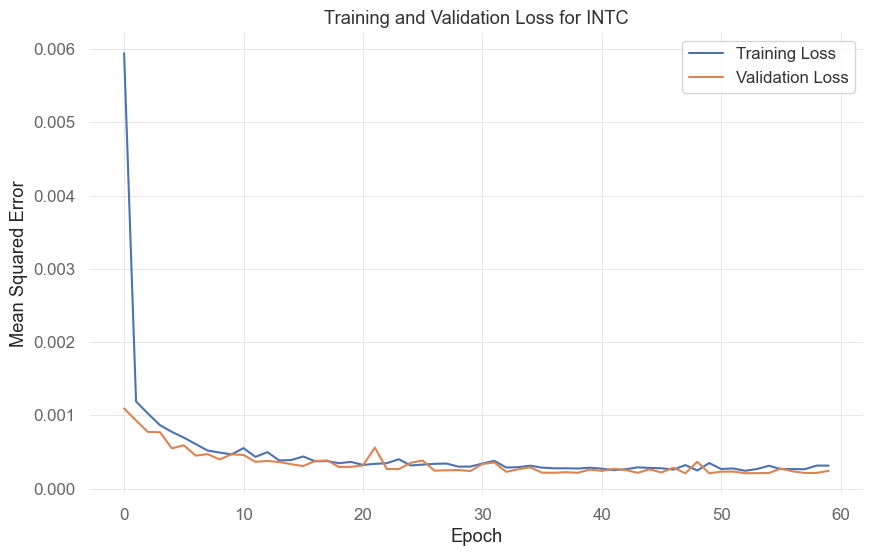

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0559
val_r2: 0.9680958780236006
65/65 [==============================] - 2s 9ms/step - loss: 0.0325 - val_loss: 0.0023
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9772812428192365
65/65 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9832962627463614
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 9.9269e-
val_r2: 0.9869110944285874
65/65 [==============================] - 0s 3ms/step - loss: 9.7027e-04 - val_loss: 9.2718e-04
Epoch 5/100
17/17 [==============================] - 0s 937us/steps: 8.6179e-
val_r2: 0.988628995862582
65/65 [==============================] - 0s 3ms/step - loss: 8.3749e-04 - val

Epoch 42/100
17/17 [==============================] - 0s 2ms/steposs: 2.0168e-
val_r2: 0.9977700166286637
65/65 [==============================] - 0s 3ms/step - loss: 1.8998e-04 - val_loss: 1.5797e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 1.5786e-
val_r2: 0.9977041540879457
65/65 [==============================] - 0s 3ms/step - loss: 1.6620e-04 - val_loss: 1.6263e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 2.2347e-
val_r2: 0.9973057181364596
65/65 [==============================] - 0s 3ms/step - loss: 2.4240e-04 - val_loss: 1.9086e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 2.0750e-
val_r2: 0.9971542258182708
65/65 [==============================] - 0s 3ms/step - loss: 2.1036e-04 - val_loss: 2.0159e-04
Epoch 46/100
17/17 [==============================] - 0s 2ms/steposs: 1.6816e-
val_r2: 0.9978880112058459
65/65 [==============================] - 0s 3ms/step - loss: 1.6360e-04 - val_loss: 1.4961

Epoch 83/100
17/17 [==============================] - 0s 906us/steps: 1.6377e-
val_r2: 0.9974379712895626
65/65 [==============================] - 0s 3ms/step - loss: 1.7658e-04 - val_loss: 1.8149e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 1.6781e-
val_r2: 0.998078821595211
65/65 [==============================] - 0s 3ms/step - loss: 1.5649e-04 - val_loss: 1.3609e-04
Epoch 85/100
17/17 [==============================] - 0s 2ms/steposs: 1.4499e-
val_r2: 0.9978298534956113
65/65 [==============================] - 0s 3ms/step - loss: 1.7034e-04 - val_loss: 1.5373e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 1.3776e-
val_r2: 0.9973825736104491
65/65 [==============================] - 0s 3ms/step - loss: 1.4951e-04 - val_loss: 1.8541e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 1.6368e-
val_r2: 0.9981531858802322
65/65 [==============================] - 0s 3ms/step - loss: 1.6063e-04 - val_loss: 1.6387e

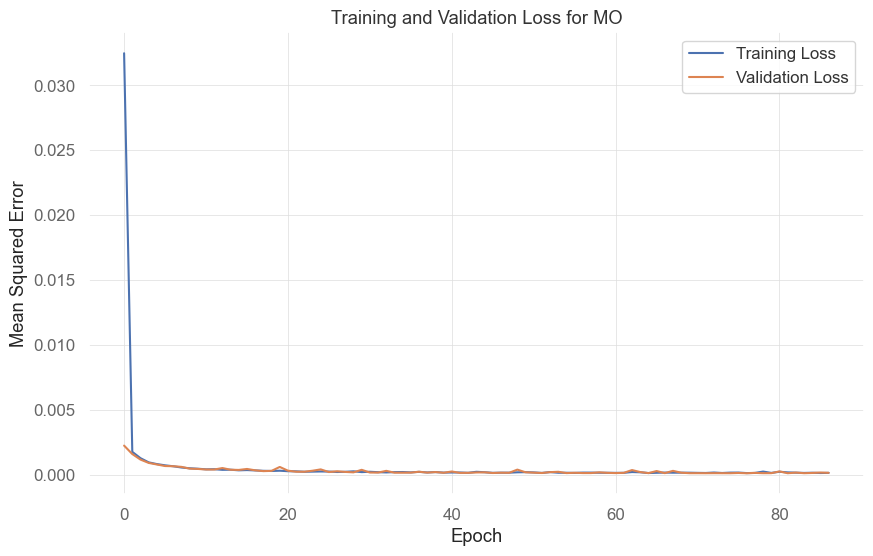

21/21 [==============================] - 0s 876us/step
Epoch 1/100
17/17 [==============================] - 0s 935us/steps: 0.0440
val_r2: 0.9577019784512382
65/65 [==============================] - 2s 10ms/step - loss: 0.0302 - val_loss: 0.0024
Epoch 2/100
17/17 [==============================] - 0s 991us/steps: 0.00
val_r2: 0.9673484548084166
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9720204924958517
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9746596259354184
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.978304552815811
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epo

Epoch 42/100
17/17 [==============================] - 0s 876us/steps: 3.2128e-
val_r2: 0.9941135239535243
65/65 [==============================] - 0s 3ms/step - loss: 3.1188e-04 - val_loss: 3.3629e-04
Epoch 43/100
17/17 [==============================] - 0s 959us/steps: 2.8389e-
val_r2: 0.9943281051281075
65/65 [==============================] - 0s 3ms/step - loss: 2.9812e-04 - val_loss: 3.2403e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 3.0688e-
val_r2: 0.994079977626684
65/65 [==============================] - 0s 3ms/step - loss: 2.9742e-04 - val_loss: 3.3821e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 3.0571e-
val_r2: 0.9926138341351
65/65 [==============================] - 0s 3ms/step - loss: 3.0411e-04 - val_loss: 4.2197e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 3.1293e-
val_r2: 0.9937433898284422
65/65 [==============================] - 0s 3ms/step - loss: 3.0604e-04 - val_loss: 3.5744e-04

Epoch 83/100
17/17 [==============================] - 0s 1ms/steposs: 2.9742e-
val_r2: 0.9946947561978118
65/65 [==============================] - 0s 3ms/step - loss: 2.7076e-04 - val_loss: 3.0309e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 3.0577e-
val_r2: 0.9919502941886362
65/65 [==============================] - 0s 3ms/step - loss: 3.0929e-04 - val_loss: 4.5988e-04
Epoch 85/100
17/17 [==============================] - 0s 846us/steps: 2.8482e-
val_r2: 0.9943293274269622
65/65 [==============================] - 0s 3ms/step - loss: 2.6580e-04 - val_loss: 3.2396e-04
Epoch 86/100
17/17 [==============================] - 0s 782us/steps: 2.7286e-
val_r2: 0.9950357882135217
65/65 [==============================] - 0s 3ms/step - loss: 2.4461e-04 - val_loss: 2.8455e-04


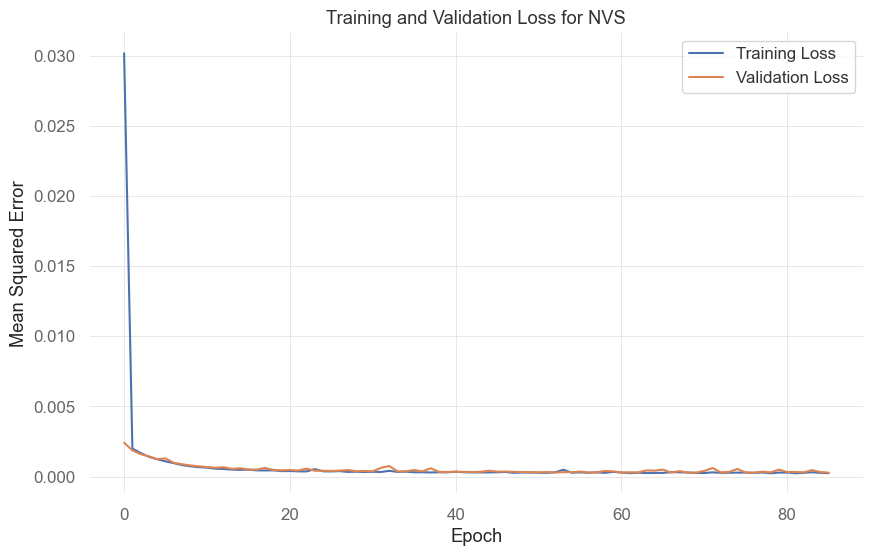

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 2ms/steposs: 0.0441
val_r2: 0.9717756226175791
65/65 [==============================] - 2s 9ms/step - loss: 0.0325 - val_loss: 0.0015
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.977210111635267
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9804960711056238
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.0011  
val_r2: 0.9810670553836567
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 9.6348e-
val_r2: 0.9832344509516855
65/65 [==============================] - 0s 3ms/step - loss: 9.2036e-04 - val_loss: 8

Epoch 42/100
17/17 [==============================] - 0s 854us/steps: 2.6482e-
val_r2: 0.9954631284011263
65/65 [==============================] - 0s 3ms/step - loss: 2.5941e-04 - val_loss: 2.4341e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 4.2009e-
val_r2: 0.9963059980851724
65/65 [==============================] - 0s 3ms/step - loss: 4.2676e-04 - val_loss: 1.9819e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.8203e-
val_r2: 0.9958851307318899
65/65 [==============================] - 0s 3ms/step - loss: 2.5325e-04 - val_loss: 2.2077e-04
Epoch 45/100
17/17 [==============================] - 0s 868us/steps: 2.5818e-
val_r2: 0.9936950489813937
65/65 [==============================] - 0s 3ms/step - loss: 2.6664e-04 - val_loss: 3.3826e-04
Epoch 46/100
17/17 [==============================] - 0s 977us/steps: 2.3666e-
val_r2: 0.9939371383560278
65/65 [==============================] - 0s 3ms/step - loss: 2.5938e-04 - val_loss: 3.2528

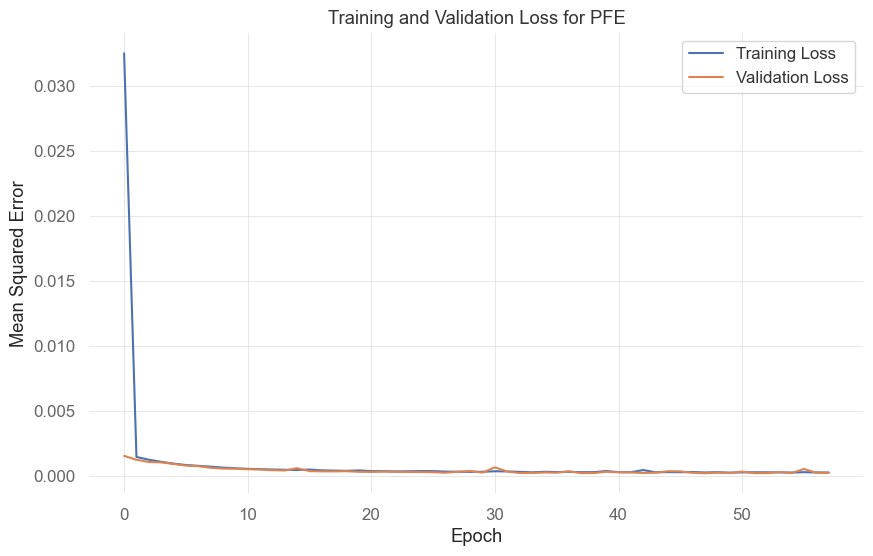

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 2ms/steposs: 0.0267
val_r2: 0.9872841817869543
65/65 [==============================] - 2s 9ms/step - loss: 0.0150 - val_loss: 7.2123e-04
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 8.3795e-
val_r2: 0.9885325001892294
65/65 [==============================] - 0s 3ms/step - loss: 7.6829e-04 - val_loss: 6.5043e-04
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 7.2499e-
val_r2: 0.9891231579949447
65/65 [==============================] - 0s 3ms/step - loss: 7.0447e-04 - val_loss: 6.1693e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 6.6855e-
val_r2: 0.9889574948291211
65/65 [==============================] - 0s 3ms/step - loss: 6.5228e-04 - val_loss: 6.2632e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 5.5738e-
val_r2: 0.9913769113218812
65/65 [==============================] - 0s 3ms/

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 1.6745e-
val_r2: 0.9971174539803619
65/65 [==============================] - 0s 3ms/step - loss: 1.6510e-04 - val_loss: 1.6350e-04
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 1.7712e-
val_r2: 0.9975286857367925
65/65 [==============================] - 0s 3ms/step - loss: 1.6762e-04 - val_loss: 1.4017e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.0643e-
val_r2: 0.9976053159006227
65/65 [==============================] - 0s 3ms/step - loss: 1.8807e-04 - val_loss: 1.3582e-04
Epoch 45/100
17/17 [==============================] - 0s 774us/steps: 1.9436e-
val_r2: 0.9974001246826633
65/65 [==============================] - 0s 3ms/step - loss: 1.9244e-04 - val_loss: 1.4746e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 2.0839e-
val_r2: 0.9970439073114042
65/65 [==============================] - 0s 3ms/step - loss: 1.9838e-04 - val_loss: 1.6767

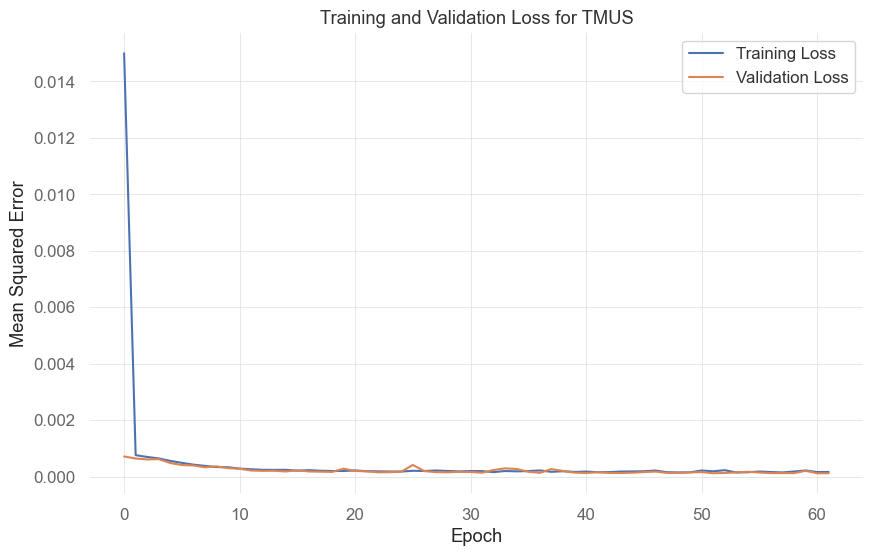

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0085
val_r2: 0.9591607347155751
65/65 [==============================] - 3s 9ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9767631033910292
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 8.2319e-04
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.0012  
val_r2: 0.9778746969445241
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 7.8381e-04
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 8.2813e-
val_r2: 0.9828392162335646
65/65 [==============================] - 0s 3ms/step - loss: 8.3141e-04 - val_loss: 6.0794e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 5.9331e-
val_r2: 0.9856774068882549
65/65 [==============================] - 0s 3ms/step - loss: 6.4

Epoch 42/100
17/17 [==============================] - 0s 2ms/steposs: 2.4132e-
val_r2: 0.9903940821644499
65/65 [==============================] - 0s 3ms/step - loss: 2.7039e-04 - val_loss: 3.4030e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 3.8527e-
val_r2: 0.9942096170570419
65/65 [==============================] - 0s 3ms/step - loss: 3.3750e-04 - val_loss: 2.0513e-04
Epoch 44/100
17/17 [==============================] - 0s 886us/steps: 2.7573e-
val_r2: 0.9941966677455971
65/65 [==============================] - 0s 2ms/step - loss: 2.4562e-04 - val_loss: 2.0559e-04
Epoch 45/100
17/17 [==============================] - 0s 956us/steps: 2.5582e-
val_r2: 0.9897513109296697
65/65 [==============================] - 0s 3ms/step - loss: 2.7288e-04 - val_loss: 3.6307e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 2.5275e-
val_r2: 0.9942926472307604
65/65 [==============================] - 0s 2ms/step - loss: 2.5243e-04 - val_loss: 2.5471

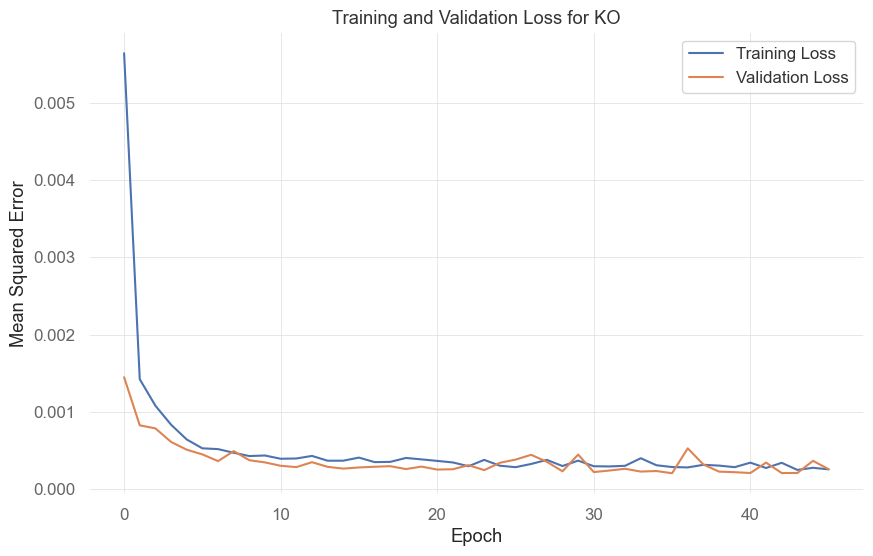

21/21 [==============================] - 0s 956us/step
Epoch 1/100
17/17 [==============================] - 0s 840us/steps: 0.0547
val_r2: 0.8851761019366476
65/65 [==============================] - 2s 8ms/step - loss: 0.0351 - val_loss: 0.0030
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.8994271418729123
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 3/100
17/17 [==============================] - 0s 845us/steps: 0.00
val_r2: 0.9124150099546899
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9224142465559569
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9366672432235732
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epo

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 3.1707e-
val_r2: 0.9864998328851505
65/65 [==============================] - 0s 3ms/step - loss: 3.2313e-04 - val_loss: 3.5783e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 3.0784e-
val_r2: 0.9894509522152668
65/65 [==============================] - 0s 3ms/step - loss: 3.0971e-04 - val_loss: 2.7961e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 3.0519e-
val_r2: 0.9880848273319874
65/65 [==============================] - 0s 3ms/step - loss: 3.4441e-04 - val_loss: 3.1582e-04
Epoch 45/100
17/17 [==============================] - 0s 952us/steps: 3.4453e-
val_r2: 0.9893887622192549
65/65 [==============================] - 0s 3ms/step - loss: 3.2679e-04 - val_loss: 2.8126e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 2.9015e-
val_r2: 0.9897847915204565
65/65 [==============================] - 0s 3ms/step - loss: 3.0460e-04 - val_loss: 2.7076

Epoch 83/100
17/17 [==============================] - 0s 1ms/steposs: 2.3548e-
val_r2: 0.985207554653675
65/65 [==============================] - 0s 3ms/step - loss: 3.1368e-04 - val_loss: 3.9208e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 2.6690e-
val_r2: 0.9865276942080868
65/65 [==============================] - 0s 3ms/step - loss: 3.0672e-04 - val_loss: 3.5709e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 2.5627e-
val_r2: 0.9896424692355663
65/65 [==============================] - 0s 3ms/step - loss: 2.5055e-04 - val_loss: 2.7453e-04
Epoch 86/100
17/17 [==============================] - 0s 1ms/steposs: 2.4075e-
val_r2: 0.9919909152576005
65/65 [==============================] - 0s 3ms/step - loss: 2.5447e-04 - val_loss: 2.1229e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 2.4141e-
val_r2: 0.9895295203330652
65/65 [==============================] - 0s 3ms/step - loss: 2.5101e-04 - val_loss: 2.7753e

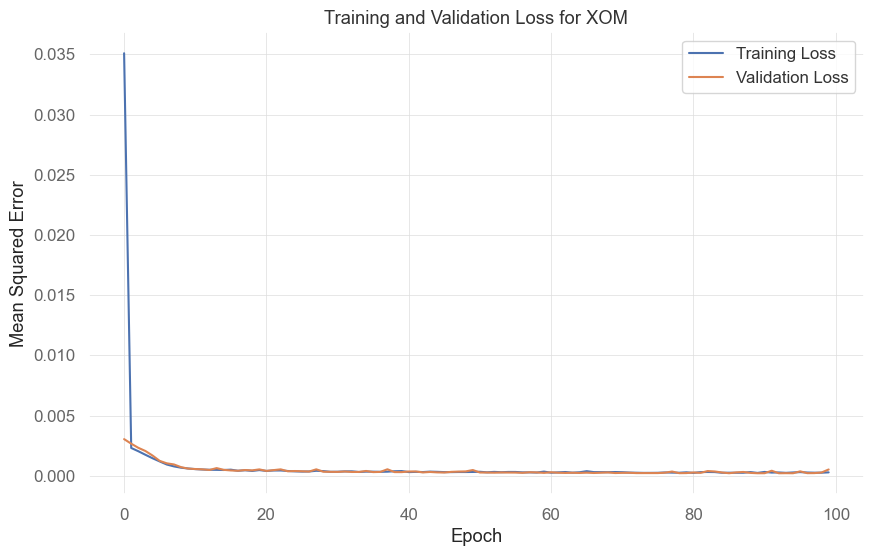

21/21 [==============================] - 0s 928us/step
  Stock        MSE       MAE        R2
0   ABT  10.913553  2.782484  0.903005
1   IBM   4.695700  1.556161  0.949579
2  ORCL   2.517953  1.131867  0.983183
3  INTC   1.535059  0.872549  0.985508
4    MO   0.601606  0.550076  0.968012
5   NVS   1.247081  0.842114  0.930326
6   PFE   0.986313  0.716326  0.981152
7  TMUS   6.625521  1.998854  0.958628
8    KO   0.722095  0.609411  0.976103
9   XOM   4.021949  1.510957  0.991878


In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data 
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # Bi-directional LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(28, return_sequences=False, activation='linear'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(14, activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [469]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

3.3866830737541918
1.2570798691689322
0.9627373221019848


In [470]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adam.csv')

In [99]:
BiLSTM_adam_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adam.csv')
BiLSTM_adam_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
BiLSTM_adam_Predicted_Prices

ABT         IBM       ORCL       INTC         MO       NVS  \
0     89.425770  124.523346  53.067318  62.248660  40.561180  85.70116   
1     89.011120  126.453926  53.446150  63.249706  41.362630  85.78049   
2     90.805560  129.015690  54.636295  63.217903  42.120400  85.55792   
3     90.700390  127.469246  54.499780  63.235363  42.056602  87.70082   
4     90.643684  125.588104  54.035477  63.104706  42.050640  87.81852   
..          ...         ...        ...        ...        ...       ...   
644  106.008194  141.186460  80.605950  26.474570  45.909527  90.93435   
645  105.872660  141.802100  80.310250  26.307440  46.086597  90.93521   
646  106.187515  142.273910  80.203220  26.102135  46.399330  91.26935   
647  106.055500  140.555800  79.891600  25.835043  46.173927  90.75690   
648  107.498740  140.535460  80.652510  26.098995  46.100530  91.54323   

           PFE        TMUS         KO         XOM  
0    33.765358  100.239050  47.475273   48.833180  
1    34.003513   99.512886  48.312534   51.088505  
2    34.197590  102.162310  49.202380   53.041115  
3    34.238705  102.524090  49.301662   53.055336  
4    34.157677  103.004680  48.865220   51.165730  
..         ...         ...        ...         ...  
644  51.515438  140.805200  63.734085  109.711120  
645  51.180710  140.571300  63.894417  110.568405  
646  51.039740  140.632540  63.945705  112.037120  
647  50.775600  139.769420  63.783970  111.666380  
648  50.729675  140.112760  64.074684  111.963300  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


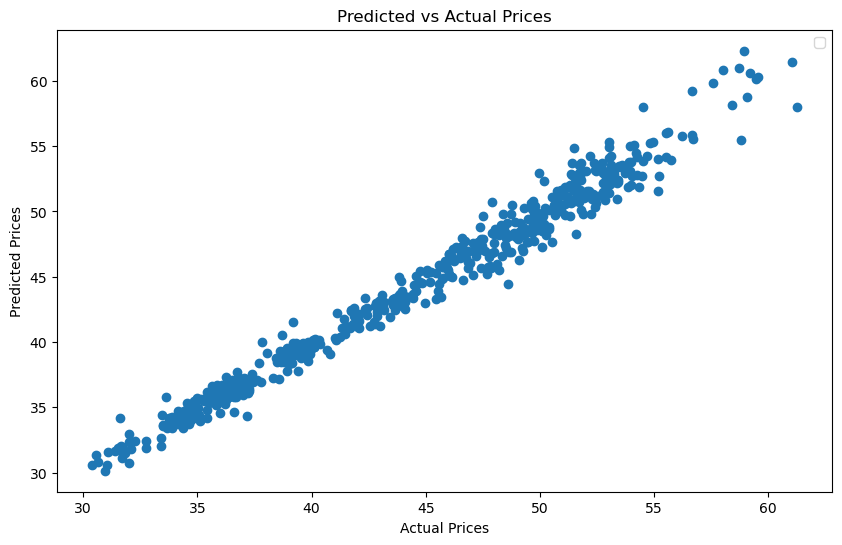

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], BiLSTM_adam_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization  

In [66]:
assetLabels = BiLSTM_adam_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = BiLSTM_adam_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.034  0.026  0.074 -0.124  0.025  0.014  0.071  0.057  0.05   0.139]

Variance-Covariance Matrix of Returns:
 [[1.155 0.262 0.428 0.383 0.222 0.323 0.302 0.313 0.259 0.046]
 [0.262 1.438 0.481 0.621 0.379 0.203 0.317 0.278 0.398 0.606]
 [0.428 0.481 1.863 0.525 0.373 0.19  0.346 0.307 0.373 0.376]
 [0.383 0.621 0.525 1.996 0.339 0.347 0.238 0.279 0.29  0.618]
 [0.222 0.379 0.373 0.339 1.078 0.213 0.174 0.158 0.343 0.52 ]
 [0.323 0.203 0.19  0.347 0.213 0.679 0.331 0.281 0.221 0.167]
 [0.302 0.317 0.346 0.238 0.174 0.331 1.644 0.204 0.238 0.193]
 [0.313 0.278 0.307 0.279 0.158 0.281 0.204 1.079 0.282 0.23 ]
 [0.259 0.398 0.373 0.29  0.343 0.221 0.238 0.282 0.715 0.315]
 [0.046 0.606 0.376 0.618 0.52  0.167 0.193 0.23  0.315 2.219]]


### Portfolio Returns with Bidirectional LSTM-Adam Predictions 

In [67]:
portfolioSize = len(BiLSTM_adam_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.555]] 
Annualized Risk (%):   [[12.476]] 
Annualized Expected Portfolio Return(%):   [22.397]

Optimal weights (%):
 [[ 5.585]
 [ 0.   ]
 [12.661]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [17.6  ]
 [15.545]
 [12.391]
 [36.218]]


##  Bidirectional LSTM price predictions with RMSProp Optimizer  

Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.003
val_r2: 0.9876122410347019
65/65 [==============================] - 2s 10ms/step - loss: 0.0033 - val_loss: 7.7373e-04
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.0017  
val_r2: 0.9895521206343497
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 6.5257e-04
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.0012  
val_r2: 0.9907723209172871
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 5.7636e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.0011  
val_r2: 0.991351333070889
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 5.4019e-04
Epoch 5/100
17/17 [==============================] - 0s 831us/steps: 9.3580e-
val_r2: 0.990927326125272
65/65 [==============================] - 0s 3ms/step - loss: 9.2584e-04 - val_loss: 5.6668e-04
Epoch 6/100
17/17 [=

Epoch 41/100
17/17 [==============================] - 0s 2ms/steposs: 3.4410e-
val_r2: 0.993661168330235
65/65 [==============================] - 0s 3ms/step - loss: 4.1607e-04 - val_loss: 3.9592e-04
Epoch 42/100
17/17 [==============================] - 0s 836us/steps: 3.8261e-
val_r2: 0.9919622754875628
65/65 [==============================] - 0s 2ms/step - loss: 3.9936e-04 - val_loss: 5.0203e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 4.2151e-
val_r2: 0.9973091672516174
65/65 [==============================] - 0s 2ms/step - loss: 4.1031e-04 - val_loss: 1.6807e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 4.0478e-
val_r2: 0.9892043587458943
65/65 [==============================] - 0s 2ms/step - loss: 4.3494e-04 - val_loss: 6.7429e-04
Epoch 45/100
17/17 [==============================] - 0s 2ms/steposs: 3.5714e-
val_r2: 0.975241912358496
65/65 [==============================] - 0s 3ms/step - loss: 3.3672e-04 - val_loss: 0.0015
E

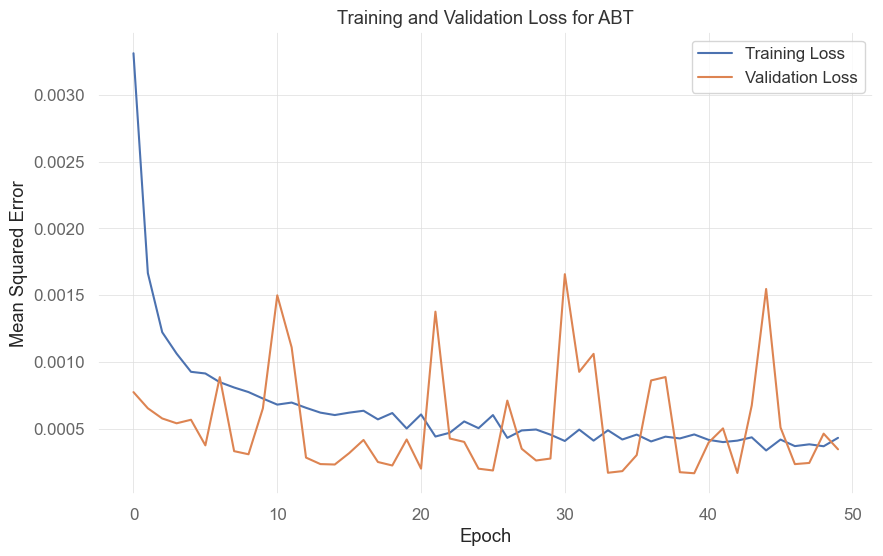

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0076
val_r2: 0.7501680767146616
65/65 [==============================] - 2s 10ms/step - loss: 0.0066 - val_loss: 0.0108
Epoch 2/100
17/17 [==============================] - 0s 851us/steps: 0.00
val_r2: 0.9696992656848723
65/65 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9584570436792149
65/65 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9784180256223083
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 9.3459e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.0023  
val_r2: 0.9772868317498218
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 9.8

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 9.7551e-
val_r2: 0.9890232787812224
65/65 [==============================] - 0s 3ms/step - loss: 9.9824e-04 - val_loss: 4.7534e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 9.2791e-
val_r2: 0.9653615268997042
65/65 [==============================] - 0s 3ms/step - loss: 9.8960e-04 - val_loss: 0.0015
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9618277026868727
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 45/100
17/17 [==============================] - 0s 732us/steps: 9.9644e-
val_r2: 0.9670419586044153
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 8.2969e-
val_r2: 0.972141600157344
65/65 [==============================] - 0s 3ms/step - loss: 9.0724e-04 - val_loss: 0.0012
Epoch 47/100
17/17 [====

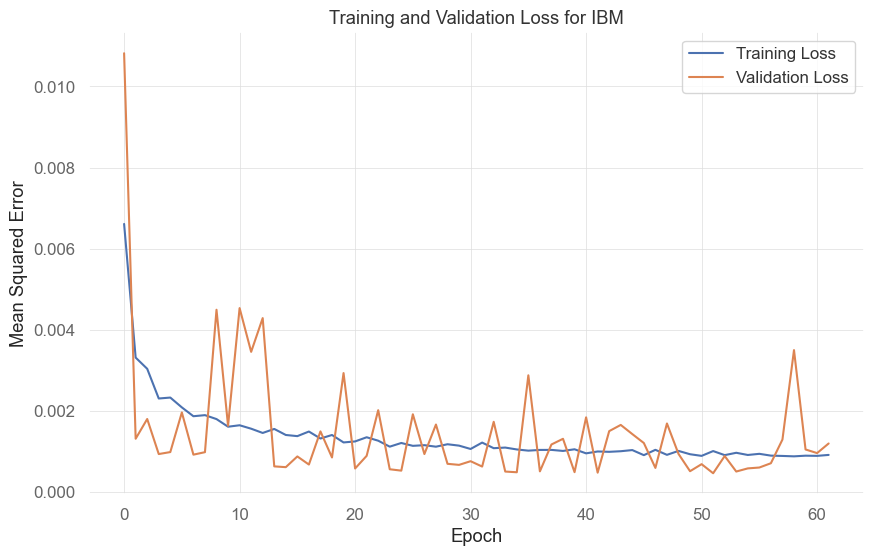

21/21 [==============================] - 0s 975us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0107
val_r2: 0.8648585776100347
65/65 [==============================] - 2s 9ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.975487073162237
65/65 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9611200985349373
65/65 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 4/100
17/17 [==============================] - 0s 864us/steps: 0.00
val_r2: 0.9805745261498212
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 5/100
17/17 [==============================] - 0s 854us/steps: 0.00
val_r2: 0.9495911666062118
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0028
Epoc

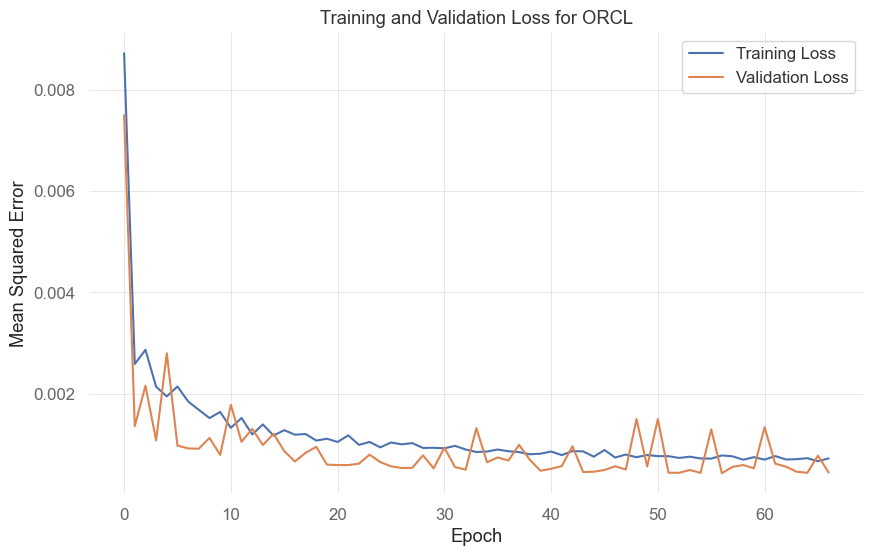

21/21 [==============================] - 0s 663us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0142
val_r2: 0.9553088908105579
65/65 [==============================] - 2s 9ms/step - loss: 0.0092 - val_loss: 0.0025
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9772076435006779
65/65 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.0015  
val_r2: 0.9820879877670612
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 9.8493e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9860825999152416
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 7.6528e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.0013  
val_r2: 0.9846164285863486
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_

Epoch 42/100
17/17 [==============================] - 0s 893us/steps: 5.2322e-
val_r2: 0.9918242455423054
65/65 [==============================] - 0s 3ms/step - loss: 5.0074e-04 - val_loss: 4.4956e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 5.6003e-
val_r2: 0.9939944905280944
65/65 [==============================] - 0s 2ms/step - loss: 5.3013e-04 - val_loss: 3.3023e-04
Epoch 44/100
17/17 [==============================] - 0s 782us/steps: 5.4695e-
val_r2: 0.9882548036802785
65/65 [==============================] - 0s 3ms/step - loss: 5.3932e-04 - val_loss: 6.4583e-04
Epoch 45/100
17/17 [==============================] - 0s 838us/steps: 4.6738e-
val_r2: 0.9939146079273699
65/65 [==============================] - 0s 2ms/step - loss: 4.5528e-04 - val_loss: 3.3462e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 4.8622e-
val_r2: 0.9752700341076476
65/65 [==============================] - 0s 3ms/step - loss: 4.8370e-04 - val_loss: 0.0014

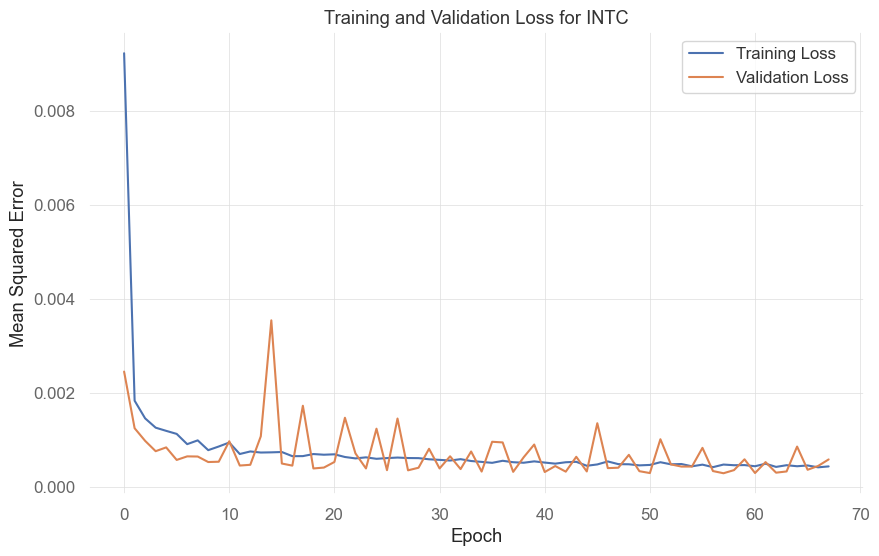

21/21 [==============================] - 0s 874us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0063
val_r2: 0.979256230861289
65/65 [==============================] - 2s 8ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9231429640818928
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0056
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9869478576640602
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 9.5827e-04
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.0018  
val_r2: 0.9560279834185904
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9792289303337994
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0

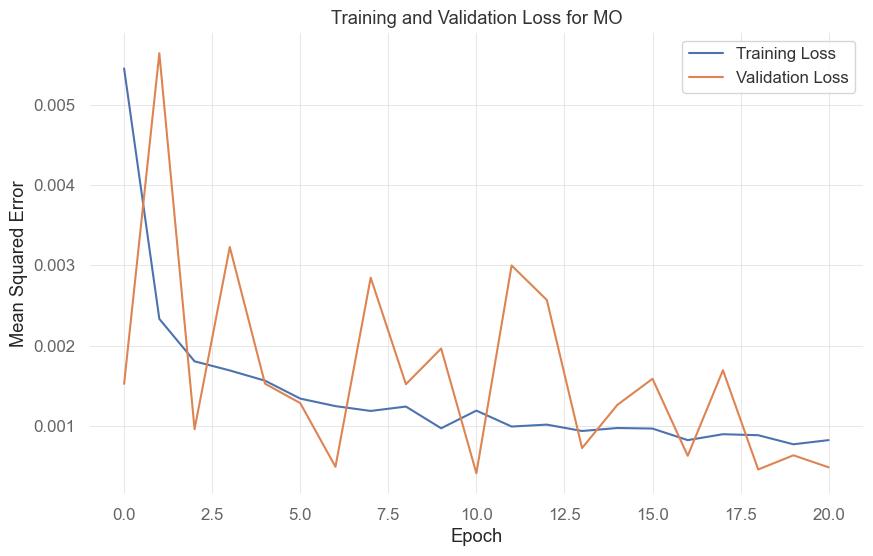

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 819us/steps: 0.0090
val_r2: 0.9641478881155535
65/65 [==============================] - 2s 9ms/step - loss: 0.0080 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9562871982915453
65/65 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9651291902666413
65/65 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9577174978380434
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9398087751397534
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch

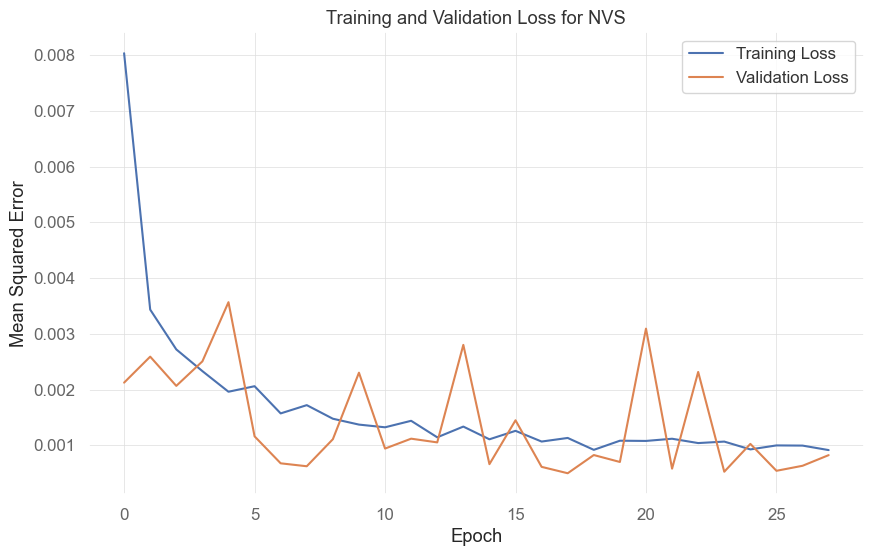

21/21 [==============================] - 0s 843us/step
Epoch 1/100
17/17 [==============================] - 0s 984us/steps: 0.0124
val_r2: 0.9727418125052649
65/65 [==============================] - 2s 9ms/step - loss: 0.0083 - val_loss: 0.0015
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9769812195860307
65/65 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.0025  
val_r2: 0.985414004899559
65/65 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 8.1453e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.0020  
val_r2: 0.988087966424643
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 6.6521e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.0016  
val_r2: 0.9075148803837968
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - va

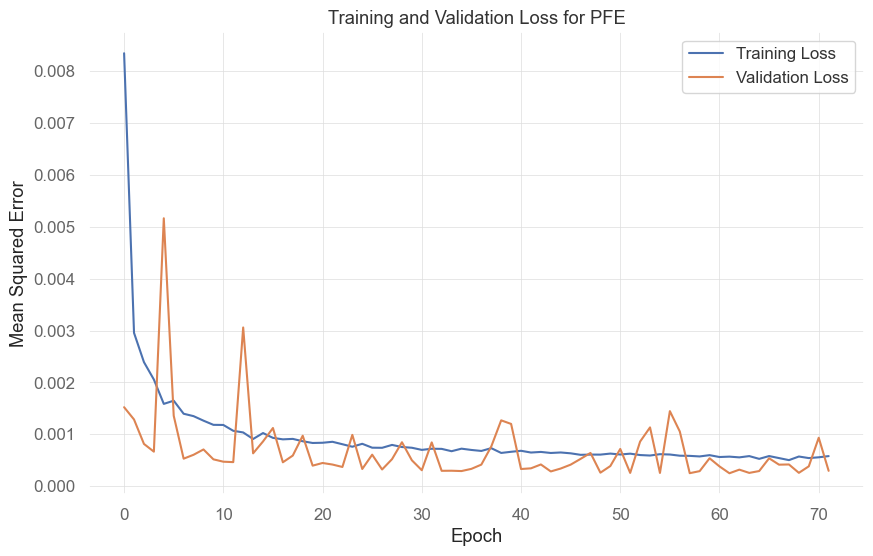

21/21 [==============================] - 0s 912us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.002
val_r2: 0.9757003659732346
65/65 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9237660483606188
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 3/100
17/17 [==============================] - 0s 831us/steps: 0.00
val_r2: 0.987791616484872
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 7.2958e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.0013  
val_r2: 0.9896702202071553
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 6.1731e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.0012  
val_r2: 0.9896146925034471
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_lo

Epoch 42/100
17/17 [==============================] - 0s 882us/steps: 4.6536e-
val_r2: 0.9938438468157641
65/65 [==============================] - 0s 3ms/step - loss: 4.1976e-04 - val_loss: 3.6790e-04
Epoch 43/100
17/17 [==============================] - 0s 854us/steps: 4.1516e-
val_r2: 0.9943084841356834
65/65 [==============================] - 0s 2ms/step - loss: 4.1295e-04 - val_loss: 3.4013e-04
Epoch 44/100
17/17 [==============================] - 0s 960us/steps: 3.9339e-
val_r2: 0.9953898829487636
65/65 [==============================] - 0s 2ms/step - loss: 3.9907e-04 - val_loss: 2.7550e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 4.0807e-
val_r2: 0.9945694383057821
65/65 [==============================] - 0s 3ms/step - loss: 4.4056e-04 - val_loss: 3.2453e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 3.9685e-
val_r2: 0.9788698165288561
65/65 [==============================] - 0s 2ms/step - loss: 4.0351e-04 - val_loss: 0.0013

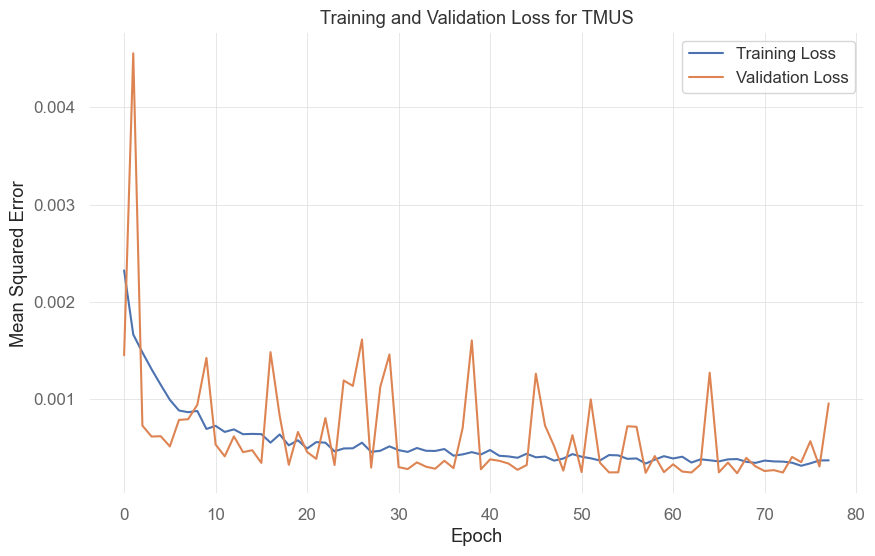

21/21 [==============================] - 0s 809us/step
Epoch 1/100
17/17 [==============================] - 0s 979us/steps: 0.003
val_r2: 0.968748949548313
65/65 [==============================] - 2s 10ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.0019 
val_r2: 0.9820444037968393
65/65 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 6.5567e-04
Epoch 3/100
17/17 [==============================] - 0s 877us/steps: 0.0020  
val_r2: 0.9562571425444203
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9576959467640961
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9505943656797025
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 

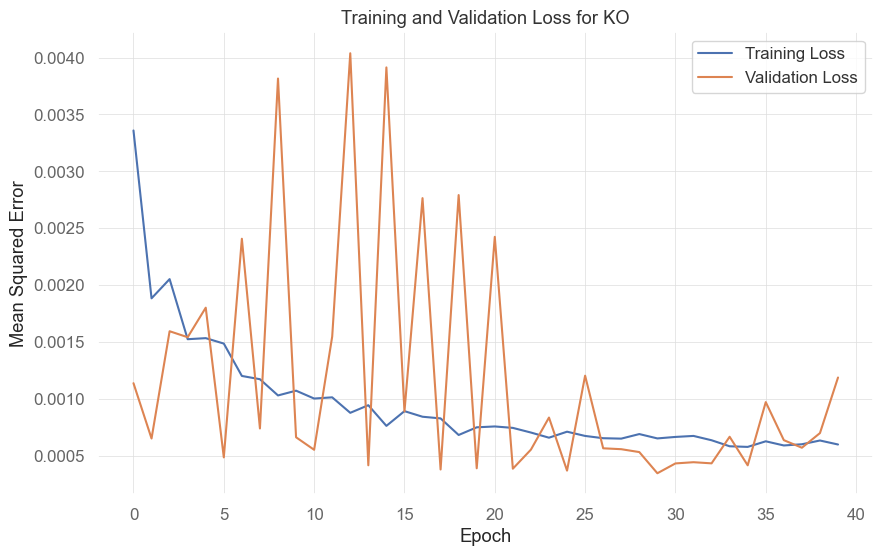

21/21 [==============================] - 0s 924us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0297
val_r2: 0.8322417300930958
65/65 [==============================] - 3s 9ms/step - loss: 0.0191 - val_loss: 0.0042
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9156987716812188
65/65 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.8156834475119854
65/65 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9375247145087697
65/65 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9224583084433606
65/65 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0019
Epo

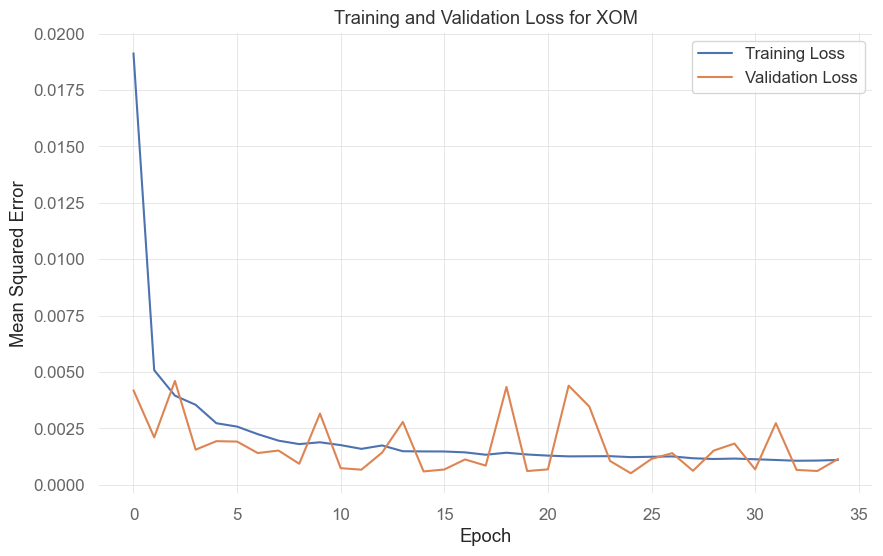

21/21 [==============================] - 0s 843us/step
  Stock        MSE       MAE        R2
0   ABT  18.138315  3.633475  0.838794
1   IBM   6.722230  1.915610  0.927818
2  ORCL   3.541607  1.349808  0.976346
3  INTC   2.013845  1.051553  0.980988
4    MO   1.818409  1.019943  0.903314
5   NVS   2.799333  1.316331  0.843601
6   PFE   1.318275  0.818288  0.974809
7  TMUS   8.983179  2.334820  0.943906
8    KO   0.858800  0.687087  0.971578
9   XOM   6.952149  2.117317  0.985960


In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = RobustScaler()
    scaler_Y = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(28, return_sequences=False, activation='linear'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(14, activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='rmsprop', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [475]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

5.3146142273646735
1.6244231196140468
0.9347115556729705


In [476]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/Bidirectional_rmsprop.csv')

In [97]:
BiLSTM_rmsprop_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/Bidirectional_rmsprop.csv')
BiLSTM_rmsprop_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
BiLSTM_rmsprop_Predicted_Prices

ABT        IBM       ORCL       INTC         MO        NVS  \
0     90.506100  122.27843  53.312790  62.069004  38.712433  85.481090   
1     89.711450  124.27229  53.511070  62.711304  38.977467  85.026450   
2     90.515800  126.72273  54.205960  62.470730  39.399136  85.382996   
3     90.342330  127.22552  54.187560  62.690453  39.755432  85.964455   
4     91.111970  126.60485  54.155857  63.030304  39.997850  86.494990   
..          ...        ...        ...        ...        ...        ...   
644  106.375595  140.40071  81.736430  26.483767  46.559948  90.159860   
645  106.142210  140.78459  81.145584  26.449455  46.679024  90.610450   
646  105.778030  141.21422  81.355210  26.375740  46.688930  90.581380   
647  105.031270  140.42612  81.063550  26.021059  46.652360  90.701180   
648  105.358770  139.90274  81.775810  26.017193  46.579094  90.783940   

           PFE        TMUS         KO         XOM  
0    34.495792  100.472466  47.246918   48.243850  
1    34.411240  100.605225  47.828453   49.704205  
2    34.434220  100.987000  48.333600   50.783590  
3    34.447884  101.311490  48.495342   51.713420  
4    34.271572  104.126450  48.502460   51.660100  
..         ...         ...        ...         ...  
644  51.558792  142.291850  62.883130  105.904670  
645  51.514603  141.699520  63.141315  107.598120  
646  50.894703  141.895200  63.099247  108.068410  
647  50.426530  141.139270  63.184498  108.382910  
648  50.665090  141.158700  63.312763  108.043080  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


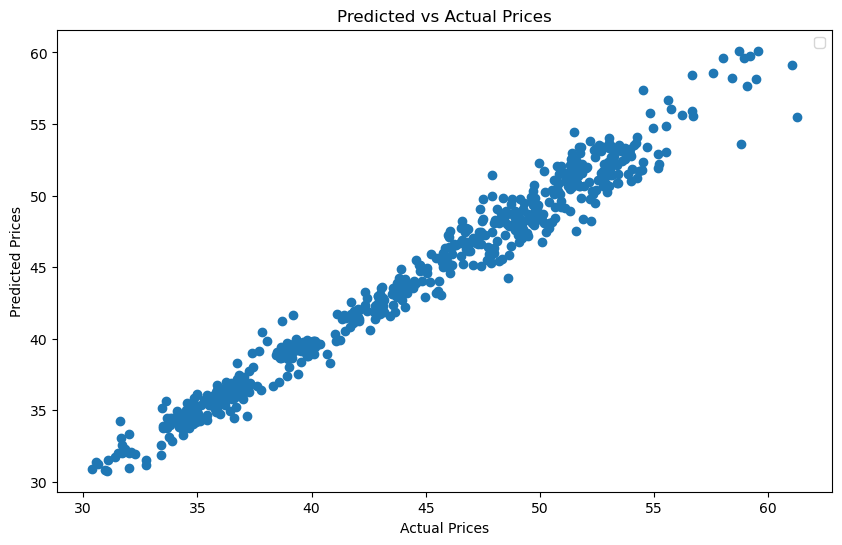

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], BiLSTM_rmsprop_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization

In [70]:
assetLabels = BiLSTM_rmsprop_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = BiLSTM_rmsprop_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.026  0.024  0.07  -0.127  0.03   0.01   0.064  0.056  0.047  0.128]

Variance-Covariance Matrix of Returns:
 [[0.448 0.099 0.136 0.179 0.032 0.095 0.159 0.096 0.106 0.003]
 [0.099 0.617 0.176 0.355 0.083 0.082 0.161 0.16  0.169 0.183]
 [0.136 0.176 0.798 0.227 0.096 0.067 0.179 0.169 0.139 0.059]
 [0.179 0.355 0.227 1.312 0.119 0.191 0.138 0.166 0.127 0.177]
 [0.032 0.083 0.096 0.119 0.313 0.063 0.009 0.05  0.088 0.119]
 [0.095 0.082 0.067 0.191 0.063 0.227 0.118 0.114 0.088 0.055]
 [0.159 0.161 0.179 0.138 0.009 0.118 0.861 0.154 0.106 0.016]
 [0.096 0.16  0.169 0.166 0.05  0.114 0.154 0.734 0.122 0.111]
 [0.106 0.169 0.139 0.127 0.088 0.088 0.106 0.122 0.331 0.054]
 [0.003 0.183 0.059 0.177 0.119 0.055 0.016 0.111 0.054 0.729]]


## Portfolio Returns with Bidirectional LSTM-RMSprop Predictions 

In [71]:
portfolioSize = len(BiLSTM_rmsprop_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.457]] 
Annualized Risk (%):   [[8.411]] 
Annualized Expected Portfolio Return(%):   [23.667]

Optimal weights (%):
 [[ 0.   ]
 [ 0.   ]
 [13.94 ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [14.405]
 [ 4.447]
 [16.297]
 [50.911]]


##   Bidirectional LSTM price predictions with Adamax Optimizer   

Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0178
val_r2: 0.9841661278121353
65/65 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 8.9422e-04
Epoch 2/100
17/17 [==============================] - 0s 887us/steps: 0.00
val_r2: 0.9862841467790829
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 7.7460e-04
Epoch 3/100
17/17 [==============================] - 0s 978us/steps: 0.0011  
val_r2: 0.9876011590107674
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 7.0022e-04
Epoch 4/100
17/17 [==============================] - 0s 0s/steploss: 9.3763e-
val_r2: 0.9858973879014906
65/65 [==============================] - 0s 3ms/step - loss: 9.8871e-04 - val_loss: 7.9644e-04
Epoch 5/100
17/17 [==============================] - 0s 691us/steps: 9.6660e-
val_r2: 0.989378261014138
65/65 [==============================] - 0s 3ms/step - loss: 9.4989e-04 - val_loss: 5.9986e-04
Epoch 6/100
17/17 [

Epoch 42/100
17/17 [==============================] - 0s 0s/steploss: 2.1426e-
val_r2: 0.9974657493872672
65/65 [==============================] - 0s 2ms/step - loss: 2.1570e-04 - val_loss: 1.4312e-04
Epoch 43/100
17/17 [==============================] - 0s 979us/steps: 2.2430e-
val_r2: 0.9973874044224283
65/65 [==============================] - 0s 2ms/step - loss: 2.2703e-04 - val_loss: 1.4755e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.1153e-
val_r2: 0.9973559190256804
65/65 [==============================] - 0s 2ms/step - loss: 1.9976e-04 - val_loss: 1.4932e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 2.1116e-
val_r2: 0.9973907889049307
65/65 [==============================] - 0s 2ms/step - loss: 2.0828e-04 - val_loss: 1.4736e-04
Epoch 46/100
17/17 [==============================] - 0s 938us/steps: 2.1995e-
val_r2: 0.9971252143938281
65/65 [==============================] - 0s 2ms/step - loss: 2.2147e-04 - val_loss: 1.6235

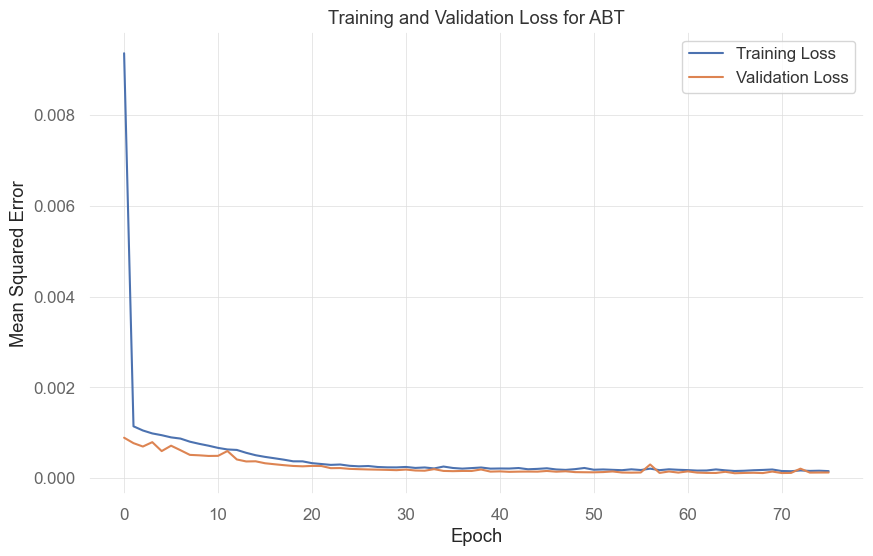

21/21 [==============================] - 0s 902us/step
Epoch 1/100
17/17 [==============================] - 0s 761us/steps: 0.014
val_r2: 0.9311002173161308
65/65 [==============================] - 2s 10ms/step - loss: 0.0148 - val_loss: 0.0029
Epoch 2/100
17/17 [==============================] - 0s 789us/steps: 0.00
val_r2: 0.93715273849173
65/65 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.941668999039417
65/65 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 0s 844us/steps: 0.00
val_r2: 0.9472274245201767
65/65 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 0s 875us/steps: 0.00
val_r2: 0.9517941440400425
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 

Epoch 83/100
17/17 [==============================] - 0s 686us/steps: 3.6508e-
val_r2: 0.991732284419653
65/65 [==============================] - 0s 2ms/step - loss: 3.6403e-04 - val_loss: 3.4850e-04
Epoch 84/100
17/17 [==============================] - 0s 954us/steps: 4.0851e-
val_r2: 0.9914724179043277
65/65 [==============================] - 0s 3ms/step - loss: 4.0753e-04 - val_loss: 3.5946e-04
Epoch 85/100
17/17 [==============================] - 0s 750us/steps: 3.4879e-
val_r2: 0.9917498510651942
65/65 [==============================] - 0s 3ms/step - loss: 3.6244e-04 - val_loss: 3.4776e-04
Epoch 86/100
17/17 [==============================] - 0s 763us/steps: 3.2142e-
val_r2: 0.9921196200703487
65/65 [==============================] - 0s 3ms/step - loss: 3.6149e-04 - val_loss: 3.3218e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 3.4648e-
val_r2: 0.9921608421374157
65/65 [==============================] - 0s 3ms/step - loss: 3.7572e-04 - val_loss: 3.3044e

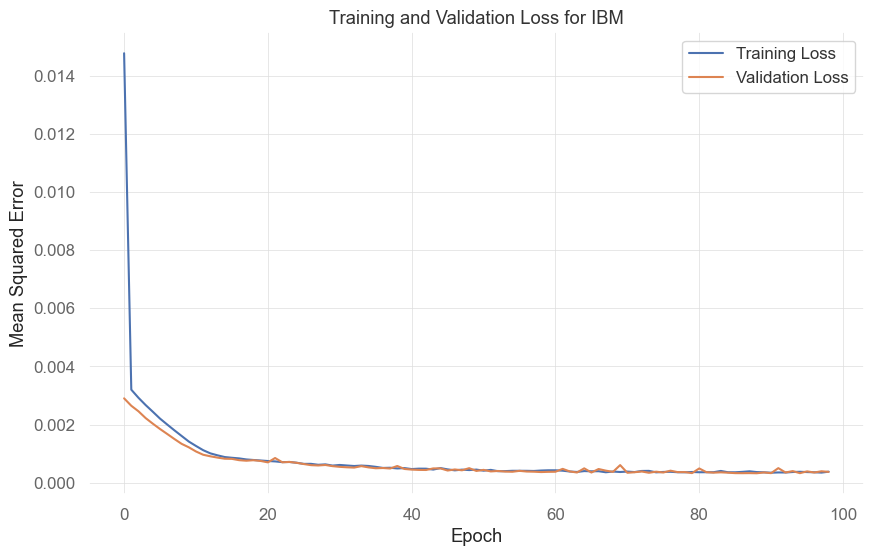

21/21 [==============================] - 0s 774us/step
Epoch 1/100
17/17 [==============================] - 0s 819us/steps: 0.0578
val_r2: 0.9313726975451494
65/65 [==============================] - 2s 9ms/step - loss: 0.0357 - val_loss: 0.0037
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9483740661586363
65/65 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9562727482321862
65/65 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 4/100
17/17 [==============================] - 0s 977us/steps: 0.00
val_r2: 0.9604458862961743
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9631840988825002
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epo

Epoch 83/100
17/17 [==============================] - 0s 727us/steps: 3.3527e-
val_r2: 0.9936798917476173
65/65 [==============================] - 0s 3ms/step - loss: 3.2756e-04 - val_loss: 3.3767e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 3.3533e-
val_r2: 0.9943501660901495
65/65 [==============================] - 0s 3ms/step - loss: 3.3083e-04 - val_loss: 3.0186e-04
Epoch 85/100
17/17 [==============================] - 0s 744us/steps: 3.3677e-
val_r2: 0.9895301348013505
65/65 [==============================] - 0s 3ms/step - loss: 3.9073e-04 - val_loss: 5.5938e-04
Epoch 86/100
17/17 [==============================] - 0s 759us/steps: 4.2207e-
val_r2: 0.9917943588662264
65/65 [==============================] - 0s 2ms/step - loss: 3.8921e-04 - val_loss: 4.3841e-04
Epoch 87/100
17/17 [==============================] - 0s 756us/steps: 3.2940e-
val_r2: 0.9942590189715855
65/65 [==============================] - 0s 2ms/step - loss: 3.4360e-04 - val_loss: 3.0673

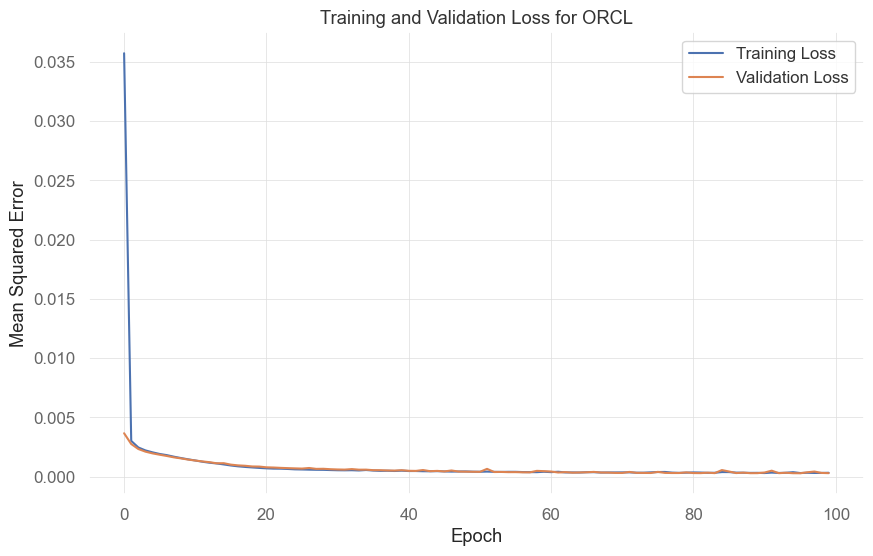

21/21 [==============================] - 0s 900us/step
Epoch 1/100
17/17 [==============================] - 0s 2ms/steposs: 0.0144
val_r2: 0.9708282669032582
65/65 [==============================] - 2s 9ms/step - loss: 0.0088 - val_loss: 0.0016
Epoch 2/100
17/17 [==============================] - 0s 655us/steps: 0.00
val_r2: 0.9739288636719302
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/100
17/17 [==============================] - 0s 792us/steps: 0.00
val_r2: 0.9754550208279316
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.0012  
val_r2: 0.9777573301571665
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/100
17/17 [==============================] - 0s 945us/steps: 0.00
val_r2: 0.9781280823298916
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0012

Epoch 42/100
17/17 [==============================] - 0s 889us/steps: 3.0463e-
val_r2: 0.994151332940386
65/65 [==============================] - 0s 3ms/step - loss: 3.0469e-04 - val_loss: 3.2441e-04
Epoch 43/100
17/17 [==============================] - 0s 906us/steps: 3.0014e-
val_r2: 0.9927315709653232
65/65 [==============================] - 0s 3ms/step - loss: 3.1011e-04 - val_loss: 4.0316e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.9817e-
val_r2: 0.9938076825001907
65/65 [==============================] - 0s 3ms/step - loss: 3.0882e-04 - val_loss: 3.4347e-04
Epoch 45/100
17/17 [==============================] - 0s 860us/steps: 3.2898e-
val_r2: 0.9936766856843913
65/65 [==============================] - 0s 3ms/step - loss: 3.5214e-04 - val_loss: 3.5074e-04
Epoch 46/100
17/17 [==============================] - 0s 700us/steps: 3.2593e-
val_r2: 0.9921205469915388
65/65 [==============================] - 0s 4ms/step - loss: 3.2616e-04 - val_loss: 4.3705e

Epoch 83/100
17/17 [==============================] - 0s 686us/steps: 2.3835e-
val_r2: 0.9946408062026588
65/65 [==============================] - 0s 3ms/step - loss: 2.3835e-04 - val_loss: 2.9726e-04
Epoch 84/100
17/17 [==============================] - 0s 854us/steps: 2.6823e-
val_r2: 0.9952220245625741
65/65 [==============================] - 0s 3ms/step - loss: 2.2441e-04 - val_loss: 2.6969e-04


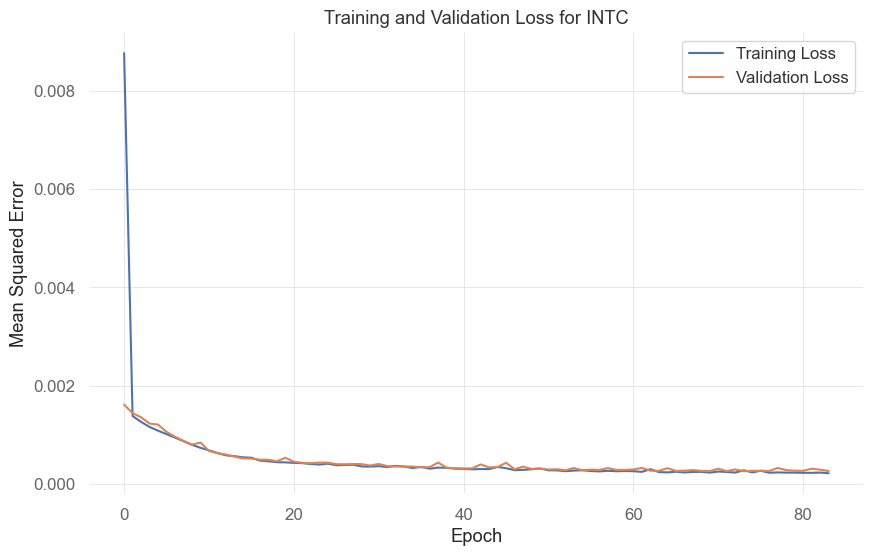

21/21 [==============================] - 0s 776us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.018
val_r2: 0.9810753662572906
65/65 [==============================] - 2s 9ms/step - loss: 0.0178 - val_loss: 0.0014
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9841398313673292
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
17/17 [==============================] - 0s 873us/steps: 0.0010  
val_r2: 0.9850978744889062
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
17/17 [==============================] - 0s 914us/steps: 9.2286e-
val_r2: 0.9858566512789747
65/65 [==============================] - 0s 3ms/step - loss: 9.5173e-04 - val_loss: 0.0010
Epoch 5/100
17/17 [==============================] - 0s 978us/steps: 9.1946e-
val_r2: 0.9865628754461695
65/65 [==============================] - 0s 3ms/step - loss: 9.0290e-04 - v

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 2.3316e-
val_r2: 0.995166054347388
65/65 [==============================] - 0s 3ms/step - loss: 2.3887e-04 - val_loss: 3.4626e-04
Epoch 43/100
17/17 [==============================] - 0s 987us/steps: 2.4028e-
val_r2: 0.9956658350843344
65/65 [==============================] - 0s 3ms/step - loss: 2.3049e-04 - val_loss: 3.1046e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.3392e-
val_r2: 0.9959416700826206
65/65 [==============================] - 0s 3ms/step - loss: 2.3392e-04 - val_loss: 2.9070e-04
Epoch 45/100
17/17 [==============================] - 0s 796us/steps: 2.3456e-
val_r2: 0.9956541657603346
65/65 [==============================] - 0s 3ms/step - loss: 2.3934e-04 - val_loss: 3.1130e-04
Epoch 46/100
17/17 [==============================] - 0s 963us/steps: 2.2246e-
val_r2: 0.9954080929399157
65/65 [==============================] - 0s 3ms/step - loss: 2.2562e-04 - val_loss: 3.2892e

Epoch 83/100
17/17 [==============================] - 0s 883us/steps: 1.6320e-
val_r2: 0.9973015813416356
65/65 [==============================] - 0s 4ms/step - loss: 1.5939e-04 - val_loss: 1.9329e-04
Epoch 84/100
17/17 [==============================] - 0s 856us/steps: 1.4358e-
val_r2: 0.9972979672520981
65/65 [==============================] - 0s 3ms/step - loss: 1.4138e-04 - val_loss: 1.9355e-04
Epoch 85/100
17/17 [==============================] - 0s 923us/steps: 1.5557e-
val_r2: 0.9972124198561164
65/65 [==============================] - 0s 4ms/step - loss: 1.4973e-04 - val_loss: 1.9968e-04
Epoch 86/100
17/17 [==============================] - 0s 889us/steps: 1.7190e-
val_r2: 0.9959640536022404
65/65 [==============================] - 0s 3ms/step - loss: 1.7652e-04 - val_loss: 2.8910e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 1.5486e-
val_r2: 0.9972324032442321
65/65 [==============================] - 0s 3ms/step - loss: 1.5586e-04 - val_loss: 1.9825

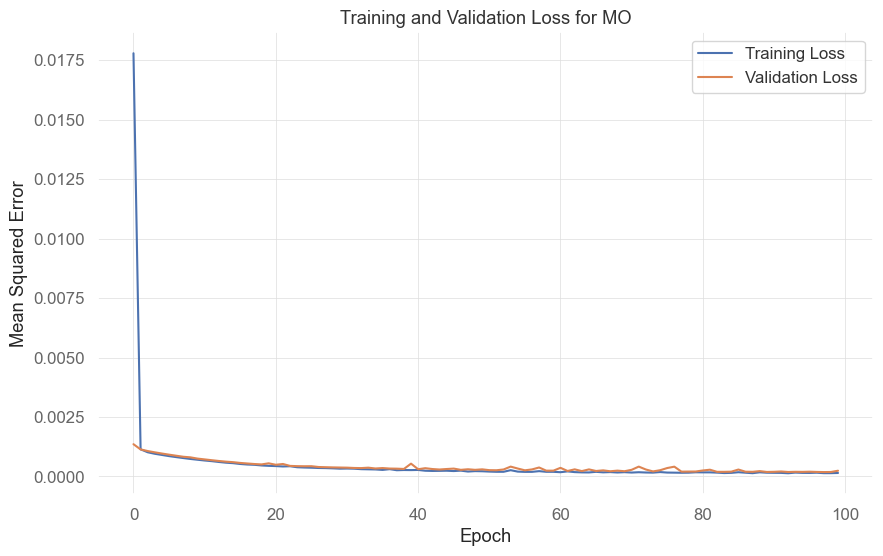

21/21 [==============================] - 0s 797us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.035
val_r2: 0.9653034640703516
65/65 [==============================] - 2s 11ms/step - loss: 0.0314 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 803us/steps: 0.00
val_r2: 0.9675356278877633
65/65 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 3/100
17/17 [==============================] - 0s 689us/steps: 0.00
val_r2: 0.9687019826723855
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9702555971632255
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 5/100
17/17 [==============================] - 0s 765us/steps: 0.00
val_r2: 0.9703333887787442
65/65 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epo

Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 4.5509e-
val_r2: 0.9924548006150702
65/65 [==============================] - 0s 4ms/step - loss: 4.6518e-04 - val_loss: 4.5953e-04
Epoch 44/100
17/17 [==============================] - 0s 823us/steps: 4.4361e-
val_r2: 0.9905790502355303
65/65 [==============================] - 0s 3ms/step - loss: 4.4265e-04 - val_loss: 5.7377e-04
Epoch 45/100
17/17 [==============================] - 0s 937us/steps: 4.7272e-
val_r2: 0.9927542493007633
65/65 [==============================] - 0s 4ms/step - loss: 4.5694e-04 - val_loss: 4.4130e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 4.1877e-
val_r2: 0.9926301550640259
65/65 [==============================] - 0s 3ms/step - loss: 4.3609e-04 - val_loss: 4.4885e-04
Epoch 47/100
17/17 [==============================] - 0s 828us/steps: 4.2865e-
val_r2: 0.9917582215335038
65/65 [==============================] - 0s 3ms/step - loss: 4.1987e-04 - val_loss: 5.0196

Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 2.9948e-
val_r2: 0.9949552557621281
65/65 [==============================] - 0s 3ms/step - loss: 2.9762e-04 - val_loss: 3.0725e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 3.1888e-
val_r2: 0.9951727478837059
65/65 [==============================] - 0s 3ms/step - loss: 3.1165e-04 - val_loss: 2.9400e-04
Epoch 86/100
17/17 [==============================] - 0s 835us/steps: 2.8312e-
val_r2: 0.9941145221889175
65/65 [==============================] - 0s 3ms/step - loss: 2.8475e-04 - val_loss: 3.5845e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 2.9795e-
val_r2: 0.9954887865986523
65/65 [==============================] - 0s 3ms/step - loss: 3.0090e-04 - val_loss: 2.7475e-04
Epoch 88/100
17/17 [==============================] - 0s 880us/steps: 2.8041e-
val_r2: 0.9950590279407955
65/65 [==============================] - 0s 3ms/step - loss: 2.9585e-04 - val_loss: 3.0092

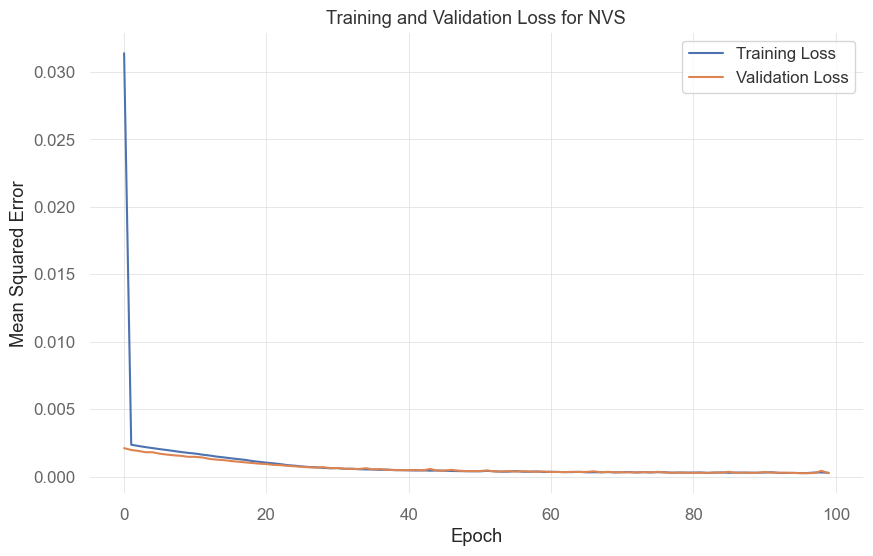

21/21 [==============================] - 0s 857us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.039
val_r2: 0.9617304019951718
65/65 [==============================] - 2s 10ms/step - loss: 0.0372 - val_loss: 0.0022
Epoch 2/100
17/17 [==============================] - 0s 918us/steps: 0.00
val_r2: 0.969709428481672
65/65 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9735067646747229
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
17/17 [==============================] - 0s 732us/steps: 0.0015 
val_r2: 0.9759380516306871
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9781239819753226
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
E

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 2.5626e-
val_r2: 0.9954384280595754
65/65 [==============================] - 0s 3ms/step - loss: 2.6462e-04 - val_loss: 2.6787e-04
Epoch 43/100
17/17 [==============================] - 0s 774us/steps: 2.9354e-
val_r2: 0.9955017038387461
65/65 [==============================] - 0s 3ms/step - loss: 2.6664e-04 - val_loss: 2.6415e-04
Epoch 44/100
17/17 [==============================] - 0s 859us/steps: 2.7044e-
val_r2: 0.99336768269098
65/65 [==============================] - 0s 3ms/step - loss: 2.7359e-04 - val_loss: 3.8947e-04
Epoch 45/100
17/17 [==============================] - 0s 834us/steps: 2.4434e-
val_r2: 0.9957521146280724
65/65 [==============================] - 0s 3ms/step - loss: 2.4333e-04 - val_loss: 2.4945e-04
Epoch 46/100
17/17 [==============================] - 0s 837us/steps: 2.9963e-
val_r2: 0.9956357985851501
65/65 [==============================] - 0s 2ms/step - loss: 2.7144e-04 - val_loss: 2.5628e-

Epoch 83/100
17/17 [==============================] - 0s 741us/steps: 1.8752e-
val_r2: 0.9966157530800048
65/65 [==============================] - 0s 3ms/step - loss: 2.0440e-04 - val_loss: 1.9873e-04
Epoch 84/100
17/17 [==============================] - 0s 811us/steps: 1.6522e-
val_r2: 0.9959979878879225
65/65 [==============================] - 0s 3ms/step - loss: 1.9056e-04 - val_loss: 2.3501e-04
Epoch 85/100
17/17 [==============================] - 0s 755us/steps: 2.0692e-
val_r2: 0.996383936579302
65/65 [==============================] - 0s 3ms/step - loss: 2.1137e-04 - val_loss: 2.1235e-04
Epoch 86/100
17/17 [==============================] - 0s 747us/steps: 2.0757e-
val_r2: 0.9965663986848945
65/65 [==============================] - 0s 3ms/step - loss: 2.0408e-04 - val_loss: 2.0163e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 1.7154e-
val_r2: 0.9957025661055628
65/65 [==============================] - 0s 3ms/step - loss: 1.8888e-04 - val_loss: 2.5236e

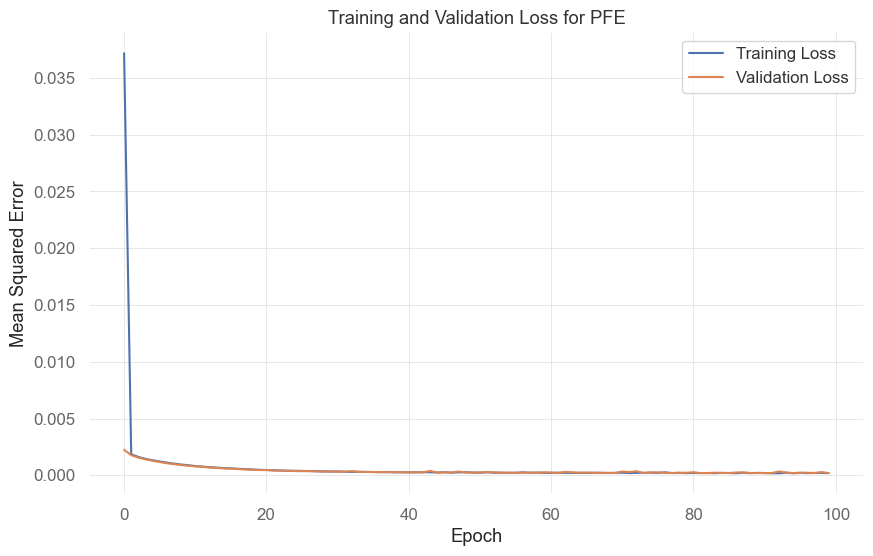

21/21 [==============================] - 0s 921us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0338
val_r2: 0.9782547340026229
65/65 [==============================] - 2s 8ms/step - loss: 0.0212 - val_loss: 0.0012
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9817175550984932
65/65 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9839469831623708
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.1497e-04
Epoch 4/100
17/17 [==============================] - 0s 927us/steps: 0.00
val_r2: 0.9852801970461038
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 8.3898e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 9.7624e-
val_r2: 0.9864533473280518
65/65 [==============================] - 0s 3ms/step - loss: 9.7266e-04 - val_

Epoch 42/100
17/17 [==============================] - 0s 760us/steps: 2.4437e-
val_r2: 0.9966709226609178
65/65 [==============================] - 0s 3ms/step - loss: 2.4320e-04 - val_loss: 1.8975e-04
Epoch 43/100
17/17 [==============================] - 0s 715us/steps: 2.3484e-
val_r2: 0.9968997449393111
65/65 [==============================] - 0s 2ms/step - loss: 2.3901e-04 - val_loss: 1.7670e-04
Epoch 44/100
17/17 [==============================] - 0s 873us/steps: 2.3648e-
val_r2: 0.9970146684555916
65/65 [==============================] - 0s 3ms/step - loss: 2.3548e-04 - val_loss: 1.7015e-04
Epoch 45/100
17/17 [==============================] - 0s 860us/steps: 2.6228e-
val_r2: 0.9968552912889119
65/65 [==============================] - 0s 3ms/step - loss: 2.4180e-04 - val_loss: 1.7924e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 2.5375e-
val_r2: 0.9970869882002348
65/65 [==============================] - 0s 3ms/step - loss: 2.2293e-04 - val_loss: 1.6603

Epoch 83/100
17/17 [==============================] - 0s 2ms/steposs: 1.7674e-
val_r2: 0.9977896071423533
65/65 [==============================] - 0s 2ms/step - loss: 1.8321e-04 - val_loss: 1.2599e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 1.6550e-
val_r2: 0.9972934490777934
65/65 [==============================] - 0s 3ms/step - loss: 1.6695e-04 - val_loss: 1.5426e-04
Epoch 85/100
17/17 [==============================] - 0s 920us/steps: 1.6687e-
val_r2: 0.9975936139092482
65/65 [==============================] - 0s 2ms/step - loss: 1.5668e-04 - val_loss: 1.3716e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 1.5079e-
val_r2: 0.9975929659634178
65/65 [==============================] - 0s 3ms/step - loss: 1.4866e-04 - val_loss: 1.3719e-04
Epoch 87/100
17/17 [==============================] - 0s 989us/steps: 1.5750e-
val_r2: 0.9973855553527665
65/65 [==============================] - 0s 3ms/step - loss: 1.5676e-04 - val_loss: 1.4901

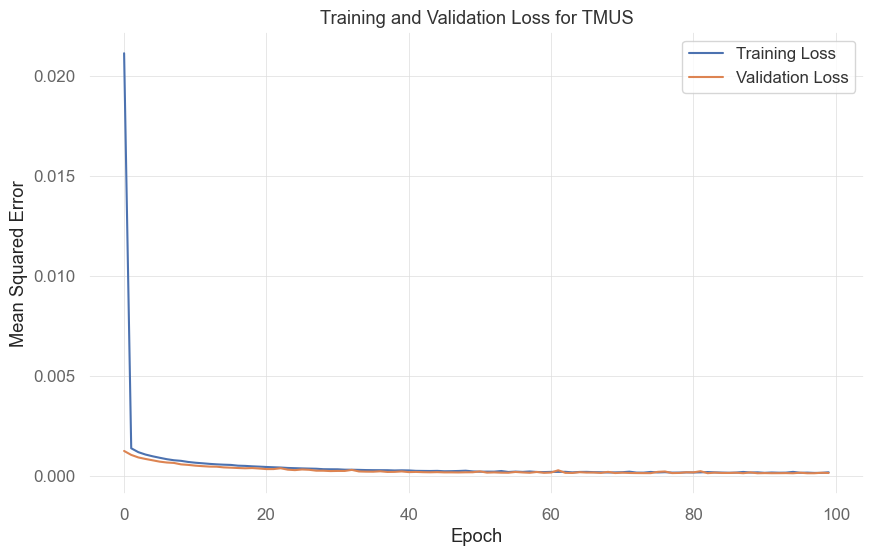

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 2ms/steposs: 0.0389
val_r2: 0.9713063657732041
65/65 [==============================] - 2s 8ms/step - loss: 0.0223 - val_loss: 0.0010
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9754438622699253
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 8.9321e-04
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.0013  
val_r2: 0.9767014650291815
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 8.4747e-04
Epoch 4/100
17/17 [==============================] - 0s 809us/steps: 0.00
val_r2: 0.977834130383655
65/65 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 8.0627e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.0013  
val_r2: 0.9779351544410878
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 3.1232e-
val_r2: 0.991898954762864
65/65 [==============================] - 0s 2ms/step - loss: 3.0436e-04 - val_loss: 2.9467e-04
Epoch 43/100
17/17 [==============================] - 0s 985us/steps: 2.9812e-
val_r2: 0.9923954087537407
65/65 [==============================] - 0s 3ms/step - loss: 2.9712e-04 - val_loss: 2.7661e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.9052e-
val_r2: 0.9915979372897469
65/65 [==============================] - 0s 2ms/step - loss: 2.9862e-04 - val_loss: 3.0562e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 2.8791e-
val_r2: 0.9909854683056489
65/65 [==============================] - 0s 3ms/step - loss: 2.9210e-04 - val_loss: 3.2790e-04
Epoch 46/100
17/17 [==============================] - 0s 924us/steps: 2.7214e-
val_r2: 0.9921610763340472
65/65 [==============================] - 0s 2ms/step - loss: 2.9885e-04 - val_loss: 2.8514e

Epoch 83/100
17/17 [==============================] - 0s 1ms/steposs: 2.3014e-
val_r2: 0.9932936569922249
65/65 [==============================] - 0s 2ms/step - loss: 2.3823e-04 - val_loss: 2.4394e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 2.3742e-
val_r2: 0.9924378404436006
65/65 [==============================] - 0s 3ms/step - loss: 2.4936e-04 - val_loss: 2.7507e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 2.2831e-
val_r2: 0.9926677609865043
65/65 [==============================] - 0s 3ms/step - loss: 2.5356e-04 - val_loss: 2.6671e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 2.4656e-
val_r2: 0.9941197096242976
65/65 [==============================] - 0s 3ms/step - loss: 2.4447e-04 - val_loss: 2.1389e-04
Epoch 87/100
17/17 [==============================] - 0s 2ms/steposs: 2.4570e-
val_r2: 0.9940723616026095
65/65 [==============================] - 0s 3ms/step - loss: 2.4016e-04 - val_loss: 2.1561

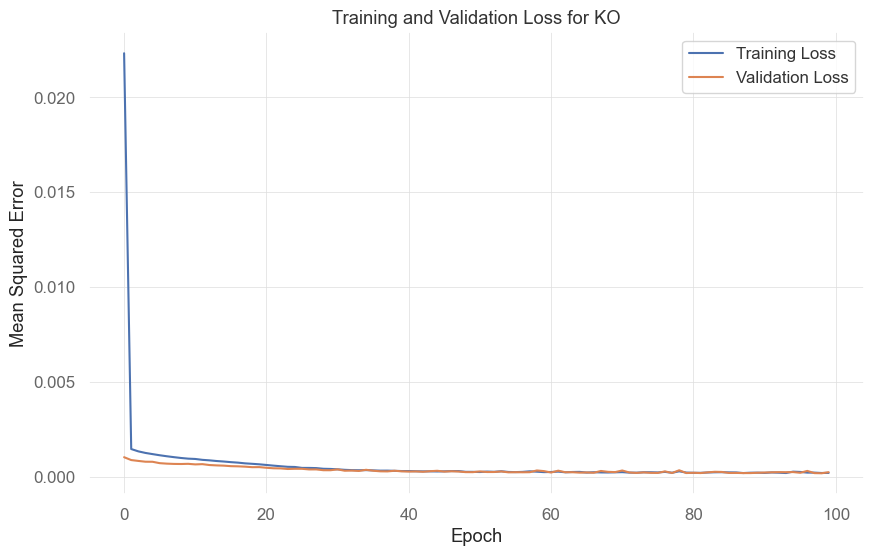

21/21 [==============================] - 0s 933us/step
Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.0607
val_r2: 0.912844650831541
65/65 [==============================] - 3s 8ms/step - loss: 0.0411 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 946us/steps: 0.00
val_r2: 0.9227423137385342
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9247174692973023
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/100
17/17 [==============================] - 0s 875us/steps: 0.0015  
val_r2: 0.9267376274205723
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9283603582728607
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018


Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 3.4691e-
val_r2: 0.9826375253826767
65/65 [==============================] - 0s 2ms/step - loss: 3.4782e-04 - val_loss: 4.2616e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 3.8664e-
val_r2: 0.9831581256794848
65/65 [==============================] - 0s 3ms/step - loss: 3.6405e-04 - val_loss: 4.1338e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 3.3180e-
val_r2: 0.9831804335681954
65/65 [==============================] - 0s 2ms/step - loss: 3.4400e-04 - val_loss: 4.1283e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 3.2420e-
val_r2: 0.9835010421610422
65/65 [==============================] - 0s 3ms/step - loss: 3.3330e-04 - val_loss: 4.0496e-04
Epoch 47/100
17/17 [==============================] - 0s 800us/steps: 3.3727e-
val_r2: 0.9817479220194727
65/65 [==============================] - 0s 2ms/step - loss: 3.3881e-04 - val_loss: 4.4799

Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 2.8933e-
val_r2: 0.9878375544905061
65/65 [==============================] - 0s 2ms/step - loss: 2.7719e-04 - val_loss: 2.9852e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 2.6572e-
val_r2: 0.9863330417520708
65/65 [==============================] - 0s 3ms/step - loss: 2.9038e-04 - val_loss: 3.3545e-04
Epoch 86/100
17/17 [==============================] - 0s 1ms/steposs: 2.9318e-
val_r2: 0.9855391633979316
65/65 [==============================] - 0s 3ms/step - loss: 2.8464e-04 - val_loss: 3.5494e-04
Epoch 87/100
17/17 [==============================] - 0s 1ms/steposs: 2.5409e-
val_r2: 0.9880208206250704
65/65 [==============================] - 0s 3ms/step - loss: 2.6478e-04 - val_loss: 2.9402e-04
Epoch 88/100
17/17 [==============================] - 0s 1ms/steposs: 2.7308e-
val_r2: 0.9879696611611095
65/65 [==============================] - 0s 3ms/step - loss: 2.6489e-04 - val_loss: 2.9528

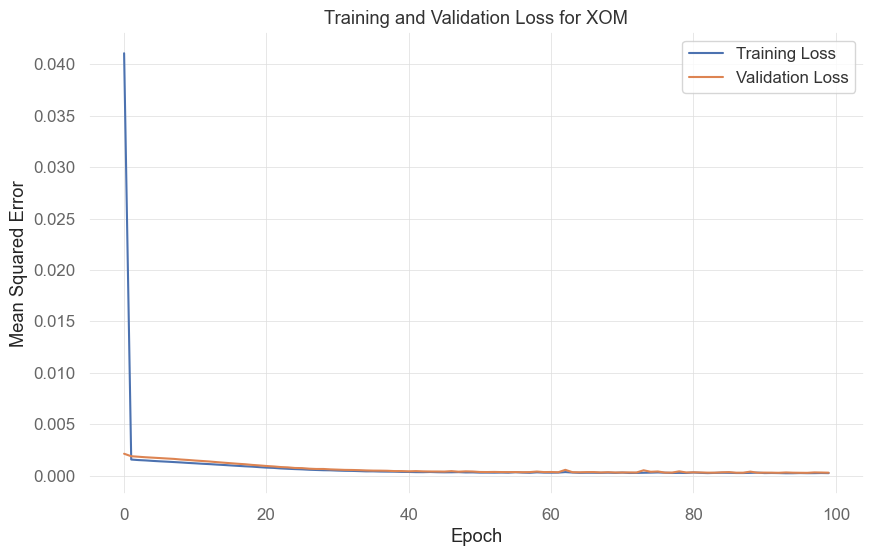

21/21 [==============================] - 0s 1ms/step
  Stock        MSE       MAE        R2
0   ABT  12.292330  2.886437  0.890751
1   IBM   4.771130  1.576818  0.948769
2  ORCL   4.671063  1.648494  0.968803
3  INTC   1.661692  0.904118  0.984312
4    MO   0.740160  0.604346  0.960645
5   NVS   1.312170  0.863609  0.926689
6   PFE   1.048396  0.717443  0.979966
7  TMUS   6.991904  2.057264  0.956341
8    KO   0.815555  0.698845  0.973010
9   XOM   3.539741  1.467442  0.992851


In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = RobustScaler()
    scaler_Y = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data 
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # Bidirectional LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(28, return_sequences=False, activation='linear'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(14, activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [481]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

3.784413985137989
1.3424815176448026
0.9582136782692897


In [482]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adamax.csv')

In [94]:
BiLSTM_adamax_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adamax.csv')
BiLSTM_adamax_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
BiLSTM_adamax_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     90.973900  123.759125  53.216230  62.327328  40.241390  85.923180   
1     90.544310  125.691990  53.896667  63.361427  41.184246  85.882470   
2     91.002610  128.480480  54.730550  63.889366  42.384330  86.021610   
3     90.317830  126.979320  54.585450  63.826824  42.307842  87.414110   
4     90.670390  125.035095  54.394300  63.674362  41.993256  87.938194   
..          ...         ...        ...        ...        ...        ...   
644  106.076035  141.468890  79.331345  26.774124  46.139420  90.752045   
645  106.627790  141.631600  79.235000  26.514626  46.366474  91.060390   
646  106.392230  142.153400  79.122630  26.258879  46.599830  90.952960   
647  106.101600  140.665250  78.413750  25.905611  46.428635  90.722570   
648  106.832770  140.621930  78.975340  26.053429  46.365784  91.274590   

           PFE        TMUS         KO         XOM  
0    33.860535   99.276566  47.761750   48.675564  
1    34.047780  100.695050  49.240740   51.020046  
2    34.355396  102.812270  50.210716   52.932343  
3    34.141155  103.334220  49.966510   53.068123  
4    34.173320  104.102936  49.375015   51.871610  
..         ...         ...        ...         ...  
644  50.534916  139.719540  63.728966  107.972970  
645  50.975773  139.822280  64.041756  109.309960  
646  50.314750  141.371840  64.375010  111.074760  
647  49.697002  140.285920  64.047900  110.304190  
648  50.015812  139.816070  63.971540  109.596664  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


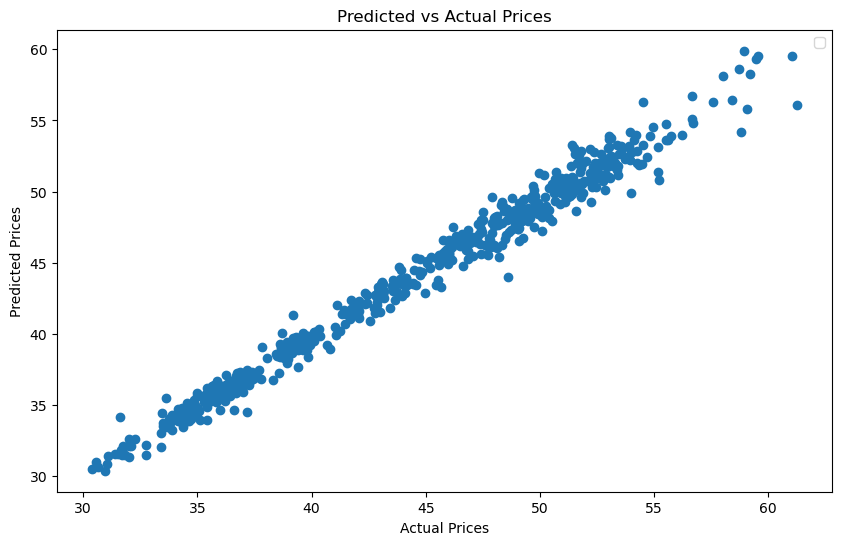

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], BiLSTM_adamax_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization 

In [73]:
assetLabels = BiLSTM_adamax_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = BiLSTM_adamax_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.03   0.027  0.07  -0.123  0.028  0.013  0.068  0.061  0.05   0.136]

Variance-Covariance Matrix of Returns:
 [[1.014 0.162 0.331 0.387 0.18  0.276 0.301 0.347 0.287 0.067]
 [0.162 1.401 0.474 0.58  0.377 0.188 0.342 0.363 0.52  0.539]
 [0.331 0.474 1.854 0.543 0.331 0.208 0.316 0.455 0.451 0.361]
 [0.387 0.58  0.543 2.321 0.25  0.369 0.3   0.382 0.323 0.522]
 [0.18  0.377 0.331 0.25  1.168 0.223 0.208 0.267 0.394 0.466]
 [0.276 0.188 0.208 0.369 0.223 0.672 0.384 0.343 0.27  0.153]
 [0.301 0.342 0.316 0.3   0.208 0.384 1.586 0.226 0.337 0.167]
 [0.347 0.363 0.455 0.382 0.267 0.343 0.226 1.59  0.398 0.297]
 [0.287 0.52  0.451 0.323 0.394 0.27  0.337 0.398 0.997 0.313]
 [0.067 0.539 0.361 0.522 0.466 0.153 0.167 0.297 0.313 2.062]]


## Portfolio Returns with Bidirectional LSTM-adamax Predictions 

In [74]:
portfolioSize = len(BiLSTM_adamax_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.52]] 
Annualized Risk (%):   [[13.026]] 
Annualized Expected Portfolio Return(%):   [22.804]

Optimal weights (%):
 [[ 6.237]
 [ 0.   ]
 [12.932]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [18.41 ]
 [12.262]
 [ 9.466]
 [40.693]]


# GRU 

## GRU price predictions with Adam Optimizer

Epoch 1/50
65/65 [==============================] - 1s 10ms/step - loss: 0.0048 - val_loss: 7.3787e-04
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 8.2418e-04 - val_loss: 8.8980e-04
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 6.9877e-04 - val_loss: 5.8259e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 5.7493e-04 - val_loss: 4.1801e-04
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 5.0477e-04 - val_loss: 4.1762e-04
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 4.4598e-04 - val_loss: 4.3190e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 4.2130e-04 - val_loss: 2.9472e-04
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 3.8704e-04 - val_loss: 2.9049e-04
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 3.7126e-04 - val_loss: 2.7589e-04
Epoch 10/50
65/65 [==============================

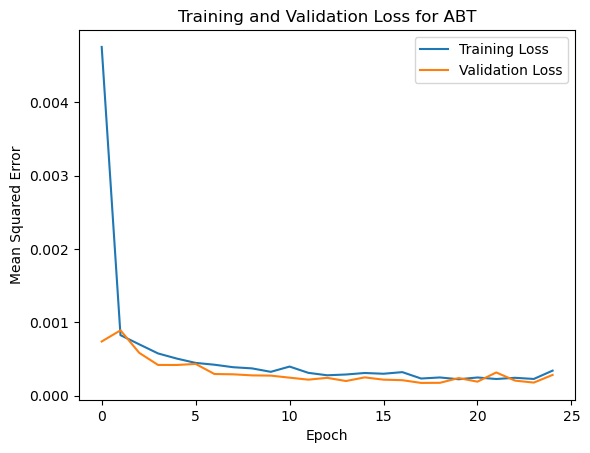

21/21 [==============================] - 0s 2ms/step


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


Epoch 1/50
65/65 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0034
Epoch 2/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 9.0551e-04 - val_loss: 8.2165e-04
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 7.7225e-04 - val_loss: 7.2896e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 7.2710e-04 - val_loss: 6.4318e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 6.7365e-04 - val_loss: 6.3317e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 6.5494e-04 - val_loss: 6.2240e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 5.986

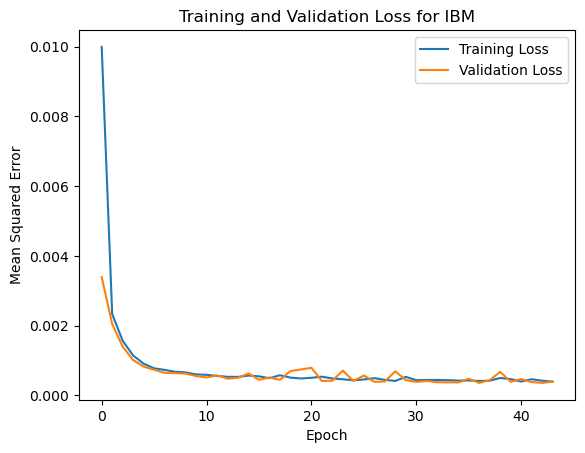

21/21 [==============================] - 0s 781us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0147 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 9.8482e-04 - val_loss: 9.7457e-04
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 9.4135e-04 - val_loss: 9.0058e-04
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 9.0839e-04 - val_loss: 8.8012e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 8.2580e-04 - val_loss: 7.9155e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 7.5196e-04 - val_loss: 7.8944e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 7.1420e-04 - val_loss: 7.1193e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 7.3918e-

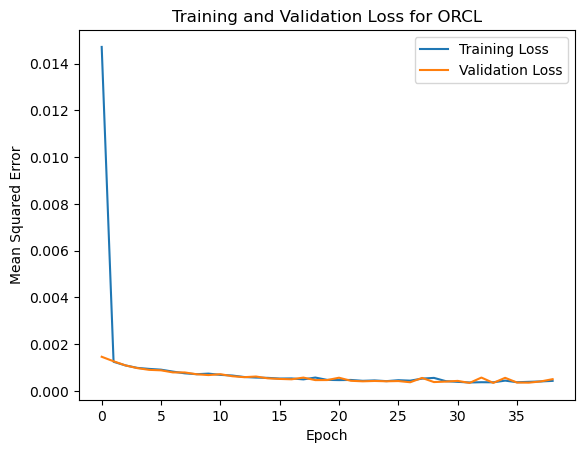

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 5ms/step - loss: 0.0282 - val_loss: 0.0012
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 9.8070e-04
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 8.3182e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 8.7348e-04 - val_loss: 7.1100e-04
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 7.4588e-04 - val_loss: 6.3990e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 6.5402e-04 - val_loss: 5.6051e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 6.1876e-04 - val_loss: 5.2777e-04
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 5.5901e-04 - val_loss: 5.2870e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 5.4140e-04 - val_loss: 4.6833e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 

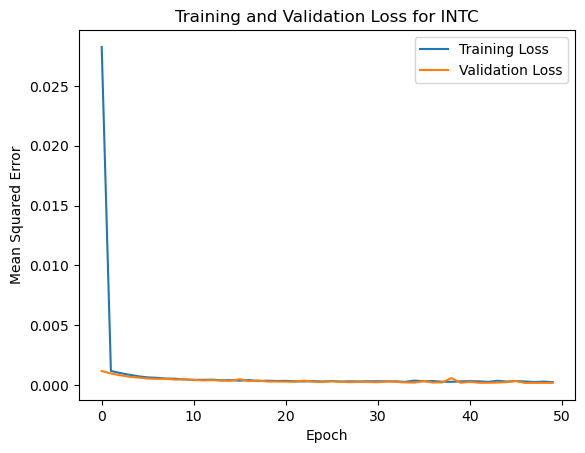

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0018
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 9.6332e-04
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 8.7758e-04 - val_loss: 7.8437e-04
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 7.4348e-04 - val_loss: 6.4806e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 5.9431e-04 - val_loss: 5.6678e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 4.9352e-04 - val_loss: 4.6012e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 4.7922e-04 - val_loss: 7.4043e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 4.2841e-04 - val_loss: 3.4765e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 3.49

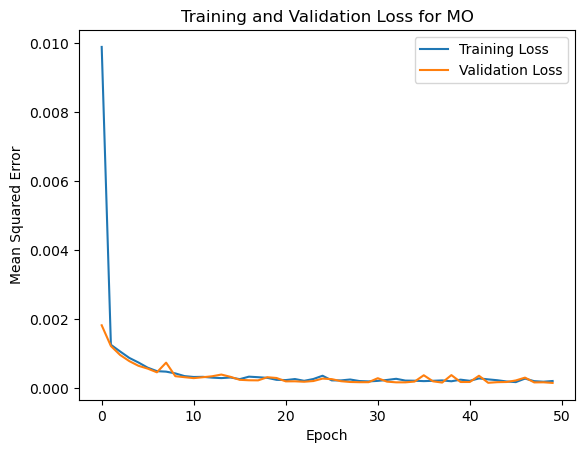

21/21 [==============================] - 0s 781us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 7ms/step - loss: 0.0216 - val_loss: 0.0026
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 9.8749e-04 - val_loss: 9.0708e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 8.6283e-04 - val_loss: 8.3089e-04
Epoch 10/50
65/65 [==============================] - 0s 3ms/step - loss: 7.8656e-04 - val_loss: 7.8549e-04
Epoch 

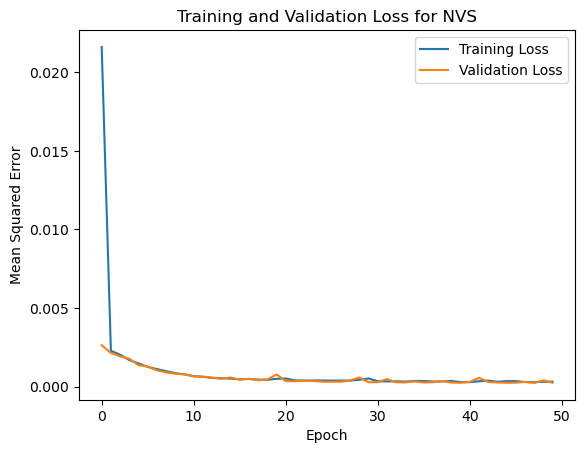

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 2s 5ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 9.1599e-04 - val_loss: 0.0010
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 6.5358e-04 - val_loss: 6.9053e-04
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 4.9864e-04 - val_loss: 5.1015e-04
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 4.2244e-04 - val_loss: 6.3950e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 4.7968e-04 - val_loss: 3.9273e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 3.7025e-04 - val_loss: 3.7052e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 3.3627e-04 - val_loss: 3.5321e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 4.4094e-04 - val_loss: 4.5164e-04
Epoch 10/50
65/65 [==============================] - 0s 3ms/step - lo

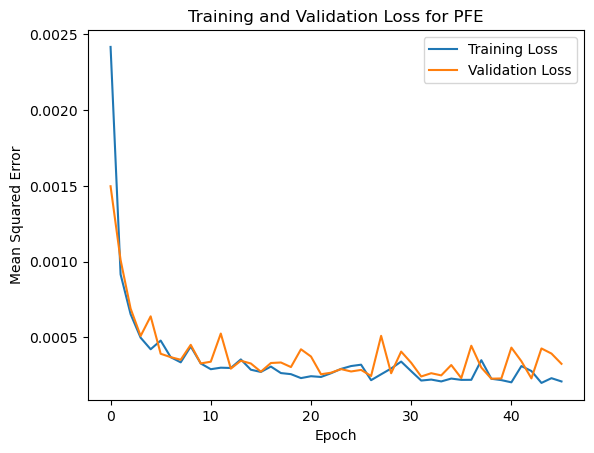

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0263 - val_loss: 0.0014
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 9.3197e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 9.6021e-04 - val_loss: 8.4528e-04
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 8.1940e-04 - val_loss: 7.9907e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 7.5595e-04 - val_loss: 7.1660e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 7.0477e-04 - val_loss: 6.1354e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 6.0738e-04 - val_loss: 5.5844e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 5.4974e-04 - val_loss: 5.1755e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 5.08

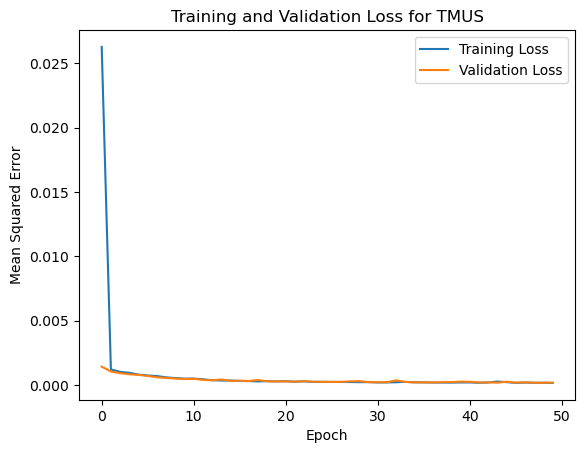

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 9.9096e-04 - val_loss: 8.9773e-04
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 7.3631e-04 - val_loss: 6.8689e-04
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 6.0472e-04 - val_loss: 6.4818e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 6.7008e-04 - val_loss: 6.5273e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 5.6299e-04 - val_loss: 4.8169e-04
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 4.8438e-04 - val_loss: 6.4286e-04
Epoch 10/50
65/65 [==============================] - 0s 3ms/step - loss: 4.6860e-

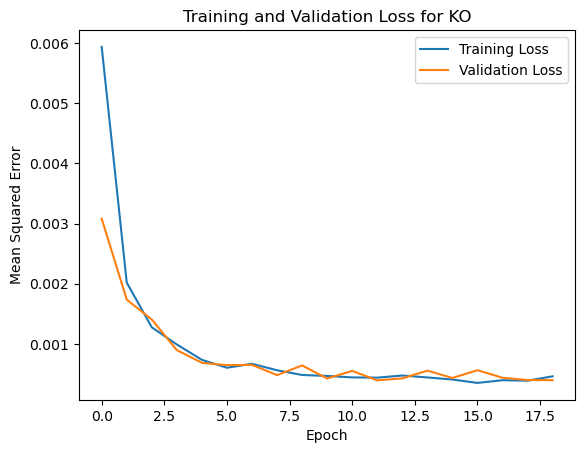

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 5ms/step - loss: 0.0672 - val_loss: 0.0023
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 9.2378e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 9.4913e-04 - val_loss: 8.4574e-04
Epoch 11/50
65/65 

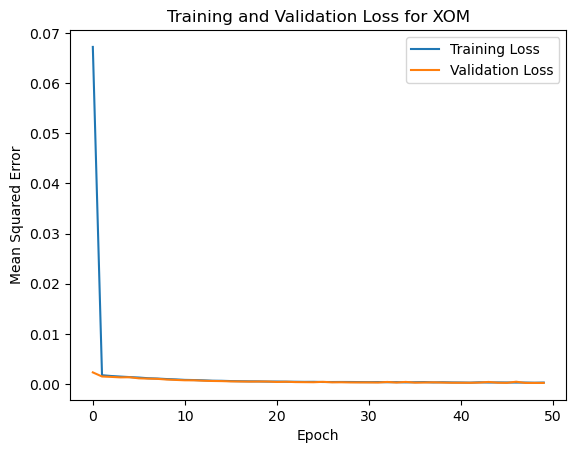

21/21 [==============================] - 0s 1ms/step
  Stock       MSE       MAE        R2
0   ABT  6.367541  1.961968  0.943408
1   IBM  5.233713  1.649456  0.943802
2  ORCL  2.878410  1.216181  0.980776
3  INTC  1.737142  0.928381  0.983600
4    MO  0.743661  0.627980  0.960459
5   NVS  1.448718  0.909830  0.919060
6   PFE  0.808013  0.647725  0.984560
7  TMUS  6.939750  1.989520  0.956666
8    KO  0.974138  0.726794  0.967761
9   XOM  3.486911  1.414875  0.992958


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2663820234.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import SGD

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = RobustScaler()
    scaler_Y = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data 
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    
    model = Sequential()
    # First GRU layer with Dropout regularisation
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='linear'))
    model.add(Dense(1))
    # Compiling the RNN
    model.compile(optimizer='adam',loss='mean_squared_error')
    # Fitting to the training set
#     model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))


3.0617994470430756
1.207271137443272
0.9633049722721662


In [21]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/GRU_adam.csv')

In [75]:
GRU_adam_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/GRU_adam.csv')
GRU_adam_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
GRU_adam_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     91.868340  123.616390  53.231544  62.329000  40.111115  86.282970   
1     91.553240  126.425480  53.858345  63.161910  40.864723  86.233980   
2     91.933370  128.314880  54.379436  63.740532  41.594420  86.287960   
3     91.741425  127.310370  54.228268  63.667755  41.873108  87.599724   
4     91.618340  126.572426  53.872814  64.250390  41.696300  87.653440   
..          ...         ...        ...        ...        ...        ...   
644  106.643660  141.194030  80.757430  26.514177  45.711140  90.917366   
645  107.476730  142.134690  80.281060  26.372282  46.013380  91.201035   
646  108.315470  142.288590  79.884360  26.125753  46.527054  90.955560   
647  108.291760  140.945740  80.002800  25.635738  46.339120  90.805595   
648  108.807820  141.383220  80.653020  25.836254  46.086780  91.675560   

           PFE        TMUS         KO         XOM  
0    34.196884  100.128810  47.971836   49.181970  
1    34.451750  100.210520  48.358326   50.953472  
2    34.219670  101.350840  48.683945   52.363434  
3    34.490116  101.151040  49.106810   53.026443  
4    34.214523  101.633896  48.970730   52.174553  
..         ...         ...        ...         ...  
644  51.808410  140.471180  63.044106  106.229080  
645  52.071587  141.094590  62.998558  108.361620  
646  51.576050  141.468500  63.391167  109.581560  
647  50.753240  140.912930  63.452015  109.388985  
648  51.029884  141.061390  63.607150  110.152180  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


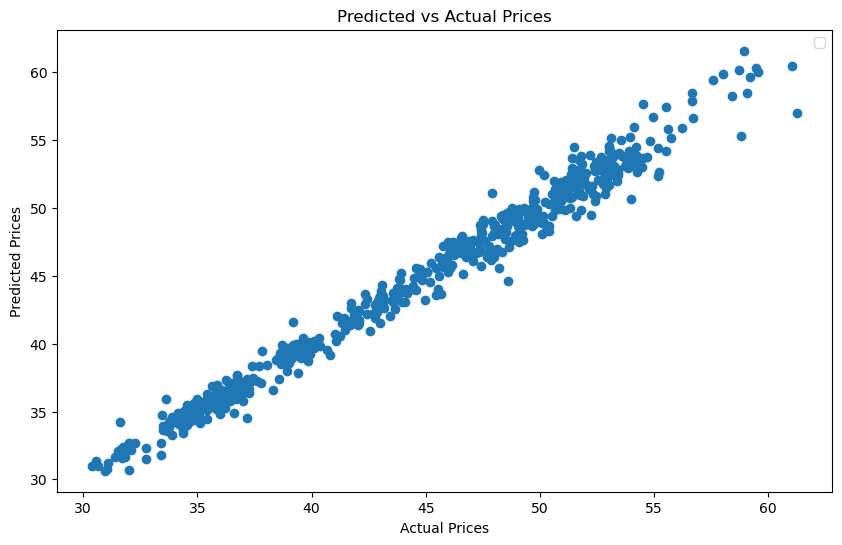

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], GRU_adam_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], LSTM_adamax_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization


In [76]:
assetLabels = GRU_adam_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData =GRU_adam_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.03   0.027  0.073 -0.125  0.027  0.013  0.069  0.058  0.046  0.134]

Variance-Covariance Matrix of Returns:
 [[0.745 0.097 0.191 0.202 0.079 0.163 0.205 0.207 0.071 0.075]
 [0.097 1.186 0.373 0.518 0.284 0.153 0.317 0.251 0.212 0.458]
 [0.191 0.373 1.733 0.426 0.244 0.18  0.351 0.316 0.196 0.321]
 [0.202 0.518 0.426 2.067 0.278 0.339 0.217 0.207 0.129 0.411]
 [0.079 0.284 0.244 0.278 1.123 0.185 0.192 0.124 0.189 0.363]
 [0.163 0.153 0.18  0.339 0.185 0.655 0.365 0.236 0.099 0.126]
 [0.205 0.317 0.351 0.217 0.192 0.365 1.546 0.225 0.132 0.153]
 [0.207 0.251 0.316 0.207 0.124 0.236 0.225 0.962 0.143 0.183]
 [0.071 0.212 0.196 0.129 0.189 0.099 0.132 0.143 0.513 0.101]
 [0.075 0.458 0.321 0.411 0.363 0.126 0.153 0.183 0.101 1.808]]


## Portfolio Returns with GRU Adam Predictions 

In [77]:
portfolioSize = len(GRU_adam_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.679]] 
Annualized Risk (%):   [[10.663]] 
Annualized Expected Portfolio Return(%):   [20.9]

Optimal weights (%):
 [[ 8.184]
 [ 0.   ]
 [10.286]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [13.861]
 [14.495]
 [17.908]
 [35.265]]


##  GRU price predictions with RMSprop Optimizer  

Epoch 1/50
65/65 [==============================] - 1s 5ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 8.3645e-04
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 4.5257e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 4.6359e-04
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 3.8336e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 4.1169e-04
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 6.9229e-04
Epoch 10/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 3.

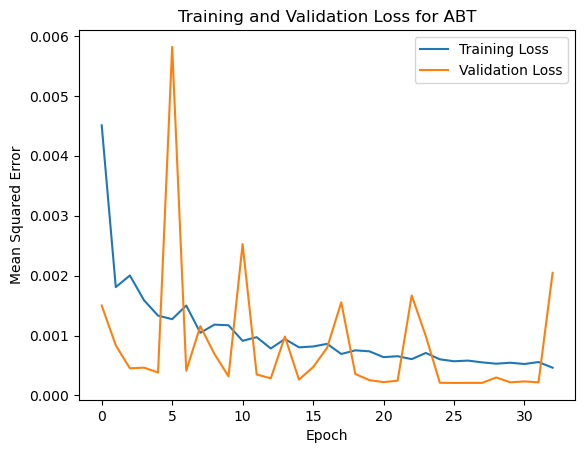

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0070
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 7.5302e-04
Epoch 11/50
65/65 [=======

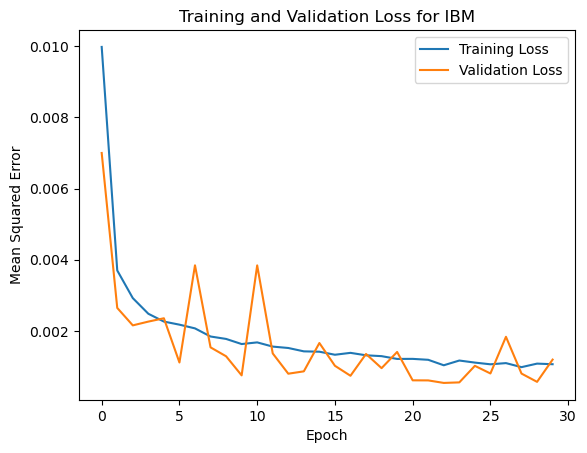

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0108 - val_loss: 0.0022
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 9.9645e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 8.0727e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 8.2437e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 7.4337e-04
Epoch 11/50
65

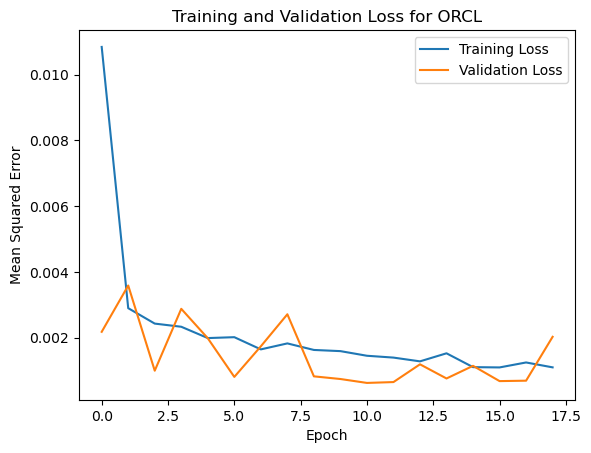

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0033
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 9.6403e-04
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 4.8637e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 5.6786e-04
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 5.1944e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 5.6648e-04
Epoch 11/5

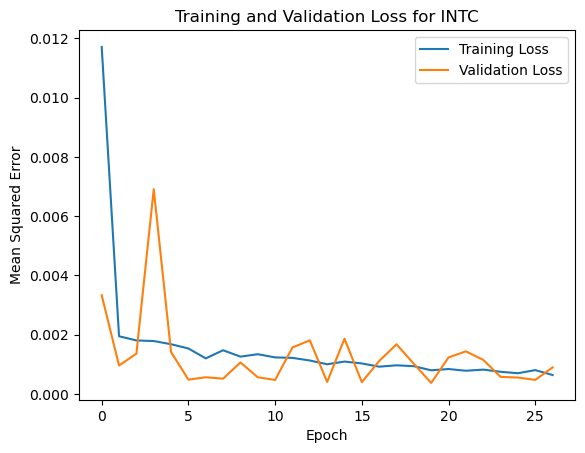

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0010
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 8.0962e-04
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 5.7889e-04
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 5.1726e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 8.4628e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 8.0136e-04
Epoch 11/5

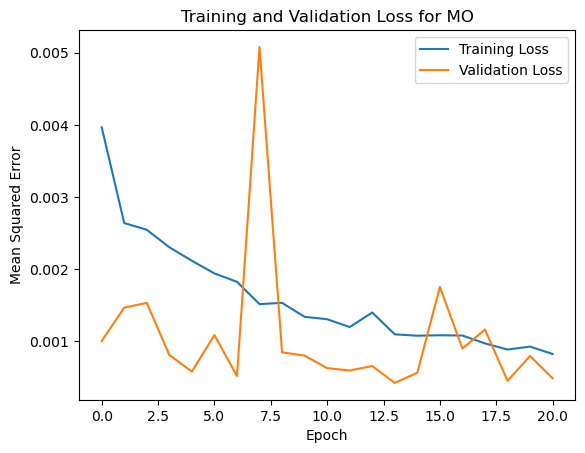

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 5ms/step - loss: 0.0121 - val_loss: 0.0027
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 11/50
65/65 [===========

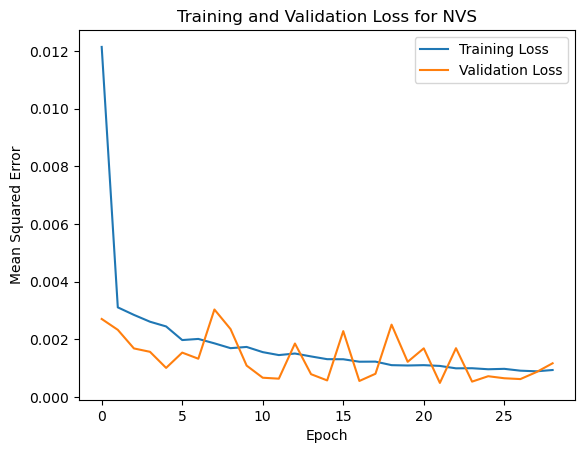

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 6.4513e-04
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 8.5610e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 6.7745e-04
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 7.5246e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0012


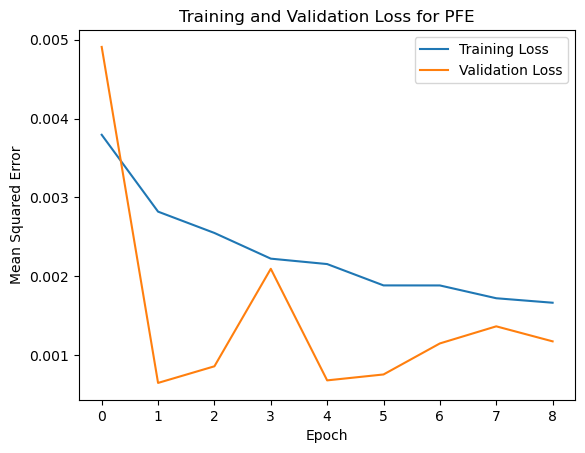

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0074 - val_loss: 0.0013
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 4.8675e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 4.4164e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 3.1091e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 2.9177e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 8.2863e-04
Epoch 11/5

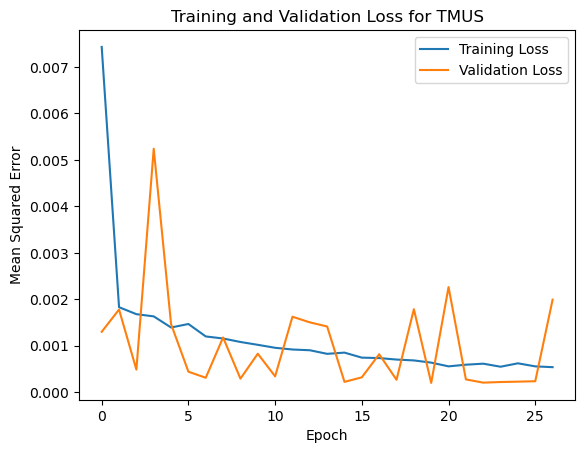

21/21 [==============================] - 0s 782us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 2s 7ms/step - loss: 0.0041 - val_loss: 9.3989e-04
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0092
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0090
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 5.2323e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 5.7574e-04
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 10/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 11/50
65/65 

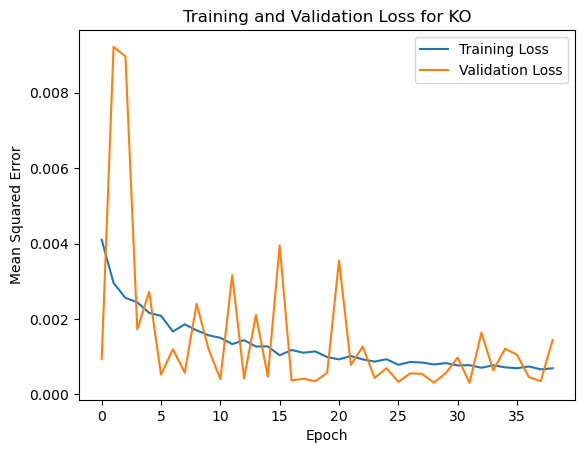

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 2s 8ms/step - loss: 0.0230 - val_loss: 0.0018
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 9.1657e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 11/50
65/65 [=======

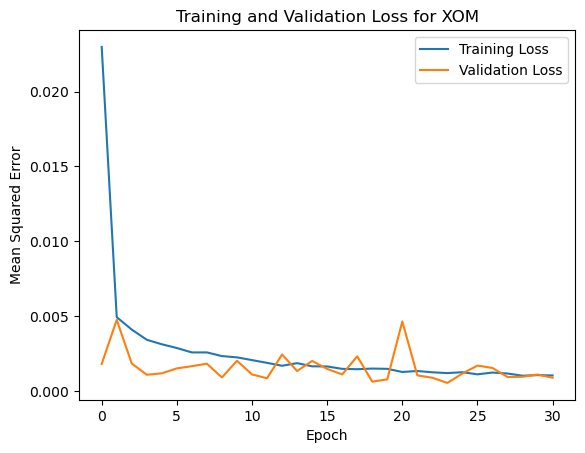

21/21 [==============================] - 0s 2ms/step
  Stock        MSE       MAE        R2
0   ABT  14.158112  3.130469  0.874169
1   IBM   7.329343  2.008647  0.921299
2  ORCL   6.045280  1.882955  0.959625
3  INTC   2.651242  1.154453  0.974970
4    MO   1.889109  0.981703  0.899555
5   NVS   2.696175  1.284273  0.849365
6   PFE   3.023600  1.334032  0.942221
7  TMUS  10.783413  2.503116  0.932665
8    KO   1.356556  0.910859  0.955105
9   XOM   6.958438  2.025609  0.985947


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\1184600355.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import SGD

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = RobustScaler()
    scaler_Y = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data 
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    
    model = Sequential()
    # First GRU layer with Dropout regularisation
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='linear'))
    model.add(Dense(1))

    model.compile(optimizer='rmsprop',loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))


5.689126851307124
1.7216116395312575
0.9294921902957383


In [513]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/GRU_rmsprop.csv')

In [78]:
GRU_rmsprop_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/GRU_rmsprop.csv')
GRU_rmsprop_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
GRU_rmsprop_Predicted_Prices

ABT         IBM       ORCL       INTC         MO        NVS  \
0     90.465904  123.458620  52.952420  61.490030  38.797455  86.221150   
1     90.538330  124.536064  53.180820  61.939014  39.407260  86.234856   
2     90.633385  126.620360  53.639214  62.127080  39.807297  86.092010   
3     89.990110  127.200250  53.634030  62.383600  40.283974  86.275480   
4     89.889170  126.616220  53.764614  62.678726  40.650078  86.574520   
..          ...         ...        ...        ...        ...        ...   
644  102.330710  141.203280  69.642950  27.174892  46.633446  90.207510   
645  102.171486  141.242190  69.767480  26.918268  46.591960  90.215390   
646  102.291860  141.660310  69.752010  26.714527  46.558876  90.340614   
647  102.751780  141.533480  69.494670  26.435371  46.504480  90.430260   
648  103.086044  141.160250  69.495130  26.330610  46.474323  90.432970   

           PFE        TMUS         KO         XOM  
0    34.900764   93.652270  46.867405   50.930510  
1    34.792805   93.938576  47.545517   51.481180  
2    34.882930   94.900670  48.059740   52.429913  
3    34.773415   95.331920  48.268800   52.643433  
4    34.582390   95.821030  48.236534   52.484257  
..         ...         ...        ...         ...  
644  47.793540  120.641570  60.597885  101.604690  
645  47.849760  120.557800  60.651917  102.036440  
646  47.745210  120.355860  60.819744  103.100850  
647  47.638180  119.957580  60.825474  103.465760  
648  47.606490  119.799644  60.911580  103.357890  

[649 rows x 10 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


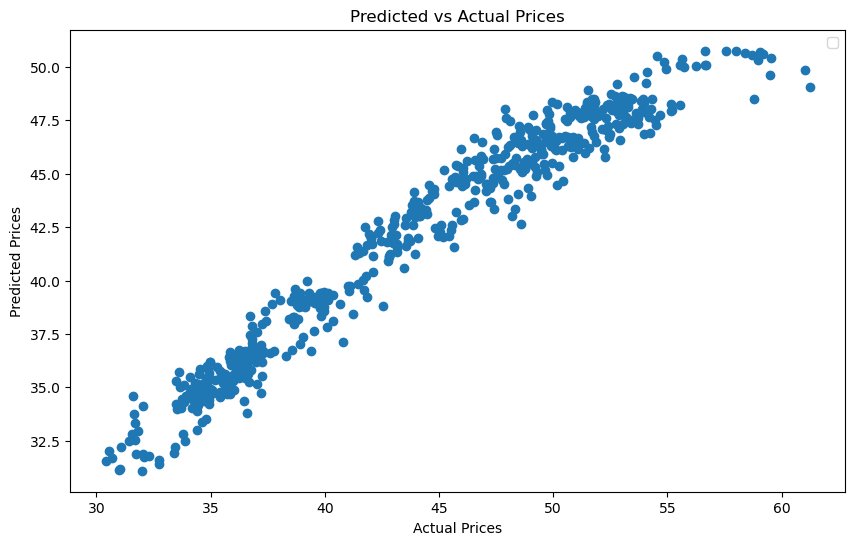

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['PFE'], GRU_rmsprop_Predicted_Prices['PFE'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Returns with GRU RMSprop Predictions 

In [79]:
assetLabels = GRU_rmsprop_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = GRU_rmsprop_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.021  0.023  0.043 -0.127  0.03   0.008  0.049  0.038  0.041  0.112]

Variance-Covariance Matrix of Returns:
 [[ 0.082  0.019  0.013  0.037  0.031  0.03   0.033  0.004  0.032 -0.002]
 [ 0.019  0.529  0.09   0.187  0.087  0.055  0.092  0.048  0.119  0.127]
 [ 0.013  0.09   0.169  0.099  0.058  0.032  0.036  0.023  0.061  0.044]
 [ 0.037  0.187  0.099  0.676  0.109  0.108  0.054  0.023  0.055  0.104]
 [ 0.031  0.087  0.058  0.109  0.347  0.058  0.037  0.033  0.088  0.118]
 [ 0.03   0.055  0.032  0.108  0.058  0.174  0.057  0.038  0.056  0.029]
 [ 0.033  0.092  0.036  0.054  0.037  0.057  0.204  0.014  0.057  0.004]
 [ 0.004  0.048  0.023  0.023  0.033  0.038  0.014  0.075  0.029  0.005]
 [ 0.032  0.119  0.061  0.055  0.088  0.056  0.057  0.029  0.181  0.043]
 [-0.002  0.127  0.044  0.104  0.118  0.029  0.004  0.005  0.043  0.475]]


In [81]:
portfolioSize = len(GRU_rmsprop_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.96]] 
Annualized Risk (%):   [[3.926]] 
Annualized Expected Portfolio Return(%):   [14.618]

Optimal weights (%):
 [[ 7.34 ]
 [ 0.   ]
 [ 8.408]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [19.809]
 [38.501]
 [ 0.432]
 [25.51 ]]


##  GRU price predictions with Adaamax Optimizer  

Epoch 1/50
65/65 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 7.2686e-04
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 9.3953e-04 - val_loss: 6.6589e-04
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 8.6950e-04 - val_loss: 6.1804e-04
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 8.2380e-04 - val_loss: 5.7962e-04
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 7.9366e-04 - val_loss: 5.4555e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 7.4255e-04 - val_loss: 5.1373e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 7.0110e-04 - val_loss: 4.8606e-04
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 6.6528e-04 - val_loss: 4.6342e-04
Epoch 9/50
65/65 [==============================] - 0s 4ms/step - loss: 6.2631e-04 - val_loss: 4.3389e-04
Epoch 10/50
65/65 [==============================]

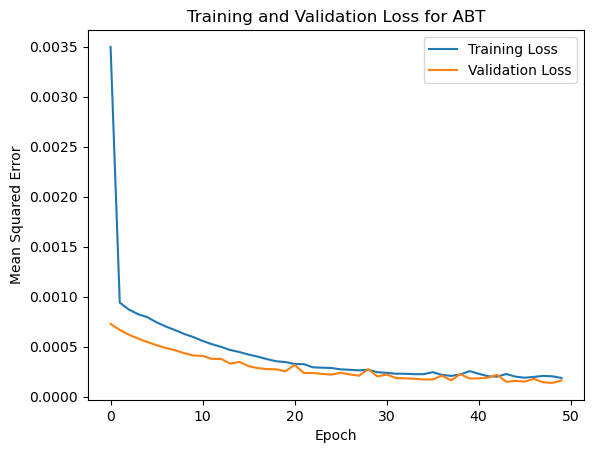

21/21 [==============================] - 0s 2ms/step


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


Epoch 1/50
65/65 [==============================] - 2s 5ms/step - loss: 0.0174 - val_loss: 0.0034
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 10/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 11/50
65/65 [

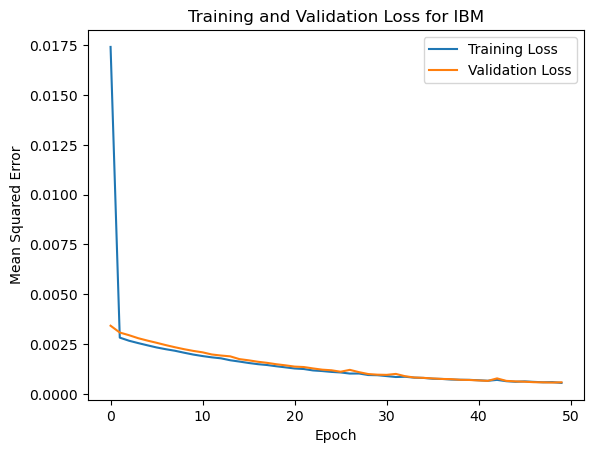

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 5ms/step - loss: 0.0092 - val_loss: 0.0028
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 11/50
65/65 [===========

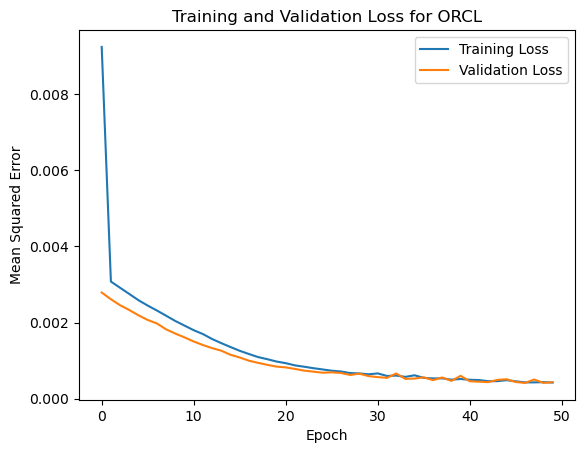

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 5ms/step - loss: 0.0086 - val_loss: 0.0013
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.7439e-04
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 9.2373e-04
Epoch 5/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 9.0319e-04
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 8.5245e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 9.5879e-04 - val_loss: 8.4364e-04
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 9.1955e-04 - val_loss: 7.7696e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 8.8238e-04 - val_loss: 7.3846e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 8.3778e-04 - val

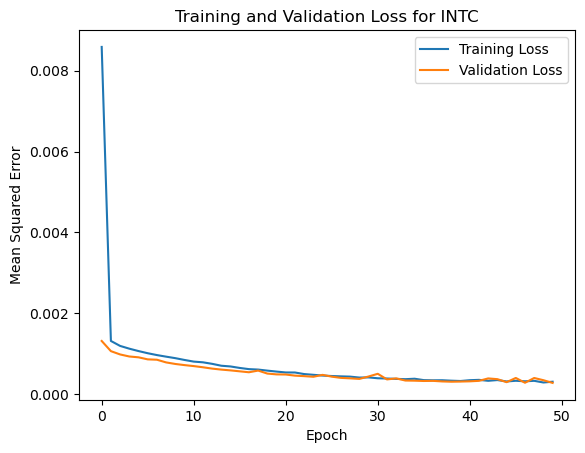

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0519 - val_loss: 0.0025
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/50
65/65 [==============================] - 0s 4ms/step - loss: 9.4750e-04 - val_loss: 9.7002e-04
Epoch 7/50
65/65 [==============================] - 0s 4ms/step - loss: 9.0381e-04 - val_loss: 9.3748e-04
Epoch 8/50
65/65 [==============================] - 0s 4ms/step - loss: 8.6827e-04 - val_loss: 9.1044e-04
Epoch 9/50
65/65 [==============================] - 0s 4ms/step - loss: 8.3585e-04 - val_loss: 9.0072e-04
Epoch 10/50
65/65 [==============================] - 0s 4ms/step - loss: 8.2446e-04 - val_loss: 8

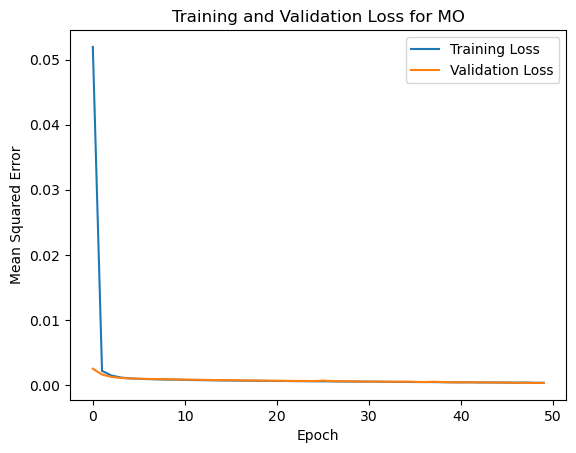

21/21 [==============================] - 0s 782us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 6ms/step - loss: 0.0235 - val_loss: 0.0019
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 11/50
65/65 [===========

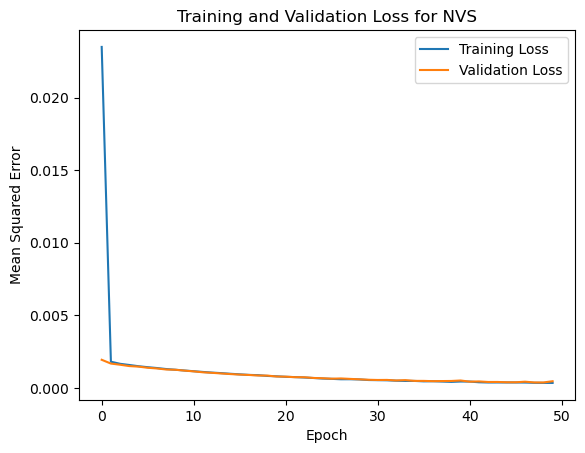

21/21 [==============================] - 0s 781us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 5ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 9.8110e-04
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 9.0820e-04
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 9.2747e-04 - val_loss: 9.0302e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 8.5647e-04 - val_loss: 8.0020e-04
Epoch 10/50
65/65 [==============================] - 0s 4ms/step - loss: 8.0440e-04 - val_loss: 7.6797e-0

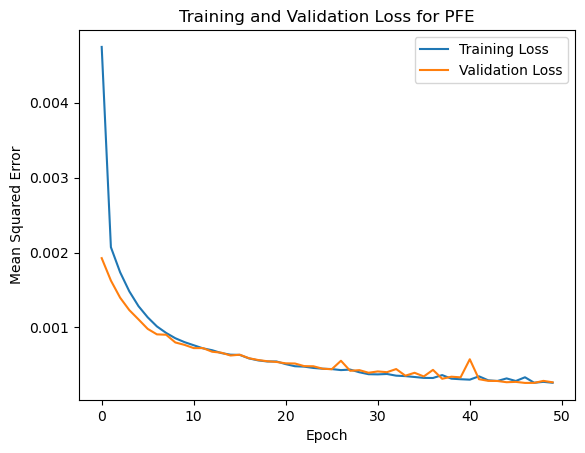

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 2s 4ms/step - loss: 0.0165 - val_loss: 0.0020
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 9.5796e-04
Epoch 8/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 8.9745e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 8.8151e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 9.9149e-04 - val_loss: 8.3697e-04
Epoch 11/5

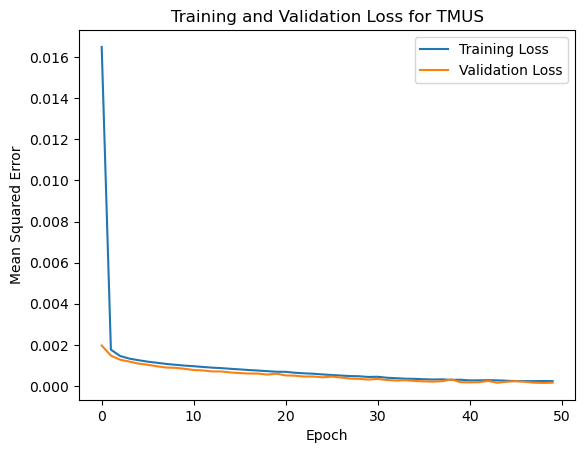

21/21 [==============================] - 0s 793us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 7ms/step - loss: 0.0169 - val_loss: 0.0031
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 11/50
65/65 [===========

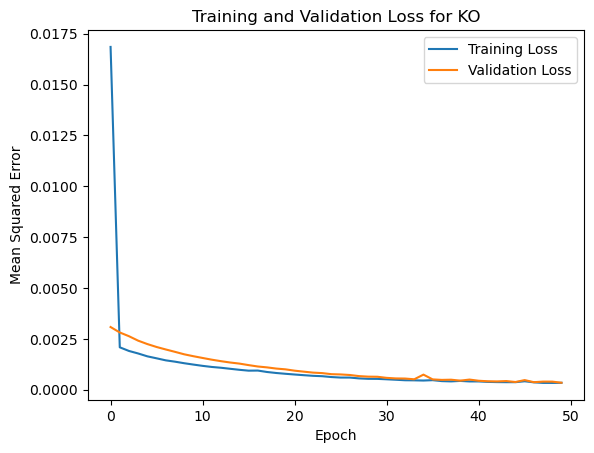

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0462 - val_loss: 0.0022
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 3/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
65/65 [===========

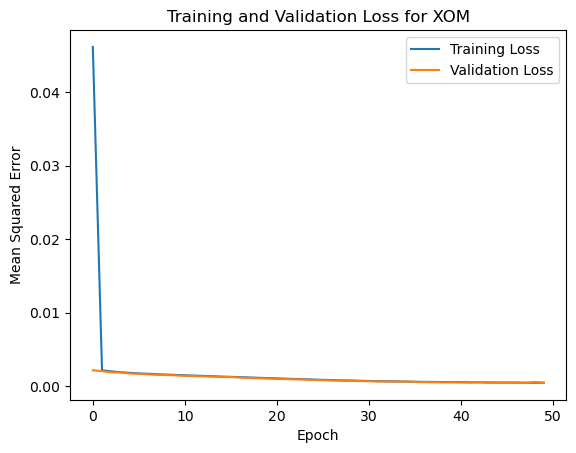

21/21 [==============================] - 0s 1ms/step
  Stock        MSE       MAE        R2
0   ABT   6.390885  1.908428  0.943200
1   IBM   8.041522  2.115189  0.913652
2  ORCL   4.494792  1.518061  0.969980
3  INTC   1.969927  0.999127  0.981402
4    MO   1.516770  0.900071  0.919352
5   NVS   2.608104  1.293877  0.854285
6   PFE   1.107674  0.764550  0.978833
7  TMUS  11.357799  2.739337  0.929079
8    KO   0.869315  0.682199  0.971230
9   XOM   7.086523  2.069046  0.985689


C:\Users\kship\AppData\Local\Temp\ipykernel_11196\2600444191.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import SGD

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")

stocks = ['ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
data=pd.read_csv("IBM_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data 
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    
    model = Sequential()
    # First GRU layer with Dropout regularisation
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='linear'))
    model.add(Dense(1))
    # Compiling the RNN
    model.compile(optimizer='adamax',loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))


4.544331145059909
1.4989883073121997
0.9446703609186613


In [36]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/GRU_adamax.csv')

In [82]:
GRU_adamax_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/GRU_adamax.csv')
GRU_adamax_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
GRU_adamax_Predicted_Prices

ABT        IBM       ORCL       INTC         MO        NVS  \
0     91.893570  122.41700  53.465430  62.551266  38.756252  85.458150   
1     91.103180  123.59711  54.006645  63.509945  39.439228  85.299640   
2     90.943090  125.06616  54.758125  63.290195  40.171196  85.345910   
3     91.475174  126.75473  54.483585  64.513390  40.647840  85.997300   
4     92.045400  125.71914  54.480934  63.934555  41.100750  85.974785   
..          ...        ...        ...        ...        ...        ...   
644  108.349800  140.02500  81.788130  26.677803  47.001156  90.092360   
645  109.074580  140.20122  81.059400  26.654880  46.649677  89.931710   
646  109.793610  140.95604  81.233810  26.557465  46.734270  89.923700   
647  109.526140  141.60190  81.470085  26.406008  46.692883  89.823845   
648  109.716200  140.93216  82.848700  26.452559  46.503193  90.168580   

           PFE       TMUS         KO         XOM  
0    34.655964  100.92616  47.359898   48.939545  
1    34.264732  102.57556  47.463093   49.500100  
2    34.518272  103.39139  48.952545   50.535010  
3    34.831760  103.44092  48.558865   52.026173  
4    34.119007  104.52833  48.916030   52.130430  
..         ...        ...        ...         ...  
644  52.104630  141.45522  62.915640  107.638340  
645  51.886670  140.82920  63.087948  108.464010  
646  51.431923  142.55580  63.468136  108.092090  
647  51.323643  141.08405  63.033302  109.037350  
648  51.240753  140.82474  63.264637  110.088234  

[649 rows x 10 columns]

## Portfolio Returns with GRU Adamax Predictions 

In [83]:
assetLabels = GRU_adamax_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = GRU_adamax_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['ABT', 'IBM', 'ORCL', 'INTC', 'MO', 'NVS', 'PFE', 'TMUS', 'KO', 'XOM']

Mean Returns:
 [ 0.032  0.026  0.075 -0.123  0.03   0.011  0.067  0.057  0.048  0.131]

Variance-Covariance Matrix of Returns:
 [[ 0.887  0.136  0.235  0.265  0.071  0.188  0.284  0.191  0.186 -0.076]
 [ 0.136  0.773  0.212  0.35   0.083  0.139  0.179  0.152  0.165  0.179]
 [ 0.235  0.212  1.411  0.359  0.132  0.113  0.252  0.277  0.251  0.105]
 [ 0.265  0.35   0.359  1.955  0.167  0.248  0.259  0.198  0.191  0.163]
 [ 0.071  0.083  0.132  0.167  0.461  0.096  0.086  0.074  0.103  0.163]
 [ 0.188  0.139  0.113  0.248  0.096  0.604  0.245  0.193  0.135  0.015]
 [ 0.284  0.179  0.252  0.259  0.086  0.245  1.414  0.172  0.195 -0.068]
 [ 0.191  0.152  0.277  0.198  0.074  0.193  0.172  1.044  0.121  0.058]
 [ 0.186  0.165  0.251  0.191  0.103  0.135  0.195  0.121  0.6   -0.016]
 [-0.076  0.179  0.105  0.163  0.163  0.015 -0.068  0.058 -0.016  1.226]]


In [84]:
portfolioSize = len(GRU_adamax_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.035]] 
Annualized Risk (%):   [[9.111]] 
Annualized Expected Portfolio Return(%):   [21.537]

Optimal weights (%):
 [[ 4.335]
 [ 0.   ]
 [ 9.948]
 [ 0.   ]
 [ 7.368]
 [ 0.   ]
 [12.975]
 [10.91 ]
 [13.963]
 [40.502]]
